In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston        
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split


In [124]:
# Reading Data from Data set
Boston_Data =load_boston()

In [125]:
Boston_Data.feature_names

X = Boston_Data.data        # assaigning the features to X
y = Boston_Data.target      # assaigning the target variable to y

In [126]:
df = pd.DataFrame(X)
df.columns = Boston_Data.feature_names
df['PRICE'] = y             # adding the target variable to dataframe 
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [127]:
# Normalize the data

from sklearn.preprocessing import StandardScaler
SC =StandardScaler()
X = SC.fit_transform(X)

X[0]

array([-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
        0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
       -1.45900038,  0.44105193, -1.0755623 ])

In [179]:
#=============================== MULTI-VARIABLE LINEAR REGRESSION ========================

# ============================== INITIALISING HYPER-PARAMETERS =========================
# Hyper-parameters for a multi-variate linear regression are: 
#  1. Theta (weights) which describe the line
#  2. epochs- number of times we run our linear regression to minimise the loss
#  3. alpha- the learning rate

# initialising theta with zeros

theta = np.zeros((1, X.shape[1] + 1)) #its dimensions are (1,14) because of 13 coefficients ans one intercept(intercept(W0))
print(theta.shape)
print(theta)

epoch = 100000
alpha = 0.001 

# creating bias vector X0
X0 = np.ones((X.shape[0],1))    # a vector with 506 rows and 1 column with weights of '1'.
print(X0.shape)

# forming input variable
X = np.concatenate((X0, X), axis = 1)
print(X.shape)
print(X[0])

(1, 15)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(506, 1)
(506, 15)
[ 1.          1.         -0.41978194  0.28482986 -1.2879095  -0.27259857
 -0.14421743  0.41367189 -0.12001342  0.1402136  -0.98284286 -0.66660821
 -1.45900038  0.44105193 -1.0755623 ]


In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
y_train = y_train.reshape((y_train.shape[0], 1))
y_test = y_test.reshape((y_test.shape[0], 1))
print(df.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(506, 14)
(354, 15)
(152, 15)
(354, 1)
(152, 1)


### Cost Function
$$ MSE=\frac{1}{2N} \sum_{i=1}^n(y_i−(W^TX_i+b))^2 $$

In [181]:
# ================================ DEFINING COST FUNCTION ================================

def cost_function(X, y, theta):
    h = X.dot(theta.T)
    loss = h - y
    return np.sum(loss ** 2)/ (2 * len(X))

# For testing the function
cost = cost_function(X_train, y_train, theta)
print(cost)

308.8122316384181


In [182]:
# ============================ DEFINING GRADIENT DESCENT =========================
def grad_descent(X, y, theta, alpha):
    h = X.dot(theta.T)
    loss = h - y
    dj = (loss.T).dot(X)
    theta = theta - (alpha/len(X)) * dj
#     print(theta.shape)
    return theta

# For testing the function 
cost = cost_function(X_train, y_train, theta)
print("Cost before: ", cost)

theta = grad_descent(X_train, y_train, theta, alpha)

cost = cost_function(X_train, y_train, theta)
print("Cost after: ", cost)

Cost before:  308.8122316384181
Cost after:  307.4642373632642


In [183]:
# ========================== DEFINING OUR LINEAR REGRESSION =========================
def linear_reg(epoch, X, y, theta, alpha):
    for ep in range(epoch):
        
        #calculate new theta
        theta = grad_descent(X, y, theta, alpha)
        
        #compute new loss
        loss = cost_function(X, y, theta)
        print("Cost function: ", loss)
        
    return theta

theta = linear_reg(epoch, X_train, y_train, theta, alpha)
theta.shape

Cost function:  306.1235125264341
Cost function:  304.7900061486053
Cost function:  303.46366771250837
Cost function:  302.14444715802153
Cost function:  300.83229487732046
Cost function:  299.52716171008313
Cost function:  298.2289989387501
Cost function:  296.93775828383826
Cost function:  295.6533918993077
Cost function:  294.3758523679817
Cost function:  293.10509269701873
Cost function:  291.84106631343604
Cost function:  290.5837270596836
Cost function:  289.33302918926915
Cost function:  288.08892736243234
Cost function:  286.851376641868
Cost function:  285.6203324884986
Cost function:  284.39575075729374
Cost function:  283.1775876931381
Cost function:  281.9657999267452
Cost function:  280.76034447061835
Cost function:  279.5611787150568
Cost function:  278.3682604242075
Cost function:  277.1815477321614
Cost function:  276.0009991390939
Cost function:  274.82657350744904
Cost function:  273.65823005816713
Cost function:  272.4959283669544
Cost function:  271.3396283605953
Co

Cost function:  100.90676977842496
Cost function:  100.54716069576035
Cost function:  100.18906285896506
Cost function:  99.83246942865266
Cost function:  99.47737360167027
Cost function:  99.12376861085069
Cost function:  98.77164772476718
Cost function:  98.42100424748989
Cost function:  98.07183151834494
Cost function:  97.72412291167508
Cost function:  97.37787183660309
Cost function:  97.0330717367968
Cost function:  96.68971609023622
Cost function:  96.34779840898298
Cost function:  96.00731223895156
Cost function:  95.6682511596826
Cost function:  95.3306087841181
Cost function:  94.99437875837877
Cost function:  94.65955476154318
Cost function:  94.32613050542878
Cost function:  93.99409973437497
Cost function:  93.66345622502794
Cost function:  93.33419378612744
Cost function:  93.00630625829527
Cost function:  92.67978751382574
Cost function:  92.35463145647793
Cost function:  92.03083202126949
Cost function:  91.70838317427257
Cost function:  91.38727891241123
Cost function:

Cost function:  28.431872032729594
Cost function:  28.368563834830606
Cost function:  28.305507738059717
Cost function:  28.242702721252037
Cost function:  28.180147767432103
Cost function:  28.117841863796308
Cost function:  28.05578400169527
Cost function:  27.993973176616407
Cost function:  27.93240838816656
Cost function:  27.87108864005471
Cost function:  27.810012940074646
Cost function:  27.74918030008795
Cost function:  27.688589736006797
Cost function:  27.62824026777705
Cost function:  27.56813091936125
Cost function:  27.508260718721843
Cost function:  27.44862869780435
Cost function:  27.389233892520693
Cost function:  27.33007534273255
Cost function:  27.271152092234818
Cost function:  27.212463188739118
Cost function:  27.154007683857447
Cost function:  27.09578463308571
Cost function:  27.037793095787627
Cost function:  26.980032135178398
Cost function:  26.92250081830871
Cost function:  26.865198216048558
Cost function:  26.808123403071395
Cost function:  26.75127545783

Cost function:  15.096288488519681
Cost function:  15.085335651540902
Cost function:  15.074424253900098
Cost function:  15.063554130924343
Cost function:  15.052725118604181
Cost function:  15.041937053590928
Cost function:  15.031189773194008
Cost function:  15.020483115378282
Cost function:  15.009816918761384
Cost function:  14.999191022611083
Cost function:  14.988605266842644
Cost function:  14.978059492016223
Cost function:  14.967553539334206
Cost function:  14.957087250638658
Cost function:  14.946660468408712
Cost function:  14.936273035757974
Cost function:  14.925924796431977
Cost function:  14.91561559480558
Cost function:  14.905345275880473
Cost function:  14.895113685282599
Cost function:  14.884920669259643
Cost function:  14.874766074678474
Cost function:  14.864649749022705
Cost function:  14.85457154039012
Cost function:  14.844531297490251
Cost function:  14.834528869641847
Cost function:  14.82456410677044
Cost function:  14.81463685940586
Cost function:  14.80474

Cost function:  12.67132933428465
Cost function:  12.669144552473465
Cost function:  12.66696679587264
Cost function:  12.664796037794053
Cost function:  12.6626322516553
Cost function:  12.660475410979272
Cost function:  12.658325489393714
Cost function:  12.656182460630836
Cost function:  12.65404629852686
Cost function:  12.651916977021628
Cost function:  12.64979447015816
Cost function:  12.64767875208227
Cost function:  12.645569797042114
Cost function:  12.643467579387831
Cost function:  12.641372073571077
Cost function:  12.639283254144658
Cost function:  12.637201095762105
Cost function:  12.63512557317727
Cost function:  12.633056661243929
Cost function:  12.630994334915377
Cost function:  12.628938569244028
Cost function:  12.626889339381021
Cost function:  12.624846620575815
Cost function:  12.622810388175804
Cost function:  12.620780617625915
Cost function:  12.618757284468215
Cost function:  12.616740364341538
Cost function:  12.614729832981066
Cost function:  12.612725666

Cost function:  12.147514702135872
Cost function:  12.14682065279122
Cost function:  12.146128155333125
Cost function:  12.145437204498172
Cost function:  12.144747795042969
Cost function:  12.144059921744077
Cost function:  12.14337357939792
Cost function:  12.142688762820738
Cost function:  12.142005466848458
Cost function:  12.141323686336673
Cost function:  12.14064341616051
Cost function:  12.139964651214592
Cost function:  12.139287386412951
Cost function:  12.138611616688932
Cost function:  12.137937336995153
Cost function:  12.137264542303393
Cost function:  12.13659322760454
Cost function:  12.135923387908493
Cost function:  12.135255018244129
Cost function:  12.134588113659175
Cost function:  12.133922669220162
Cost function:  12.13325868001236
Cost function:  12.132596141139684
Cost function:  12.131935047724625
Cost function:  12.13127539490819
Cost function:  12.130617177849794
Cost function:  12.12996039172725
Cost function:  12.129305031736623
Cost function:  12.12865109

Cost function:  11.942445282828432
Cost function:  11.942116449206177
Cost function:  11.941788033391898
Cost function:  11.941460034305099
Cost function:  11.94113245086898
Cost function:  11.940805282010441
Cost function:  11.940478526660051
Cost function:  11.94015218375204
Cost function:  11.939826252224295
Cost function:  11.939500731018331
Cost function:  11.939175619079286
Cost function:  11.938850915355902
Cost function:  11.938526618800518
Cost function:  11.93820272836906
Cost function:  11.937879243021005
Cost function:  11.937556161719398
Cost function:  11.937233483430811
Cost function:  11.936911207125352
Cost function:  11.936589331776633
Cost function:  11.936267856361782
Cost function:  11.935946779861387
Cost function:  11.935626101259539
Cost function:  11.935305819543766
Cost function:  11.934985933705057
Cost function:  11.934666442737827
Cost function:  11.93434734563992
Cost function:  11.934028641412572
Cost function:  11.933710329060434
Cost function:  11.93339

Cost function:  11.827552398919227
Cost function:  11.827339049814736
Cost function:  11.827125865933237
Cost function:  11.826912846998034
Cost function:  11.826699992733182
Cost function:  11.826487302863502
Cost function:  11.826274777114556
Cost function:  11.826062415212649
Cost function:  11.825850216884847
Cost function:  11.82563818185895
Cost function:  11.825426309863499
Cost function:  11.825214600627772
Cost function:  11.825003053881792
Cost function:  11.824791669356308
Cost function:  11.8245804467828
Cost function:  11.824369385893476
Cost function:  11.824158486421277
Cost function:  11.823947748099858
Cost function:  11.823737170663595
Cost function:  11.823526753847592
Cost function:  11.823316497387667
Cost function:  11.823106401020341
Cost function:  11.822896464482861
Cost function:  11.82268668751317
Cost function:  11.822477069849924
Cost function:  11.822267611232483
Cost function:  11.822058311400909
Cost function:  11.82184917009596
Cost function:  11.821640

Cost function:  11.75358224242459
Cost function:  11.753418548012835
Cost function:  11.753254949196739
Cost function:  11.753091445868145
Cost function:  11.752928037919107
Cost function:  11.752764725241894
Cost function:  11.75260150772899
Cost function:  11.752438385273102
Cost function:  11.752275357767136
Cost function:  11.752112425104228
Cost function:  11.75194958717772
Cost function:  11.751786843881158
Cost function:  11.751624195108313
Cost function:  11.751461640753163
Cost function:  11.751299180709896
Cost function:  11.751136814872904
Cost function:  11.750974543136802
Cost function:  11.750812365396403
Cost function:  11.750650281546728
Cost function:  11.75048829148301
Cost function:  11.75032639510069
Cost function:  11.75016459229541
Cost function:  11.75000288296303
Cost function:  11.749841266999592
Cost function:  11.749679744301368
Cost function:  11.749518314764828
Cost function:  11.749356978286626
Cost function:  11.749195734763648
Cost function:  11.74903458

Cost function:  11.68566633418427
Cost function:  11.685538441215083
Cost function:  11.685410609398792
Cost function:  11.68528283868593
Cost function:  11.685155129027098
Cost function:  11.685027480372959
Cost function:  11.684899892674244
Cost function:  11.684772365881765
Cost function:  11.684644899946381
Cost function:  11.684517494819035
Cost function:  11.684390150450735
Cost function:  11.684262866792547
Cost function:  11.68413564379561
Cost function:  11.684008481411135
Cost function:  11.683881379590389
Cost function:  11.68375433828471
Cost function:  11.683627357445516
Cost function:  11.68350043702426
Cost function:  11.683373576972494
Cost function:  11.68324677724182
Cost function:  11.683120037783906
Cost function:  11.682993358550494
Cost function:  11.682866739493374
Cost function:  11.682740180564423
Cost function:  11.682613681715573
Cost function:  11.682487242898816
Cost function:  11.682360864066222
Cost function:  11.682234545169914
Cost function:  11.6821082

Cost function:  11.635111487589562
Cost function:  11.63500633101536
Cost function:  11.63490121899334
Cost function:  11.634796151494212
Cost function:  11.634691128488733
Cost function:  11.634586149947683
Cost function:  11.63448121584187
Cost function:  11.634376326142144
Cost function:  11.634271480819367
Cost function:  11.634166679844451
Cost function:  11.634061923188327
Cost function:  11.63395721082196
Cost function:  11.633852542716348
Cost function:  11.633747918842511
Cost function:  11.633643339171513
Cost function:  11.633538803674432
Cost function:  11.633434312322393
Cost function:  11.63332986508654
Cost function:  11.633225461938052
Cost function:  11.633121102848133
Cost function:  11.633016787788023
Cost function:  11.632912516728995
Cost function:  11.632808289642341
Cost function:  11.632704106499393
Cost function:  11.632599967271503
Cost function:  11.632495871930065
Cost function:  11.632391820446497
Cost function:  11.632287812792242
Cost function:  11.632183

Cost function:  11.593656493166336
Cost function:  11.593568142250328
Cost function:  11.593479825625785
Cost function:  11.593391543273288
Cost function:  11.593303295173438
Cost function:  11.593215081306859
Cost function:  11.593126901654177
Cost function:  11.593038756196044
Cost function:  11.592950644913138
Cost function:  11.592862567786131
Cost function:  11.592774524795736
Cost function:  11.592686515922663
Cost function:  11.592598541147652
Cost function:  11.592510600451451
Cost function:  11.592422693814823
Cost function:  11.59233482121857
Cost function:  11.592246982643475
Cost function:  11.59215917807037
Cost function:  11.592071407480079
Cost function:  11.591983670853459
Cost function:  11.591895968171372
Cost function:  11.59180829941471
Cost function:  11.591720664564365
Cost function:  11.591633063601261
Cost function:  11.591545496506328
Cost function:  11.591457963260519
Cost function:  11.59137046384479
Cost function:  11.591282998240139
Cost function:  11.59119

Cost function:  11.57274942230123
Cost function:  11.57266902025306
Cost function:  11.57258864814832
Cost function:  11.572508305971185
Cost function:  11.572427993705862
Cost function:  11.572347711336551
Cost function:  11.57226745884749
Cost function:  11.572187236222899
Cost function:  11.572107043447035
Cost function:  11.572026880504158
Cost function:  11.571946747378535
Cost function:  11.571866644054456
Cost function:  11.571786570516215
Cost function:  11.571706526748125
Cost function:  11.571626512734504
Cost function:  11.57154652845969
Cost function:  11.571466573908024
Cost function:  11.571386649063871
Cost function:  11.571306753911601
Cost function:  11.571226888435596
Cost function:  11.571147052620251
Cost function:  11.571067246449973
Cost function:  11.570987469909186
Cost function:  11.570907722982316
Cost function:  11.570828005653818
Cost function:  11.570748317908137
Cost function:  11.570668659729748
Cost function:  11.57058903110313
Cost function:  11.5705094

Cost function:  11.554277321217448
Cost function:  11.554203678608628
Cost function:  11.554130062475565
Cost function:  11.554056472805073
Cost function:  11.553982909583976
Cost function:  11.553909372799104
Cost function:  11.553835862437296
Cost function:  11.553762378485402
Cost function:  11.55368892093029
Cost function:  11.553615489758819
Cost function:  11.55354208495788
Cost function:  11.55346870651435
Cost function:  11.553395354415137
Cost function:  11.553322028647143
Cost function:  11.55324872919729
Cost function:  11.553175456052497
Cost function:  11.553102209199706
Cost function:  11.553028988625861
Cost function:  11.552955794317917
Cost function:  11.55288262626284
Cost function:  11.5528094844476
Cost function:  11.552736368859186
Cost function:  11.552663279484584
Cost function:  11.5525902163108
Cost function:  11.552517179324846
Cost function:  11.552444168513743
Cost function:  11.552371183864517
Cost function:  11.552298225364213
Cost function:  11.5522252929

Cost function:  11.52808758580039
Cost function:  11.52802313340551
Cost function:  11.527958703083698
Cost function:  11.52789429482479
Cost function:  11.527829908618624
Cost function:  11.52776554445505
Cost function:  11.527701202323922
Cost function:  11.527636882215093
Cost function:  11.527572584118442
Cost function:  11.527508308023835
Cost function:  11.527444053921153
Cost function:  11.527379821800283
Cost function:  11.527315611651117
Cost function:  11.527251423463555
Cost function:  11.527187257227508
Cost function:  11.52712311293288
Cost function:  11.5270589905696
Cost function:  11.526994890127586
Cost function:  11.52693081159677
Cost function:  11.526866754967095
Cost function:  11.526802720228504
Cost function:  11.52673870737095
Cost function:  11.52667471638439
Cost function:  11.526610747258784
Cost function:  11.52654679998411
Cost function:  11.526482874550343
Cost function:  11.526418970947466
Cost function:  11.52635508916547
Cost function:  11.5262912291943

Cost function:  11.502786956728743
Cost function:  11.502730972356606
Cost function:  11.502675006292144
Cost function:  11.5026190585275
Cost function:  11.502563129054819
Cost function:  11.502507217866253
Cost function:  11.50245132495396
Cost function:  11.502395450310102
Cost function:  11.502339593926838
Cost function:  11.502283755796343
Cost function:  11.50222793591079
Cost function:  11.502172134262361
Cost function:  11.502116350843234
Cost function:  11.5020605856456
Cost function:  11.50200483866165
Cost function:  11.501949109883583
Cost function:  11.501893399303599
Cost function:  11.501837706913905
Cost function:  11.50178203270671
Cost function:  11.50172637667423
Cost function:  11.501670738808684
Cost function:  11.501615119102295
Cost function:  11.501559517547296
Cost function:  11.501503934135917
Cost function:  11.501448368860391
Cost function:  11.501392821712965
Cost function:  11.501337292685887
Cost function:  11.501281781771404
Cost function:  11.5012262889

Cost function:  11.479138328998872
Cost function:  11.479089912993809
Cost function:  11.479041512146392
Cost function:  11.478993126450508
Cost function:  11.478944755900043
Cost function:  11.478896400488889
Cost function:  11.478848060210934
Cost function:  11.478799735060079
Cost function:  11.478751425030227
Cost function:  11.478703130115273
Cost function:  11.478654850309125
Cost function:  11.478606585605696
Cost function:  11.478558335998901
Cost function:  11.478510101482648
Cost function:  11.47846188205086
Cost function:  11.478413677697459
Cost function:  11.47836548841637
Cost function:  11.478317314201524
Cost function:  11.478269155046851
Cost function:  11.478221010946283
Cost function:  11.47817288189376
Cost function:  11.478124767883225
Cost function:  11.478076668908624
Cost function:  11.478028584963901
Cost function:  11.477980516043008
Cost function:  11.477932462139899
Cost function:  11.47788442324853
Cost function:  11.477836399362863
Cost function:  11.47778

Cost function:  11.467984672844366
Cost function:  11.467939712500764
Cost function:  11.467894765939624
Cost function:  11.467849833155537
Cost function:  11.467804914143093
Cost function:  11.467760008896896
Cost function:  11.467715117411542
Cost function:  11.467670239681633
Cost function:  11.467625375701775
Cost function:  11.46758052546658
Cost function:  11.467535688970651
Cost function:  11.46749086620861
Cost function:  11.467446057175067
Cost function:  11.467401261864643
Cost function:  11.467356480271958
Cost function:  11.467311712391638
Cost function:  11.467266958218312
Cost function:  11.467222217746604
Cost function:  11.467177490971153
Cost function:  11.467132777886588
Cost function:  11.467088078487551
Cost function:  11.46704339276868
Cost function:  11.46699872072462
Cost function:  11.466954062350016
Cost function:  11.466909417639515
Cost function:  11.466864786587772
Cost function:  11.466820169189438
Cost function:  11.466775565439173
Cost function:  11.46673

Cost function:  11.450369958442694
Cost function:  11.450330306845109
Cost function:  11.450290666990785
Cost function:  11.450251038875303
Cost function:  11.450211422494252
Cost function:  11.450171817843225
Cost function:  11.450132224917809
Cost function:  11.450092643713601
Cost function:  11.450053074226203
Cost function:  11.4500135164512
Cost function:  11.449973970384207
Cost function:  11.449934436020815
Cost function:  11.449894913356633
Cost function:  11.449855402387271
Cost function:  11.44981590310833
Cost function:  11.449776415515426
Cost function:  11.449736939604174
Cost function:  11.44969747537018
Cost function:  11.449658022809066
Cost function:  11.449618581916454
Cost function:  11.449579152687962
Cost function:  11.449539735119213
Cost function:  11.449500329205831
Cost function:  11.449460934943444
Cost function:  11.449421552327683
Cost function:  11.449382181354178
Cost function:  11.44934282201856
Cost function:  11.449303474316471
Cost function:  11.449264

Cost function:  11.44125454356012
Cost function:  11.44121756682155
Cost function:  11.441180600831649
Cost function:  11.441143645586466
Cost function:  11.441106701082054
Cost function:  11.441069767314463
Cost function:  11.441032844279741
Cost function:  11.44099593197395
Cost function:  11.440959030393136
Cost function:  11.440922139533368
Cost function:  11.440885259390699
Cost function:  11.440848389961193
Cost function:  11.440811531240914
Cost function:  11.440774683225923
Cost function:  11.440737845912293
Cost function:  11.44070101929609
Cost function:  11.440664203373384
Cost function:  11.44062739814025
Cost function:  11.440590603592758
Cost function:  11.440553819726992
Cost function:  11.440517046539018
Cost function:  11.440480284024925
Cost function:  11.440443532180796
Cost function:  11.440406791002703
Cost function:  11.440370060486742
Cost function:  11.440333340628992
Cost function:  11.440296631425547
Cost function:  11.440259932872495
Cost function:  11.440223

Cost function:  11.432541674661238
Cost function:  11.432507207584411
Cost function:  11.43247275034287
Cost function:  11.432438302933072
Cost function:  11.432403865351473
Cost function:  11.432369437594536
Cost function:  11.432335019658726
Cost function:  11.432300611540503
Cost function:  11.432266213236337
Cost function:  11.43223182474269
Cost function:  11.43219744605604
Cost function:  11.432163077172845
Cost function:  11.43212871808959
Cost function:  11.43209436880274
Cost function:  11.432060029308776
Cost function:  11.432025699604168
Cost function:  11.4319913796854
Cost function:  11.43195706954895
Cost function:  11.431922769191297
Cost function:  11.431888478608933
Cost function:  11.43185419779833
Cost function:  11.431819926755987
Cost function:  11.43178566547838
Cost function:  11.431751413962004
Cost function:  11.43171717220335
Cost function:  11.43168294019891
Cost function:  11.431648717945174
Cost function:  11.431614505438642
Cost function:  11.4315803026758

Cost function:  11.42018354275047
Cost function:  11.420152554347265
Cost function:  11.420121574544915
Cost function:  11.420090603340416
Cost function:  11.420059640730765
Cost function:  11.420028686712955
Cost function:  11.419997741283987
Cost function:  11.419966804440856
Cost function:  11.419935876180565
Cost function:  11.419904956500114
Cost function:  11.419874045396504
Cost function:  11.41984314286674
Cost function:  11.419812248907832
Cost function:  11.419781363516782
Cost function:  11.419750486690596
Cost function:  11.419719618426285
Cost function:  11.41968875872086
Cost function:  11.419657907571333
Cost function:  11.419627064974712
Cost function:  11.419596230928018
Cost function:  11.419565405428262
Cost function:  11.419534588472462
Cost function:  11.419503780057639
Cost function:  11.419472980180803
Cost function:  11.419442188838982
Cost function:  11.4194114060292
Cost function:  11.41938063174847
Cost function:  11.419349865993826
Cost function:  11.4193191

Cost function:  11.412033239826808
Cost function:  11.412004491978426
Cost function:  11.411975751955467
Cost function:  11.411947019755242
Cost function:  11.411918295375084
Cost function:  11.411889578812302
Cost function:  11.411860870064222
Cost function:  11.411832169128173
Cost function:  11.41180347600147
Cost function:  11.411774790681447
Cost function:  11.411746113165425
Cost function:  11.411717443450735
Cost function:  11.411688781534705
Cost function:  11.411660127414665
Cost function:  11.411631481087948
Cost function:  11.411602842551883
Cost function:  11.411574211803803
Cost function:  11.411545588841046
Cost function:  11.411516973660946
Cost function:  11.41148836626084
Cost function:  11.411459766638064
Cost function:  11.411431174789962
Cost function:  11.411402590713868
Cost function:  11.411374014407125
Cost function:  11.411345445867072
Cost function:  11.411316885091061
Cost function:  11.411288332076431
Cost function:  11.411259786820525
Cost function:  11.411

Cost function:  11.403536339800949
Cost function:  11.403509880581408
Cost function:  11.403483428411407
Cost function:  11.403456983288597
Cost function:  11.403430545210608
Cost function:  11.403404114175073
Cost function:  11.403377690179639
Cost function:  11.403351273221942
Cost function:  11.403324863299623
Cost function:  11.403298460410323
Cost function:  11.403272064551686
Cost function:  11.403245675721355
Cost function:  11.403219293916969
Cost function:  11.403192919136183
Cost function:  11.403166551376636
Cost function:  11.403140190635977
Cost function:  11.403113836911855
Cost function:  11.403087490201921
Cost function:  11.403061150503822
Cost function:  11.40303481781521
Cost function:  11.403008492133734
Cost function:  11.402982173457055
Cost function:  11.402955861782818
Cost function:  11.402929557108683
Cost function:  11.402903259432305
Cost function:  11.40287696875134
Cost function:  11.402850685063445
Cost function:  11.40282440836628
Cost function:  11.4027

Cost function:  11.395660343870565
Cost function:  11.395635961294678
Cost function:  11.39561158507889
Cost function:  11.395587215221115
Cost function:  11.395562851719264
Cost function:  11.395538494571246
Cost function:  11.395514143774975
Cost function:  11.395489799328365
Cost function:  11.39546546122933
Cost function:  11.395441129475783
Cost function:  11.395416804065642
Cost function:  11.395392484996826
Cost function:  11.395368172267249
Cost function:  11.395343865874828
Cost function:  11.395319565817491
Cost function:  11.395295272093147
Cost function:  11.395270984699724
Cost function:  11.395246703635141
Cost function:  11.395222428897323
Cost function:  11.395198160484188
Cost function:  11.395173898393665
Cost function:  11.39514964262368
Cost function:  11.395125393172151
Cost function:  11.395101150037016
Cost function:  11.395076913216192
Cost function:  11.395052682707611
Cost function:  11.395028458509204
Cost function:  11.3950042406189
Cost function:  11.394980

Cost function:  11.38866692259197
Cost function:  11.388644346313262
Cost function:  11.38862177580663
Cost function:  11.388599211070217
Cost function:  11.38857665210216
Cost function:  11.3885540989006
Cost function:  11.38853155146368
Cost function:  11.388509009789537
Cost function:  11.388486473876316
Cost function:  11.388463943722163
Cost function:  11.388441419325218
Cost function:  11.388418900683627
Cost function:  11.388396387795535
Cost function:  11.388373880659087
Cost function:  11.38835137927243
Cost function:  11.388328883633715
Cost function:  11.388306393741084
Cost function:  11.388283909592689
Cost function:  11.388261431186683
Cost function:  11.388238958521207
Cost function:  11.388216491594424
Cost function:  11.388194030404478
Cost function:  11.38817157494952
Cost function:  11.38814912522771
Cost function:  11.38812668123719
Cost function:  11.38810424297613
Cost function:  11.388081810442676
Cost function:  11.388059383634983
Cost function:  11.388036962551

Cost function:  11.381894100818462
Cost function:  11.38187323859822
Cost function:  11.381852381602531
Cost function:  11.381831529829745
Cost function:  11.381810683278202
Cost function:  11.381789841946258
Cost function:  11.381769005832261
Cost function:  11.381748174934563
Cost function:  11.381727349251506
Cost function:  11.381706528781447
Cost function:  11.381685713522735
Cost function:  11.381664903473729
Cost function:  11.381644098632773
Cost function:  11.381623298998225
Cost function:  11.381602504568438
Cost function:  11.381581715341763
Cost function:  11.381560931316564
Cost function:  11.381540152491187
Cost function:  11.381519378863999
Cost function:  11.381498610433345
Cost function:  11.381477847197592
Cost function:  11.381457089155093
Cost function:  11.381436336304214
Cost function:  11.381415588643307
Cost function:  11.381394846170737
Cost function:  11.381374108884861
Cost function:  11.381353376784043
Cost function:  11.381332649866643
Cost function:  11.38

Cost function:  11.37557259734174
Cost function:  11.375553302220219
Cost function:  11.375534011832034
Cost function:  11.37551472617571
Cost function:  11.375495445249781
Cost function:  11.37547616905278
Cost function:  11.375456897583236
Cost function:  11.375437630839683
Cost function:  11.375418368820654
Cost function:  11.37539911152468
Cost function:  11.3753798589503
Cost function:  11.375360611096045
Cost function:  11.37534136796045
Cost function:  11.375322129542054
Cost function:  11.375302895839393
Cost function:  11.375283666851
Cost function:  11.375264442575414
Cost function:  11.375245223011174
Cost function:  11.375226008156817
Cost function:  11.375206798010884
Cost function:  11.375187592571915
Cost function:  11.375168391838447
Cost function:  11.375149195809023
Cost function:  11.37513000448218
Cost function:  11.375110817856466
Cost function:  11.37509163593042
Cost function:  11.375072458702585
Cost function:  11.375053286171502
Cost function:  11.3750341183357

Cost function:  11.369954105322703
Cost function:  11.369936175259008
Cost function:  11.369918249508444
Cost function:  11.369900328069694
Cost function:  11.369882410941445
Cost function:  11.369864498122377
Cost function:  11.369846589611182
Cost function:  11.369828685406542
Cost function:  11.369810785507141
Cost function:  11.369792889911675
Cost function:  11.369774998618821
Cost function:  11.36975711162727
Cost function:  11.369739228935718
Cost function:  11.369721350542845
Cost function:  11.369703476447343
Cost function:  11.3696856066479
Cost function:  11.369667741143207
Cost function:  11.36964987993196
Cost function:  11.369632023012842
Cost function:  11.369614170384551
Cost function:  11.369596322045778
Cost function:  11.369578477995214
Cost function:  11.369560638231551
Cost function:  11.369542802753482
Cost function:  11.369524971559708
Cost function:  11.369507144648917
Cost function:  11.369489322019806
Cost function:  11.369471503671072
Cost function:  11.36945

Cost function:  11.36491323676272
Cost function:  11.364896508177333
Cost function:  11.364879783541488
Cost function:  11.364863062854004
Cost function:  11.364846346113696
Cost function:  11.364829633319378
Cost function:  11.364812924469868
Cost function:  11.364796219563981
Cost function:  11.364779518600535
Cost function:  11.36476282157835
Cost function:  11.364746128496236
Cost function:  11.364729439353018
Cost function:  11.364712754147515
Cost function:  11.364696072878543
Cost function:  11.364679395544922
Cost function:  11.364662722145471
Cost function:  11.364646052679012
Cost function:  11.364629387144369
Cost function:  11.364612725540358
Cost function:  11.3645960678658
Cost function:  11.364579414119522
Cost function:  11.364562764300343
Cost function:  11.364546118407086
Cost function:  11.364529476438573
Cost function:  11.364512838393633
Cost function:  11.364496204271084
Cost function:  11.364479574069755
Cost function:  11.364462947788471
Cost function:  11.36444

Cost function:  11.360051059836834
Cost function:  11.360035468401605
Cost function:  11.360019880577534
Cost function:  11.360004296363549
Cost function:  11.359988715758588
Cost function:  11.359973138761584
Cost function:  11.359957565371475
Cost function:  11.359941995587196
Cost function:  11.359926429407688
Cost function:  11.359910866831882
Cost function:  11.359895307858718
Cost function:  11.359879752487133
Cost function:  11.359864200716062
Cost function:  11.359848652544448
Cost function:  11.359833107971232
Cost function:  11.359817566995346
Cost function:  11.35980202961573
Cost function:  11.35978649583133
Cost function:  11.359770965641083
Cost function:  11.35975543904393
Cost function:  11.359739916038809
Cost function:  11.359724396624665
Cost function:  11.359708880800435
Cost function:  11.359693368565072
Cost function:  11.359677859917504
Cost function:  11.359662354856685
Cost function:  11.35964685338155
Cost function:  11.359631355491048
Cost function:  11.35961

Cost function:  11.355837369156257
Cost function:  11.355822745220285
Cost function:  11.355808124612215
Cost function:  11.355793507331079
Cost function:  11.355778893375913
Cost function:  11.355764282745751
Cost function:  11.355749675439624
Cost function:  11.355735071456566
Cost function:  11.35572047079562
Cost function:  11.355705873455815
Cost function:  11.355691279436185
Cost function:  11.355676688735771
Cost function:  11.355662101353609
Cost function:  11.35564751728873
Cost function:  11.355632936540179
Cost function:  11.35561835910699
Cost function:  11.3556037849882
Cost function:  11.355589214182844
Cost function:  11.355574646689966
Cost function:  11.355560082508605
Cost function:  11.355545521637797
Cost function:  11.35553096407658
Cost function:  11.355516409823998
Cost function:  11.355501858879087
Cost function:  11.355487311240891
Cost function:  11.35547276690845
Cost function:  11.355458225880803
Cost function:  11.35544368815699
Cost function:  11.355429153

Cost function:  11.35170469632433
Cost function:  11.351691004404364
Cost function:  11.35167731554374
Cost function:  11.351663629741585
Cost function:  11.351649946997025
Cost function:  11.351636267309182
Cost function:  11.351622590677188
Cost function:  11.351608917100167
Cost function:  11.351595246577245
Cost function:  11.351581579107556
Cost function:  11.351567914690218
Cost function:  11.35155425332437
Cost function:  11.35154059500913
Cost function:  11.351526939743634
Cost function:  11.351513287527006
Cost function:  11.351499638358378
Cost function:  11.351485992236881
Cost function:  11.351472349161643
Cost function:  11.351458709131796
Cost function:  11.351445072146465
Cost function:  11.351431438204788
Cost function:  11.351417807305886
Cost function:  11.3514041794489
Cost function:  11.351390554632962
Cost function:  11.351376932857196
Cost function:  11.351363314120743
Cost function:  11.351349698422728
Cost function:  11.351336085762288
Cost function:  11.3513224

Cost function:  11.347653703139827
Cost function:  11.347640907949948
Cost function:  11.347628115565264
Cost function:  11.347615325984993
Cost function:  11.347602539208346
Cost function:  11.347589755234534
Cost function:  11.347576974062768
Cost function:  11.347564195692266
Cost function:  11.347551420122237
Cost function:  11.347538647351895
Cost function:  11.347525877380454
Cost function:  11.347513110207128
Cost function:  11.347500345831131
Cost function:  11.34748758425168
Cost function:  11.347474825467982
Cost function:  11.347462069479263
Cost function:  11.347449316284733
Cost function:  11.347436565883607
Cost function:  11.347423818275097
Cost function:  11.347411073458426
Cost function:  11.347398331432808
Cost function:  11.347385592197456
Cost function:  11.347372855751592
Cost function:  11.34736012209443
Cost function:  11.347347391225188
Cost function:  11.347334663143085
Cost function:  11.347321937847337
Cost function:  11.347309215337162
Cost function:  11.347

Cost function:  11.344201920191155
Cost function:  11.34418987541395
Cost function:  11.344177833232683
Cost function:  11.34416579364664
Cost function:  11.344153756655102
Cost function:  11.34414172225735
Cost function:  11.344129690452665
Cost function:  11.344117661240332
Cost function:  11.344105634619634
Cost function:  11.344093610589855
Cost function:  11.344081589150276
Cost function:  11.344069570300187
Cost function:  11.344057554038859
Cost function:  11.344045540365586
Cost function:  11.34403352927965
Cost function:  11.34402152078034
Cost function:  11.344009514866933
Cost function:  11.343997511538717
Cost function:  11.343985510794981
Cost function:  11.343973512635005
Cost function:  11.343961517058077
Cost function:  11.343949524063484
Cost function:  11.343937533650514
Cost function:  11.34392554581845
Cost function:  11.343913560566582
Cost function:  11.343901577894192
Cost function:  11.34388959780057
Cost function:  11.343877620285005
Cost function:  11.34386564

Cost function:  11.340803574506303
Cost function:  11.340792255784786
Cost function:  11.340780939459904
Cost function:  11.340769625531006
Cost function:  11.340758313997437
Cost function:  11.340747004858553
Cost function:  11.340735698113695
Cost function:  11.340724393762212
Cost function:  11.340713091803455
Cost function:  11.340701792236773
Cost function:  11.340690495061512
Cost function:  11.340679200277021
Cost function:  11.340667907882652
Cost function:  11.340656617877755
Cost function:  11.340645330261681
Cost function:  11.340634045033774
Cost function:  11.34062276219339
Cost function:  11.340611481739877
Cost function:  11.340600203672585
Cost function:  11.340588927990867
Cost function:  11.340577654694075
Cost function:  11.340566383781558
Cost function:  11.340555115252664
Cost function:  11.340543849106755
Cost function:  11.340532585343173
Cost function:  11.340521323961275
Cost function:  11.34051006496041
Cost function:  11.340498808339936
Cost function:  11.340

Cost function:  11.33755514382275
Cost function:  11.33754450690786
Cost function:  11.337533872205473
Cost function:  11.33752323971499
Cost function:  11.337512609435825
Cost function:  11.337501981367382
Cost function:  11.33749135550907
Cost function:  11.337480731860296
Cost function:  11.337470110420472
Cost function:  11.337459491189005
Cost function:  11.337448874165302
Cost function:  11.337438259348772
Cost function:  11.337427646738826
Cost function:  11.337417036334871
Cost function:  11.337406428136322
Cost function:  11.337395822142584
Cost function:  11.337385218353068
Cost function:  11.337374616767182
Cost function:  11.33736401738434
Cost function:  11.337353420203952
Cost function:  11.337342825225427
Cost function:  11.337332232448176
Cost function:  11.337321641871608
Cost function:  11.337311053495142
Cost function:  11.337300467318178
Cost function:  11.33728988334014
Cost function:  11.337279301560429
Cost function:  11.337268721978464
Cost function:  11.3372581

Cost function:  11.334801904537212
Cost function:  11.33479183584319
Cost function:  11.334781769210592
Cost function:  11.334771704638873
Cost function:  11.334761642127491
Cost function:  11.3347515816759
Cost function:  11.334741523283553
Cost function:  11.334731466949915
Cost function:  11.334721412674435
Cost function:  11.334711360456579
Cost function:  11.334701310295792
Cost function:  11.334691262191544
Cost function:  11.334681216143283
Cost function:  11.334671172150474
Cost function:  11.33466113021257
Cost function:  11.334651090329032
Cost function:  11.334641052499316
Cost function:  11.334631016722883
Cost function:  11.334620982999189
Cost function:  11.334610951327692
Cost function:  11.334600921707857
Cost function:  11.334590894139135
Cost function:  11.334580868620991
Cost function:  11.334570845152884
Cost function:  11.334560823734268
Cost function:  11.334550804364614
Cost function:  11.334540787043373
Cost function:  11.334530771770005
Cost function:  11.33452

Cost function:  11.331861910091607
Cost function:  11.331852438087308
Cost function:  11.331842967988269
Cost function:  11.331833499794
Cost function:  11.331824033504002
Cost function:  11.331814569117785
Cost function:  11.331805106634853
Cost function:  11.331795646054715
Cost function:  11.33178618737687
Cost function:  11.331776730600835
Cost function:  11.331767275726111
Cost function:  11.331757822752204
Cost function:  11.331748371678621
Cost function:  11.331738922504872
Cost function:  11.331729475230464
Cost function:  11.331720029854901
Cost function:  11.331710586377696
Cost function:  11.33170114479835
Cost function:  11.33169170511638
Cost function:  11.331682267331285
Cost function:  11.331672831442578
Cost function:  11.331663397449768
Cost function:  11.331653965352363
Cost function:  11.331644535149868
Cost function:  11.331635106841794
Cost function:  11.331625680427653
Cost function:  11.331616255906953
Cost function:  11.331606833279201
Cost function:  11.3315974

Cost function:  11.32909468591889
Cost function:  11.329085765761032
Cost function:  11.329076847366425
Cost function:  11.32906793073462
Cost function:  11.329059015865168
Cost function:  11.329050102757622
Cost function:  11.329041191411529
Cost function:  11.329032281826441
Cost function:  11.32902337400191
Cost function:  11.329014467937485
Cost function:  11.32900556363272
Cost function:  11.32899666108716
Cost function:  11.328987760300365
Cost function:  11.328978861271882
Cost function:  11.32896996400126
Cost function:  11.328961068488056
Cost function:  11.328952174731821
Cost function:  11.328943282732103
Cost function:  11.328934392488458
Cost function:  11.32892550400044
Cost function:  11.328916617267598
Cost function:  11.328907732289483
Cost function:  11.32889884906565
Cost function:  11.328889967595657
Cost function:  11.328881087879049
Cost function:  11.328872209915385
Cost function:  11.328863333704215
Cost function:  11.328854459245091
Cost function:  11.328845586

Cost function:  11.326277612292998
Cost function:  11.32626924390357
Cost function:  11.326260877137887
Cost function:  11.326252511995543
Cost function:  11.326244148476132
Cost function:  11.326235786579247
Cost function:  11.32622742630448
Cost function:  11.326219067651428
Cost function:  11.32621071061968
Cost function:  11.326202355208835
Cost function:  11.326194001418486
Cost function:  11.326185649248222
Cost function:  11.326177298697647
Cost function:  11.326168949766348
Cost function:  11.326160602453923
Cost function:  11.326152256759967
Cost function:  11.326143912684074
Cost function:  11.326135570225839
Cost function:  11.326127229384852
Cost function:  11.32611889016072
Cost function:  11.326110552553025
Cost function:  11.326102216561374
Cost function:  11.326093882185358
Cost function:  11.326085549424572
Cost function:  11.326077218278611
Cost function:  11.326068888747074
Cost function:  11.326060560829555
Cost function:  11.326052234525653
Cost function:  11.32604

Cost function:  11.323071157847279
Cost function:  11.323063404835638
Cost function:  11.3230556532953
Cost function:  11.3230479032259
Cost function:  11.323040154627083
Cost function:  11.323032407498484
Cost function:  11.323024661839746
Cost function:  11.323016917650506
Cost function:  11.323009174930409
Cost function:  11.323001433679092
Cost function:  11.322993693896196
Cost function:  11.32298595558136
Cost function:  11.322978218734228
Cost function:  11.32297048335444
Cost function:  11.322962749441635
Cost function:  11.322955016995456
Cost function:  11.322947286015541
Cost function:  11.322939556501533
Cost function:  11.322931828453079
Cost function:  11.322924101869809
Cost function:  11.322916376751374
Cost function:  11.322908653097413
Cost function:  11.322900930907567
Cost function:  11.322893210181475
Cost function:  11.322885490918784
Cost function:  11.322877773119133
Cost function:  11.322870056782168
Cost function:  11.322862341907527
Cost function:  11.3228546

Cost function:  11.320054899263422
Cost function:  11.320047712473045
Cost function:  11.320040527016863
Cost function:  11.320033342894561
Cost function:  11.320026160105817
Cost function:  11.320018978650312
Cost function:  11.320011798527728
Cost function:  11.320004619737746
Cost function:  11.319997442280048
Cost function:  11.319990266154312
Cost function:  11.319983091360223
Cost function:  11.31997591789746
Cost function:  11.31996874576571
Cost function:  11.319961574964646
Cost function:  11.319954405493956
Cost function:  11.319947237353318
Cost function:  11.319940070542419
Cost function:  11.319932905060934
Cost function:  11.31992574090855
Cost function:  11.319918578084952
Cost function:  11.319911416589814
Cost function:  11.319904256422827
Cost function:  11.319897097583668
Cost function:  11.31988994007202
Cost function:  11.319882783887566
Cost function:  11.319875629029994
Cost function:  11.319868475498984
Cost function:  11.31986132329421
Cost function:  11.319854

Cost function:  11.31747754901275
Cost function:  11.317470836070735
Cost function:  11.317464124350696
Cost function:  11.317457413852354
Cost function:  11.317450704575418
Cost function:  11.3174439965196
Cost function:  11.317437289684618
Cost function:  11.317430584070186
Cost function:  11.317423879676017
Cost function:  11.317417176501825
Cost function:  11.317410474547327
Cost function:  11.317403773812233
Cost function:  11.31739707429626
Cost function:  11.317390375999121
Cost function:  11.31738367892053
Cost function:  11.317376983060205
Cost function:  11.317370288417862
Cost function:  11.31736359499321
Cost function:  11.31735690278597
Cost function:  11.317350211795851
Cost function:  11.317343522022576
Cost function:  11.317336833465852
Cost function:  11.317330146125396
Cost function:  11.317323460000932
Cost function:  11.317316775092163
Cost function:  11.31731009139881
Cost function:  11.31730340892059
Cost function:  11.317296727657219
Cost function:  11.3172900476

Cost function:  11.314749782753173
Cost function:  11.31474356105955
Cost function:  11.314737340474185
Cost function:  11.314731120996814
Cost function:  11.314724902627193
Cost function:  11.314718685365065
Cost function:  11.314712469210175
Cost function:  11.314706254162274
Cost function:  11.314700040221107
Cost function:  11.314693827386419
Cost function:  11.314687615657961
Cost function:  11.31468140503548
Cost function:  11.314675195518719
Cost function:  11.31466898710743
Cost function:  11.314662779801354
Cost function:  11.314656573600246
Cost function:  11.31465036850385
Cost function:  11.314644164511911
Cost function:  11.314637961624182
Cost function:  11.31463175984041
Cost function:  11.314625559160339
Cost function:  11.314619359583721
Cost function:  11.314613161110302
Cost function:  11.314606963739827
Cost function:  11.314600767472047
Cost function:  11.314594572306714
Cost function:  11.314588378243569
Cost function:  11.314582185282365
Cost function:  11.314575

Cost function:  11.312381743881678
Cost function:  11.312375939931233
Cost function:  11.312370136994577
Cost function:  11.312364335071486
Cost function:  11.312358534161731
Cost function:  11.312352734265088
Cost function:  11.312346935381328
Cost function:  11.312341137510224
Cost function:  11.312335340651552
Cost function:  11.312329544805086
Cost function:  11.312323749970599
Cost function:  11.312317956147863
Cost function:  11.312312163336651
Cost function:  11.312306371536746
Cost function:  11.312300580747912
Cost function:  11.312294790969927
Cost function:  11.312289002202567
Cost function:  11.312283214445603
Cost function:  11.31227742769881
Cost function:  11.312271641961965
Cost function:  11.312265857234838
Cost function:  11.312260073517205
Cost function:  11.312254290808845
Cost function:  11.312248509109528
Cost function:  11.312242728419031
Cost function:  11.312236948737128
Cost function:  11.312231170063592
Cost function:  11.312225392398203
Cost function:  11.31

Cost function:  11.310236374748374
Cost function:  11.310230942144116
Cost function:  11.310225510471529
Cost function:  11.310220079730415
Cost function:  11.31021464992056
Cost function:  11.310209221041768
Cost function:  11.310203793093836
Cost function:  11.310198366076557
Cost function:  11.310192939989731
Cost function:  11.31018751483315
Cost function:  11.310182090606613
Cost function:  11.310176667309918
Cost function:  11.31017124494286
Cost function:  11.310165823505237
Cost function:  11.310160402996845
Cost function:  11.31015498341748
Cost function:  11.31014956476694
Cost function:  11.310144147045023
Cost function:  11.310138730251525
Cost function:  11.310133314386245
Cost function:  11.310127899448979
Cost function:  11.310122485439521
Cost function:  11.310117072357675
Cost function:  11.310111660203232
Cost function:  11.310106248975995
Cost function:  11.310100838675757
Cost function:  11.310095429302317
Cost function:  11.310090020855473
Cost function:  11.310084

Cost function:  11.308313767544506
Cost function:  11.308308661905768
Cost function:  11.308303557127934
Cost function:  11.30829845321082
Cost function:  11.30829335015424
Cost function:  11.308288247958012
Cost function:  11.30828314662195
Cost function:  11.308278046145874
Cost function:  11.308272946529593
Cost function:  11.308267847772928
Cost function:  11.308262749875691
Cost function:  11.308257652837703
Cost function:  11.308252556658779
Cost function:  11.308247461338729
Cost function:  11.308242366877375
Cost function:  11.308237273274534
Cost function:  11.30823218053002
Cost function:  11.30822708864365
Cost function:  11.308221997615238
Cost function:  11.308216907444605
Cost function:  11.308211818131564
Cost function:  11.308206729675934
Cost function:  11.308201642077528
Cost function:  11.308196555336167
Cost function:  11.308191469451664
Cost function:  11.308186384423834
Cost function:  11.308181300252503
Cost function:  11.308176216937479
Cost function:  11.308171

Cost function:  11.306261998835463
Cost function:  11.306257235995298
Cost function:  11.306252473943477
Cost function:  11.306247712679832
Cost function:  11.306242952204204
Cost function:  11.306238192516423
Cost function:  11.306233433616324
Cost function:  11.306228675503746
Cost function:  11.306223918178521
Cost function:  11.306219161640486
Cost function:  11.30621440588948
Cost function:  11.30620965092533
Cost function:  11.306204896747879
Cost function:  11.30620014335696
Cost function:  11.306195390752407
Cost function:  11.306190638934059
Cost function:  11.306185887901748
Cost function:  11.306181137655312
Cost function:  11.306176388194586
Cost function:  11.306171639519405
Cost function:  11.306166891629612
Cost function:  11.306162144525032
Cost function:  11.306157398205507
Cost function:  11.306152652670871
Cost function:  11.30614790792096
Cost function:  11.306143163955616
Cost function:  11.30613842077467
Cost function:  11.306133678377954
Cost function:  11.306128

Cost function:  11.304750151998311
Cost function:  11.304745637668605
Cost function:  11.304741124075738
Cost function:  11.304736611219559
Cost function:  11.304732099099922
Cost function:  11.30472758771667
Cost function:  11.304723077069658
Cost function:  11.304718567158726
Cost function:  11.30471405798373
Cost function:  11.304709549544517
Cost function:  11.304705041840938
Cost function:  11.304700534872838
Cost function:  11.30469602864007
Cost function:  11.304691523142479
Cost function:  11.304687018379916
Cost function:  11.30468251435223
Cost function:  11.304678011059275
Cost function:  11.304673508500894
Cost function:  11.304669006676939
Cost function:  11.304664505587255
Cost function:  11.304660005231698
Cost function:  11.30465550561011
Cost function:  11.304651006722352
Cost function:  11.304646508568263
Cost function:  11.304642011147696
Cost function:  11.3046375144605
Cost function:  11.30463301850653
Cost function:  11.304628523285624
Cost function:  11.304624028

Cost function:  11.302993197179063
Cost function:  11.302988967278413
Cost function:  11.302984738056853
Cost function:  11.302980509514244
Cost function:  11.302976281650448
Cost function:  11.30297205446533
Cost function:  11.30296782795876
Cost function:  11.30296360213059
Cost function:  11.302959376980693
Cost function:  11.302955152508929
Cost function:  11.302950928715164
Cost function:  11.30294670559926
Cost function:  11.302942483161083
Cost function:  11.302938261400493
Cost function:  11.302934040317357
Cost function:  11.30292981991154
Cost function:  11.302925600182908
Cost function:  11.302921381131318
Cost function:  11.302917162756641
Cost function:  11.302912945058736
Cost function:  11.302908728037472
Cost function:  11.302904511692713
Cost function:  11.30290029602432
Cost function:  11.30289608103216
Cost function:  11.302891866716097
Cost function:  11.30288765307599
Cost function:  11.302883440111714
Cost function:  11.302879227823125
Cost function:  11.302875016

Cost function:  11.301377846629801
Cost function:  11.301373874078696
Cost function:  11.30136990215557
Cost function:  11.301365930860298
Cost function:  11.301361960192759
Cost function:  11.301357990152821
Cost function:  11.301354020740373
Cost function:  11.301350051955284
Cost function:  11.301346083797437
Cost function:  11.301342116266701
Cost function:  11.301338149362959
Cost function:  11.301334183086084
Cost function:  11.301330217435954
Cost function:  11.301326252412446
Cost function:  11.301322288015442
Cost function:  11.301318324244809
Cost function:  11.301314361100435
Cost function:  11.301310398582187
Cost function:  11.301306436689952
Cost function:  11.301302475423597
Cost function:  11.301298514783005
Cost function:  11.301294554768054
Cost function:  11.301290595378617
Cost function:  11.301286636614575
Cost function:  11.301282678475806
Cost function:  11.301278720962182
Cost function:  11.301274764073588
Cost function:  11.301270807809894
Cost function:  11.30

Cost function:  11.29994986202646
Cost function:  11.299946113659328
Cost function:  11.299942365876577
Cost function:  11.299938618678093
Cost function:  11.299934872063764
Cost function:  11.299931126033476
Cost function:  11.29992738058712
Cost function:  11.299923635724578
Cost function:  11.299919891445738
Cost function:  11.299916147750492
Cost function:  11.299912404638727
Cost function:  11.299908662110328
Cost function:  11.299904920165185
Cost function:  11.299901178803184
Cost function:  11.299897438024214
Cost function:  11.299893697828164
Cost function:  11.299889958214921
Cost function:  11.299886219184371
Cost function:  11.299882480736402
Cost function:  11.299878742870906
Cost function:  11.299875005587763
Cost function:  11.299871268886871
Cost function:  11.299867532768115
Cost function:  11.299863797231378
Cost function:  11.299860062276553
Cost function:  11.299856327903525
Cost function:  11.299852594112185
Cost function:  11.29984886090242
Cost function:  11.2998

Cost function:  11.29837299187959
Cost function:  11.298369487464264
Cost function:  11.298365983586889
Cost function:  11.298362480247363
Cost function:  11.298358977445586
Cost function:  11.298355475181461
Cost function:  11.29835197345488
Cost function:  11.298348472265745
Cost function:  11.29834497161396
Cost function:  11.298341471499416
Cost function:  11.298337971922015
Cost function:  11.298334472881658
Cost function:  11.29833097437824
Cost function:  11.298327476411663
Cost function:  11.298323978981827
Cost function:  11.298320482088627
Cost function:  11.298316985731967
Cost function:  11.298313489911742
Cost function:  11.298309994627854
Cost function:  11.298306499880201
Cost function:  11.298303005668682
Cost function:  11.298299511993196
Cost function:  11.298296018853646
Cost function:  11.298292526249927
Cost function:  11.29828903418194
Cost function:  11.298285542649584
Cost function:  11.298282051652755
Cost function:  11.298278561191362
Cost function:  11.298275

Cost function:  11.297075847268625
Cost function:  11.297072540705406
Cost function:  11.297069234643285
Cost function:  11.297065929082182
Cost function:  11.29706262402199
Cost function:  11.29705931946263
Cost function:  11.297056015404
Cost function:  11.29705271184601
Cost function:  11.297049408788572
Cost function:  11.297046106231594
Cost function:  11.297042804174973
Cost function:  11.297039502618627
Cost function:  11.297036201562463
Cost function:  11.297032901006386
Cost function:  11.297029600950303
Cost function:  11.297026301394121
Cost function:  11.297023002337756
Cost function:  11.297019703781107
Cost function:  11.297016405724088
Cost function:  11.297013108166603
Cost function:  11.297009811108559
Cost function:  11.297006514549869
Cost function:  11.297003218490437
Cost function:  11.296999922930173
Cost function:  11.296996627868984
Cost function:  11.296993333306778
Cost function:  11.296990039243465
Cost function:  11.296986745678948
Cost function:  11.2969834

Cost function:  11.296131247574817
Cost function:  11.296128083495947
Cost function:  11.296124919892105
Cost function:  11.296121756763197
Cost function:  11.296118594109146
Cost function:  11.296115431929858
Cost function:  11.296112270225253
Cost function:  11.296109108995239
Cost function:  11.296105948239735
Cost function:  11.29610278795865
Cost function:  11.296099628151902
Cost function:  11.296096468819405
Cost function:  11.296093309961071
Cost function:  11.29609015157681
Cost function:  11.296086993666544
Cost function:  11.296083836230178
Cost function:  11.296080679267636
Cost function:  11.296077522778825
Cost function:  11.296074366763664
Cost function:  11.296071211222056
Cost function:  11.296068056153931
Cost function:  11.296064901559193
Cost function:  11.296061747437756
Cost function:  11.296058593789539
Cost function:  11.29605544061445
Cost function:  11.296052287912412
Cost function:  11.29604913568333
Cost function:  11.296045983927122
Cost function:  11.29604

Cost function:  11.295184805518543
Cost function:  11.295181782863542
Cost function:  11.295178760658073
Cost function:  11.29517573890205
Cost function:  11.295172717595397
Cost function:  11.295169696738036
Cost function:  11.295166676329881
Cost function:  11.295163656370855
Cost function:  11.295160636860878
Cost function:  11.295157617799866
Cost function:  11.295154599187741
Cost function:  11.295151581024426
Cost function:  11.295148563309837
Cost function:  11.295145546043894
Cost function:  11.295142529226517
Cost function:  11.295139512857627
Cost function:  11.295136496937143
Cost function:  11.295133481464985
Cost function:  11.295130466441071
Cost function:  11.295127451865323
Cost function:  11.295124437737663
Cost function:  11.295121424058006
Cost function:  11.295118410826278
Cost function:  11.29511539804239
Cost function:  11.29511238570627
Cost function:  11.295109373817834
Cost function:  11.295106362377007
Cost function:  11.2951033513837
Cost function:  11.295100

Cost function:  11.294271811607889
Cost function:  11.29426892411871
Cost function:  11.29426603705506
Cost function:  11.294263150416871
Cost function:  11.294260264204059
Cost function:  11.294257378416557
Cost function:  11.294254493054288
Cost function:  11.294251608117174
Cost function:  11.294248723605143
Cost function:  11.294245839518121
Cost function:  11.29424295585603
Cost function:  11.294240072618795
Cost function:  11.294237189806346
Cost function:  11.294234307418602
Cost function:  11.294231425455493
Cost function:  11.294228543916942
Cost function:  11.294225662802877
Cost function:  11.29422278211322
Cost function:  11.294219901847896
Cost function:  11.29421702200683
Cost function:  11.294214142589952
Cost function:  11.294211263597182
Cost function:  11.29420838502845
Cost function:  11.294205506883678
Cost function:  11.294202629162791
Cost function:  11.294199751865715
Cost function:  11.29419687499238
Cost function:  11.294193998542704
Cost function:  11.29419112

Cost function:  11.293270206631453
Cost function:  11.293267466016404
Cost function:  11.293264725801226
Cost function:  11.293261985985852
Cost function:  11.293259246570207
Cost function:  11.293256507554224
Cost function:  11.293253768937838
Cost function:  11.293251030720974
Cost function:  11.293248292903563
Cost function:  11.29324555548554
Cost function:  11.293242818466833
Cost function:  11.293240081847374
Cost function:  11.293237345627093
Cost function:  11.293234609805921
Cost function:  11.293231874383789
Cost function:  11.293229139360628
Cost function:  11.29322640473637
Cost function:  11.293223670510944
Cost function:  11.29322093668428
Cost function:  11.293218203256316
Cost function:  11.29321547022697
Cost function:  11.293212737596189
Cost function:  11.29321000536389
Cost function:  11.293207273530012
Cost function:  11.293204542094486
Cost function:  11.293201811057239
Cost function:  11.293199080418203
Cost function:  11.293196350177311
Cost function:  11.293193

Cost function:  11.29226214003156
Cost function:  11.292259545764772
Cost function:  11.292256951872723
Cost function:  11.292254358355347
Cost function:  11.292251765212582
Cost function:  11.292249172444365
Cost function:  11.292246580050627
Cost function:  11.292243988031307
Cost function:  11.292241396386348
Cost function:  11.292238805115678
Cost function:  11.292236214219237
Cost function:  11.292233623696958
Cost function:  11.29223103354878
Cost function:  11.29222844377464
Cost function:  11.292225854374472
Cost function:  11.292223265348214
Cost function:  11.292220676695804
Cost function:  11.292218088417174
Cost function:  11.292215500512262
Cost function:  11.29221291298101
Cost function:  11.292210325823346
Cost function:  11.29220773903921
Cost function:  11.292205152628535
Cost function:  11.29220256659127
Cost function:  11.292199980927336
Cost function:  11.29219739563668
Cost function:  11.29219481071923
Cost function:  11.29219222617493
Cost function:  11.2921896420

Cost function:  11.291288003526997
Cost function:  11.291285549296767
Cost function:  11.291283095417638
Cost function:  11.291280641889555
Cost function:  11.29127818871246
Cost function:  11.29127573588629
Cost function:  11.291273283410987
Cost function:  11.291270831286498
Cost function:  11.29126837951276
Cost function:  11.291265928089713
Cost function:  11.2912634770173
Cost function:  11.291261026295464
Cost function:  11.291258575924143
Cost function:  11.291256125903278
Cost function:  11.291253676232817
Cost function:  11.291251226912694
Cost function:  11.291248777942855
Cost function:  11.29124632932324
Cost function:  11.291243881053788
Cost function:  11.291241433134443
Cost function:  11.291238985565146
Cost function:  11.29123653834584
Cost function:  11.291234091476465
Cost function:  11.291231644956962
Cost function:  11.291229198787272
Cost function:  11.29122675296734
Cost function:  11.291224307497101
Cost function:  11.291221862376505
Cost function:  11.291219417

Cost function:  11.290401095640116
Cost function:  11.290398767739704
Cost function:  11.290396440169427
Cost function:  11.290394112929231
Cost function:  11.290391786019057
Cost function:  11.290389459438858
Cost function:  11.290387133188574
Cost function:  11.290384807268154
Cost function:  11.29038248167754
Cost function:  11.290380156416683
Cost function:  11.290377831485525
Cost function:  11.290375506884011
Cost function:  11.290373182612088
Cost function:  11.290370858669704
Cost function:  11.290368535056801
Cost function:  11.290366211773327
Cost function:  11.290363888819227
Cost function:  11.290361566194449
Cost function:  11.290359243898935
Cost function:  11.290356921932634
Cost function:  11.290354600295489
Cost function:  11.290352278987449
Cost function:  11.290349958008454
Cost function:  11.290347637358458
Cost function:  11.290345317037401
Cost function:  11.290342997045235
Cost function:  11.290340677381899
Cost function:  11.29033835804734
Cost function:  11.290

Cost function:  11.289533164815234
Cost function:  11.289530959481718
Cost function:  11.289528754458317
Cost function:  11.289526549744972
Cost function:  11.289524345341642
Cost function:  11.28952214124827
Cost function:  11.289519937464808
Cost function:  11.289517733991207
Cost function:  11.289515530827417
Cost function:  11.289513327973383
Cost function:  11.28951112542906
Cost function:  11.289508923194399
Cost function:  11.289506721269346
Cost function:  11.289504519653851
Cost function:  11.289502318347866
Cost function:  11.289500117351336
Cost function:  11.289497916664219
Cost function:  11.289495716286456
Cost function:  11.289493516218004
Cost function:  11.289491316458813
Cost function:  11.289489117008824
Cost function:  11.289486917867997
Cost function:  11.289484719036277
Cost function:  11.289482520513612
Cost function:  11.28948032229996
Cost function:  11.289478124395265
Cost function:  11.289475926799474
Cost function:  11.289473729512544
Cost function:  11.2894

Cost function:  11.28865025355228
Cost function:  11.288648171844292
Cost function:  11.28864609042654
Cost function:  11.288644009298983
Cost function:  11.288641928461567
Cost function:  11.288639847914252
Cost function:  11.288637767656994
Cost function:  11.28863568768974
Cost function:  11.288633608012445
Cost function:  11.288631528625064
Cost function:  11.288629449527553
Cost function:  11.288627370719864
Cost function:  11.28862529220195
Cost function:  11.288623213973764
Cost function:  11.288621136035262
Cost function:  11.288619058386397
Cost function:  11.288616981027124
Cost function:  11.288614903957395
Cost function:  11.288612827177166
Cost function:  11.288610750686388
Cost function:  11.288608674485019
Cost function:  11.288606598573006
Cost function:  11.288604522950312
Cost function:  11.288602447616881
Cost function:  11.288600372572674
Cost function:  11.288598297817646
Cost function:  11.288596223351744
Cost function:  11.28859414917493
Cost function:  11.288592

Cost function:  11.287816638340905
Cost function:  11.287814672396555
Cost function:  11.287812706724127
Cost function:  11.287810741323582
Cost function:  11.287808776194877
Cost function:  11.287806811337964
Cost function:  11.287804846752804
Cost function:  11.287802882439358
Cost function:  11.287800918397576
Cost function:  11.28779895462742
Cost function:  11.287796991128843
Cost function:  11.28779502790181
Cost function:  11.287793064946273
Cost function:  11.287791102262188
Cost function:  11.287789139849519
Cost function:  11.287787177708218
Cost function:  11.287785215838241
Cost function:  11.287783254239551
Cost function:  11.287781292912099
Cost function:  11.28777933185585
Cost function:  11.287777371070757
Cost function:  11.287775410556774
Cost function:  11.287773450313868
Cost function:  11.287771490341987
Cost function:  11.287769530641095
Cost function:  11.287767571211146
Cost function:  11.287765612052098
Cost function:  11.287763653163909
Cost function:  11.2877

Cost function:  11.286951414608355
Cost function:  11.286949567852815
Cost function:  11.286947721350643
Cost function:  11.286945875101793
Cost function:  11.286944029106234
Cost function:  11.28694218336392
Cost function:  11.286940337874816
Cost function:  11.286938492638882
Cost function:  11.28693664765608
Cost function:  11.28693480292637
Cost function:  11.286932958449713
Cost function:  11.286931114226066
Cost function:  11.286929270255396
Cost function:  11.28692742653766
Cost function:  11.286925583072822
Cost function:  11.286923739860843
Cost function:  11.28692189690168
Cost function:  11.286920054195297
Cost function:  11.286918211741654
Cost function:  11.286916369540712
Cost function:  11.286914527592431
Cost function:  11.286912685896777
Cost function:  11.286910844453706
Cost function:  11.28690900326318
Cost function:  11.28690716232516
Cost function:  11.286905321639608
Cost function:  11.286903481206483
Cost function:  11.28690164102575
Cost function:  11.286899801

Cost function:  11.286166250273126
Cost function:  11.286164510847424
Cost function:  11.286162771658637
Cost function:  11.286161032706724
Cost function:  11.286159293991654
Cost function:  11.286157555513388
Cost function:  11.286155817271888
Cost function:  11.286154079267122
Cost function:  11.28615234149905
Cost function:  11.286150603967643
Cost function:  11.286148866672855
Cost function:  11.286147129614658
Cost function:  11.286145392793014
Cost function:  11.286143656207884
Cost function:  11.286141919859233
Cost function:  11.286140183747028
Cost function:  11.286138447871233
Cost function:  11.286136712231809
Cost function:  11.28613497682872
Cost function:  11.286133241661934
Cost function:  11.286131506731412
Cost function:  11.286129772037118
Cost function:  11.286128037579017
Cost function:  11.28612630335707
Cost function:  11.286124569371248
Cost function:  11.286122835621509
Cost function:  11.286121102107819
Cost function:  11.286119368830143
Cost function:  11.2861

Cost function:  11.285522007108566
Cost function:  11.285520355173036
Cost function:  11.285518703461184
Cost function:  11.28551705197298
Cost function:  11.285515400708391
Cost function:  11.285513749667379
Cost function:  11.285512098849916
Cost function:  11.285510448255966
Cost function:  11.285508797885496
Cost function:  11.285507147738468
Cost function:  11.285505497814857
Cost function:  11.285503848114624
Cost function:  11.285502198637731
Cost function:  11.285500549384155
Cost function:  11.285498900353854
Cost function:  11.285497251546799
Cost function:  11.285495602962955
Cost function:  11.285493954602286
Cost function:  11.285492306464766
Cost function:  11.28549065855035
Cost function:  11.285489010859015
Cost function:  11.28548736339072
Cost function:  11.285485716145438
Cost function:  11.285484069123129
Cost function:  11.285482422323765
Cost function:  11.285480775747311
Cost function:  11.285479129393732
Cost function:  11.285477483262994
Cost function:  11.2854

Cost function:  11.284841229101454
Cost function:  11.284839669066848
Cost function:  11.284838109242196
Cost function:  11.284836549627471
Cost function:  11.284834990222642
Cost function:  11.284833431027671
Cost function:  11.284831872042531
Cost function:  11.284830313267193
Cost function:  11.284828754701625
Cost function:  11.284827196345793
Cost function:  11.284825638199669
Cost function:  11.284824080263219
Cost function:  11.284822522536418
Cost function:  11.284820965019227
Cost function:  11.284819407711618
Cost function:  11.28481785061356
Cost function:  11.284816293725024
Cost function:  11.284814737045975
Cost function:  11.284813180576387
Cost function:  11.284811624316223
Cost function:  11.28481006826546
Cost function:  11.284808512424055
Cost function:  11.28480695679199
Cost function:  11.284805401369223
Cost function:  11.28480384615573
Cost function:  11.284802291151479
Cost function:  11.284800736356436
Cost function:  11.284799181770572
Cost function:  11.28479

Cost function:  11.284474282914353
Cost function:  11.284472772185433
Cost function:  11.28447126165918
Cost function:  11.284469751335562
Cost function:  11.28446824121455
Cost function:  11.284466731296112
Cost function:  11.28446522158022
Cost function:  11.284463712066843
Cost function:  11.284462202755952
Cost function:  11.284460693647517
Cost function:  11.284459184741506
Cost function:  11.284457676037894
Cost function:  11.284456167536646
Cost function:  11.284454659237738
Cost function:  11.284453151141134
Cost function:  11.28445164324681
Cost function:  11.28445013555473
Cost function:  11.28444862806487
Cost function:  11.284447120777196
Cost function:  11.284445613691679
Cost function:  11.284444106808294
Cost function:  11.284442600127006
Cost function:  11.284441093647786
Cost function:  11.284439587370603
Cost function:  11.28443808129543
Cost function:  11.284436575422237
Cost function:  11.284435069750995
Cost function:  11.284433564281668
Cost function:  11.28443205

Cost function:  11.284104293787152
Cost function:  11.284102832612858
Cost function:  11.284101371633952
Cost function:  11.284099910850404
Cost function:  11.284098450262192
Cost function:  11.284096989869276
Cost function:  11.284095529671635
Cost function:  11.284094069669242
Cost function:  11.284092609862062
Cost function:  11.28409115025007
Cost function:  11.284089690833236
Cost function:  11.284088231611536
Cost function:  11.284086772584937
Cost function:  11.28408531375341
Cost function:  11.284083855116931
Cost function:  11.284082396675464
Cost function:  11.284080938428989
Cost function:  11.284079480377471
Cost function:  11.284078022520886
Cost function:  11.284076564859202
Cost function:  11.284075107392393
Cost function:  11.284073650120428
Cost function:  11.284072193043281
Cost function:  11.284070736160922
Cost function:  11.284069279473323
Cost function:  11.284067822980456
Cost function:  11.284066366682291
Cost function:  11.2840649105788
Cost function:  11.28406

Cost function:  11.283550368363713
Cost function:  11.283548981084891
Cost function:  11.283547593990702
Cost function:  11.283546207081116
Cost function:  11.283544820356104
Cost function:  11.283543433815645
Cost function:  11.28354204745971
Cost function:  11.283540661288267
Cost function:  11.283539275301298
Cost function:  11.283537889498769
Cost function:  11.283536503880658
Cost function:  11.283535118446935
Cost function:  11.283533733197576
Cost function:  11.283532348132553
Cost function:  11.283530963251838
Cost function:  11.283529578555408
Cost function:  11.283528194043235
Cost function:  11.283526809715287
Cost function:  11.283525425571545
Cost function:  11.283524041611978
Cost function:  11.28352265783656
Cost function:  11.283521274245265
Cost function:  11.283519890838067
Cost function:  11.283518507614938
Cost function:  11.28351712457585
Cost function:  11.28351574172078
Cost function:  11.2835143590497
Cost function:  11.28351297656258
Cost function:  11.28351159

Cost function:  11.282943042465329
Cost function:  11.282941735808981
Cost function:  11.282940429325654
Cost function:  11.282939123015321
Cost function:  11.282937816877961
Cost function:  11.282936510913544
Cost function:  11.282935205122046
Cost function:  11.282933899503446
Cost function:  11.282932594057716
Cost function:  11.28293128878483
Cost function:  11.282929983684767
Cost function:  11.282928678757498
Cost function:  11.282927374003004
Cost function:  11.282926069421258
Cost function:  11.282924765012233
Cost function:  11.282923460775903
Cost function:  11.282922156712251
Cost function:  11.282920852821244
Cost function:  11.282919549102859
Cost function:  11.282918245557072
Cost function:  11.282916942183865
Cost function:  11.282915638983203
Cost function:  11.282914335955066
Cost function:  11.28291303309943
Cost function:  11.28291173041627
Cost function:  11.28291042790556
Cost function:  11.282909125567272
Cost function:  11.28290782340139
Cost function:  11.282906

Cost function:  11.28237215946843
Cost function:  11.282370928228891
Cost function:  11.282369697151632
Cost function:  11.282368466236623
Cost function:  11.282367235483845
Cost function:  11.282366004893275
Cost function:  11.282364774464888
Cost function:  11.28236354419866
Cost function:  11.282362314094573
Cost function:  11.282361084152601
Cost function:  11.282359854372723
Cost function:  11.282358624754911
Cost function:  11.28235739529915
Cost function:  11.282356166005407
Cost function:  11.282354936873668
Cost function:  11.282353707903907
Cost function:  11.282352479096097
Cost function:  11.282351250450219
Cost function:  11.282350021966254
Cost function:  11.282348793644172
Cost function:  11.282347565483951
Cost function:  11.282346337485574
Cost function:  11.28234510964901
Cost function:  11.282343881974239
Cost function:  11.282342654461242
Cost function:  11.282341427109996
Cost function:  11.282340199920473
Cost function:  11.28233897289265
Cost function:  11.282337

Cost function:  11.281900554917422
Cost function:  11.28189938571829
Cost function:  11.281898216672676
Cost function:  11.281897047780568
Cost function:  11.281895879041937
Cost function:  11.281894710456761
Cost function:  11.281893542025022
Cost function:  11.281892373746699
Cost function:  11.281891205621768
Cost function:  11.281890037650209
Cost function:  11.281888869832002
Cost function:  11.281887702167117
Cost function:  11.281886534655543
Cost function:  11.281885367297257
Cost function:  11.281884200092229
Cost function:  11.281883033040444
Cost function:  11.281881866141882
Cost function:  11.281880699396515
Cost function:  11.281879532804329
Cost function:  11.2818783663653
Cost function:  11.281877200079405
Cost function:  11.28187603394662
Cost function:  11.28187486796693
Cost function:  11.28187370214031
Cost function:  11.281872536466738
Cost function:  11.28187137094619
Cost function:  11.281870205578649
Cost function:  11.281869040364093
Cost function:  11.28186787

Cost function:  11.281376387871894
Cost function:  11.28137528735874
Cost function:  11.2813741869895
Cost function:  11.281373086764159
Cost function:  11.281371986682695
Cost function:  11.281370886745089
Cost function:  11.28136978695132
Cost function:  11.281368687301367
Cost function:  11.281367587795211
Cost function:  11.281366488432832
Cost function:  11.281365389214212
Cost function:  11.281364290139328
Cost function:  11.281363191208161
Cost function:  11.281362092420691
Cost function:  11.281360993776902
Cost function:  11.281359895276765
Cost function:  11.281358796920268
Cost function:  11.281357698707387
Cost function:  11.281356600638102
Cost function:  11.281355502712398
Cost function:  11.281354404930248
Cost function:  11.281353307291635
Cost function:  11.281352209796543
Cost function:  11.281351112444945
Cost function:  11.281350015236825
Cost function:  11.281348918172162
Cost function:  11.281347821250938
Cost function:  11.28134672447313
Cost function:  11.281345

Cost function:  11.280893323955201
Cost function:  11.280892286498577
Cost function:  11.280891249177131
Cost function:  11.28089021199084
Cost function:  11.280889174939693
Cost function:  11.28088813802367
Cost function:  11.28088710124275
Cost function:  11.280886064596912
Cost function:  11.280885028086141
Cost function:  11.280883991710418
Cost function:  11.280882955469725
Cost function:  11.280881919364043
Cost function:  11.280880883393351
Cost function:  11.280879847557634
Cost function:  11.280878811856871
Cost function:  11.28087777629104
Cost function:  11.280876740860135
Cost function:  11.280875705564121
Cost function:  11.28087467040299
Cost function:  11.28087363537672
Cost function:  11.280872600485294
Cost function:  11.280871565728688
Cost function:  11.280870531106892
Cost function:  11.28086949661988
Cost function:  11.28086846226764
Cost function:  11.280867428050149
Cost function:  11.280866393967386
Cost function:  11.280865360019337
Cost function:  11.280864326

Cost function:  11.280490904112296
Cost function:  11.280489919012584
Cost function:  11.280488934040855
Cost function:  11.280487949197086
Cost function:  11.280486964481259
Cost function:  11.280485979893356
Cost function:  11.280484995433364
Cost function:  11.280484011101256
Cost function:  11.280483026897029
Cost function:  11.280482042820653
Cost function:  11.280481058872114
Cost function:  11.280480075051393
Cost function:  11.280479091358476
Cost function:  11.280478107793348
Cost function:  11.280477124355984
Cost function:  11.280476141046371
Cost function:  11.280475157864489
Cost function:  11.280474174810324
Cost function:  11.280473191883857
Cost function:  11.28047220908507
Cost function:  11.280471226413944
Cost function:  11.280470243870464
Cost function:  11.280469261454611
Cost function:  11.280468279166369
Cost function:  11.28046729700572
Cost function:  11.280466314972644
Cost function:  11.280465333067129
Cost function:  11.280464351289153
Cost function:  11.280

Cost function:  11.280066786150584
Cost function:  11.280065856066045
Cost function:  11.280064926101977
Cost function:  11.280063996258354
Cost function:  11.280063066535165
Cost function:  11.280062136932392
Cost function:  11.280061207450016
Cost function:  11.280060278088028
Cost function:  11.280059348846402
Cost function:  11.280058419725131
Cost function:  11.280057490724193
Cost function:  11.280056561843573
Cost function:  11.280055633083256
Cost function:  11.280054704443222
Cost function:  11.280053775923458
Cost function:  11.280052847523946
Cost function:  11.280051919244672
Cost function:  11.280050991085616
Cost function:  11.280050063046763
Cost function:  11.280049135128097
Cost function:  11.280048207329607
Cost function:  11.280047279651264
Cost function:  11.280046352093064
Cost function:  11.280045424654986
Cost function:  11.280044497337009
Cost function:  11.280043570139126
Cost function:  11.280042643061313
Cost function:  11.280041716103558
Cost function:  11.2

Cost function:  11.279681268880031
Cost function:  11.279680388661221
Cost function:  11.27967950855611
Cost function:  11.279678628564689
Cost function:  11.279677748686938
Cost function:  11.279676868922845
Cost function:  11.279675989272391
Cost function:  11.279675109735564
Cost function:  11.279674230312347
Cost function:  11.279673351002726
Cost function:  11.279672471806682
Cost function:  11.279671592724203
Cost function:  11.279670713755273
Cost function:  11.279669834899877
Cost function:  11.279668956158
Cost function:  11.279668077529625
Cost function:  11.279667199014735
Cost function:  11.27966632061332
Cost function:  11.279665442325362
Cost function:  11.279664564150844
Cost function:  11.279663686089751
Cost function:  11.279662808142072
Cost function:  11.279661930307785
Cost function:  11.279661052586881
Cost function:  11.279660174979341
Cost function:  11.279659297485148
Cost function:  11.279658420104292
Cost function:  11.279657542836755
Cost function:  11.279656

Cost function:  11.279347296920436
Cost function:  11.279346459793874
Cost function:  11.279345622775205
Cost function:  11.279344785864414
Cost function:  11.279343949061488
Cost function:  11.27934311236641
Cost function:  11.279342275779166
Cost function:  11.27934143929974
Cost function:  11.279340602928126
Cost function:  11.279339766664298
Cost function:  11.279338930508247
Cost function:  11.27933809445996
Cost function:  11.27933725851942
Cost function:  11.279336422686614
Cost function:  11.279335586961528
Cost function:  11.279334751344143
Cost function:  11.279333915834448
Cost function:  11.279333080432432
Cost function:  11.279332245138074
Cost function:  11.279331409951359
Cost function:  11.27933057487228
Cost function:  11.279329739900819
Cost function:  11.27932890503696
Cost function:  11.27932807028069
Cost function:  11.27932723563199
Cost function:  11.279326401090856
Cost function:  11.279325566657265
Cost function:  11.279324732331203
Cost function:  11.279323898

Cost function:  11.279002643213518
Cost function:  11.279001850457194
Cost function:  11.279001057802814
Cost function:  11.279000265250362
Cost function:  11.278999472799828
Cost function:  11.278998680451195
Cost function:  11.27899788820445
Cost function:  11.278997096059584
Cost function:  11.278996304016575
Cost function:  11.278995512075417
Cost function:  11.278994720236094
Cost function:  11.27899392849859
Cost function:  11.27899313686289
Cost function:  11.278992345328989
Cost function:  11.278991553896866
Cost function:  11.278990762566508
Cost function:  11.278989971337904
Cost function:  11.27898918021104
Cost function:  11.2789883891859
Cost function:  11.27898759826247
Cost function:  11.27898680744074
Cost function:  11.278986016720692
Cost function:  11.27898522610232
Cost function:  11.278984435585603
Cost function:  11.278983645170529
Cost function:  11.278982854857087
Cost function:  11.278982064645263
Cost function:  11.278981274535038
Cost function:  11.2789804845

Cost function:  11.27870106929273
Cost function:  11.278700315279522
Cost function:  11.278699561363092
Cost function:  11.278698807543424
Cost function:  11.278698053820504
Cost function:  11.27869730019432
Cost function:  11.27869654666486
Cost function:  11.27869579323211
Cost function:  11.278695039896057
Cost function:  11.27869428665669
Cost function:  11.278693533513996
Cost function:  11.278692780467962
Cost function:  11.278692027518572
Cost function:  11.278691274665816
Cost function:  11.278690521909681
Cost function:  11.278689769250152
Cost function:  11.278689016687219
Cost function:  11.278688264220866
Cost function:  11.278687511851087
Cost function:  11.278686759577859
Cost function:  11.278686007401177
Cost function:  11.278685255321026
Cost function:  11.27868450333739
Cost function:  11.278683751450261
Cost function:  11.278682999659624
Cost function:  11.278682247965465
Cost function:  11.278681496367776
Cost function:  11.278680744866536
Cost function:  11.2786799

Cost function:  11.278421397754718
Cost function:  11.278420679605196
Cost function:  11.278419961547685
Cost function:  11.278419243582173
Cost function:  11.27841852570865
Cost function:  11.278417807927102
Cost function:  11.278417090237518
Cost function:  11.278416372639883
Cost function:  11.278415655134191
Cost function:  11.278414937720427
Cost function:  11.278414220398574
Cost function:  11.278413503168622
Cost function:  11.278412786030563
Cost function:  11.278412068984382
Cost function:  11.278411352030066
Cost function:  11.278410635167603
Cost function:  11.278409918396983
Cost function:  11.278409201718192
Cost function:  11.27840848513122
Cost function:  11.278407768636052
Cost function:  11.278407052232676
Cost function:  11.278406335921083
Cost function:  11.278405619701259
Cost function:  11.278404903573188
Cost function:  11.278404187536863
Cost function:  11.27840347159227
Cost function:  11.278402755739396
Cost function:  11.278402039978232
Cost function:  11.2784

Cost function:  11.278129085195472
Cost function:  11.278128404465129
Cost function:  11.278127723821848
Cost function:  11.27812704326562
Cost function:  11.278126362796435
Cost function:  11.278125682414277
Cost function:  11.278125002119138
Cost function:  11.278124321911008
Cost function:  11.278123641789872
Cost function:  11.278122961755717
Cost function:  11.278122281808539
Cost function:  11.27812160194832
Cost function:  11.278120922175052
Cost function:  11.278120242488724
Cost function:  11.278119562889316
Cost function:  11.278118883376827
Cost function:  11.278118203951243
Cost function:  11.278117524612547
Cost function:  11.278116845360735
Cost function:  11.278116166195792
Cost function:  11.278115487117704
Cost function:  11.278114808126464
Cost function:  11.27811412922206
Cost function:  11.27811345040448
Cost function:  11.27811277167371
Cost function:  11.27811209302974
Cost function:  11.27811141447256
Cost function:  11.27811073600216
Cost function:  11.278110057

Cost function:  11.27789736877892
Cost function:  11.277896717664566
Cost function:  11.277896066633375
Cost function:  11.27789541568534
Cost function:  11.277894764820442
Cost function:  11.277894114038679
Cost function:  11.277893463340032
Cost function:  11.277892812724492
Cost function:  11.277892162192053
Cost function:  11.2778915117427
Cost function:  11.277890861376424
Cost function:  11.277890211093212
Cost function:  11.277889560893055
Cost function:  11.277888910775943
Cost function:  11.277888260741857
Cost function:  11.277887610790795
Cost function:  11.277886960922746
Cost function:  11.277886311137694
Cost function:  11.277885661435631
Cost function:  11.277885011816545
Cost function:  11.277884362280426
Cost function:  11.277883712827265
Cost function:  11.277883063457047
Cost function:  11.277882414169763
Cost function:  11.277881764965404
Cost function:  11.277881115843954
Cost function:  11.277880466805408
Cost function:  11.277879817849751
Cost function:  11.27787

Cost function:  11.277667014686571
Cost function:  11.27766639297472
Cost function:  11.277665771342171
Cost function:  11.277665149788916
Cost function:  11.277664528314942
Cost function:  11.27766390692024
Cost function:  11.277663285604802
Cost function:  11.277662664368616
Cost function:  11.27766204321167
Cost function:  11.277661422133953
Cost function:  11.27766080113546
Cost function:  11.277660180216175
Cost function:  11.27765955937609
Cost function:  11.27765893861519
Cost function:  11.277658317933474
Cost function:  11.277657697330927
Cost function:  11.277657076807538
Cost function:  11.277656456363292
Cost function:  11.277655835998187
Cost function:  11.277655215712208
Cost function:  11.277654595505345
Cost function:  11.27765397537759
Cost function:  11.277653355328928
Cost function:  11.277652735359354
Cost function:  11.277652115468856
Cost function:  11.27765149565742
Cost function:  11.27765087592504
Cost function:  11.277650256271702
Cost function:  11.2776496366

Cost function:  11.277432829006628
Cost function:  11.277432237147217
Cost function:  11.277431645363201
Cost function:  11.277431053654572
Cost function:  11.277430462021321
Cost function:  11.27742987046344
Cost function:  11.277429278980918
Cost function:  11.277428687573739
Cost function:  11.2774280962419
Cost function:  11.277427504985393
Cost function:  11.2774269138042
Cost function:  11.27742632269832
Cost function:  11.277425731667735
Cost function:  11.277425140712442
Cost function:  11.277424549832425
Cost function:  11.277423959027681
Cost function:  11.277423368298193
Cost function:  11.277422777643956
Cost function:  11.27742218706496
Cost function:  11.277421596561192
Cost function:  11.277421006132645
Cost function:  11.27742041577931
Cost function:  11.277419825501173
Cost function:  11.27741923529823
Cost function:  11.277418645170465
Cost function:  11.277418055117874
Cost function:  11.277417465140442
Cost function:  11.277416875238162
Cost function:  11.2774162854

Cost function:  11.277218341957699
Cost function:  11.277217777406042
Cost function:  11.27721721292622
Cost function:  11.277216648518225
Cost function:  11.277216084182045
Cost function:  11.27721551991767
Cost function:  11.277214955725096
Cost function:  11.27721439160431
Cost function:  11.277213827555304
Cost function:  11.277213263578066
Cost function:  11.27721269967259
Cost function:  11.27721213583886
Cost function:  11.277211572076878
Cost function:  11.277211008386626
Cost function:  11.277210444768096
Cost function:  11.27720988122128
Cost function:  11.277209317746168
Cost function:  11.277208754342753
Cost function:  11.277208191011022
Cost function:  11.277207627750968
Cost function:  11.277207064562578
Cost function:  11.27720650144585
Cost function:  11.277205938400767
Cost function:  11.277205375427325
Cost function:  11.277204812525511
Cost function:  11.277204249695322
Cost function:  11.277203686936737
Cost function:  11.277203124249757
Cost function:  11.27720256

Cost function:  11.276989043927264
Cost function:  11.276988508534536
Cost function:  11.276987973209856
Cost function:  11.276987437953204
Cost function:  11.276986902764586
Cost function:  11.276986367643978
Cost function:  11.276985832591377
Cost function:  11.276985297606778
Cost function:  11.276984762690168
Cost function:  11.276984227841538
Cost function:  11.276983693060881
Cost function:  11.27698315834819
Cost function:  11.276982623703447
Cost function:  11.276982089126657
Cost function:  11.2769815546178
Cost function:  11.276981020176873
Cost function:  11.276980485803861
Cost function:  11.276979951498767
Cost function:  11.276979417261568
Cost function:  11.276978883092262
Cost function:  11.276978348990847
Cost function:  11.2769778149573
Cost function:  11.276977280991623
Cost function:  11.276976747093803
Cost function:  11.276976213263833
Cost function:  11.2769756795017
Cost function:  11.2769751458074
Cost function:  11.276974612180922
Cost function:  11.2769740786

Cost function:  11.276861961888835
Cost function:  11.276861442641682
Cost function:  11.276860923460475
Cost function:  11.276860404345207
Cost function:  11.276859885295872
Cost function:  11.27685936631246
Cost function:  11.276858847394962
Cost function:  11.276858328543366
Cost function:  11.276857809757672
Cost function:  11.27685729103786
Cost function:  11.276856772383931
Cost function:  11.276856253795874
Cost function:  11.27685573527368
Cost function:  11.276855216817337
Cost function:  11.276854698426844
Cost function:  11.276854180102184
Cost function:  11.276853661843353
Cost function:  11.27685314365034
Cost function:  11.276852625523142
Cost function:  11.276852107461746
Cost function:  11.276851589466142
Cost function:  11.276851071536328
Cost function:  11.27685055367229
Cost function:  11.276850035874018
Cost function:  11.276849518141509
Cost function:  11.27684900047475
Cost function:  11.276848482873735
Cost function:  11.276847965338455
Cost function:  11.2768474

Cost function:  11.276737703869573
Cost function:  11.276737200399133
Cost function:  11.276736696992595
Cost function:  11.276736193649954
Cost function:  11.2767356903712
Cost function:  11.276735187156328
Cost function:  11.276734684005323
Cost function:  11.276734180918185
Cost function:  11.2767336778949
Cost function:  11.276733174935458
Cost function:  11.27673267203986
Cost function:  11.276732169208088
Cost function:  11.27673166644014
Cost function:  11.276731163736002
Cost function:  11.276730661095673
Cost function:  11.276730158519138
Cost function:  11.276729656006392
Cost function:  11.276729153557428
Cost function:  11.276728651172236
Cost function:  11.276728148850808
Cost function:  11.276727646593136
Cost function:  11.276727144399207
Cost function:  11.27672664226902
Cost function:  11.276726140202564
Cost function:  11.276725638199832
Cost function:  11.276725136260811
Cost function:  11.276724634385499
Cost function:  11.276724132573882
Cost function:  11.27672363

Cost function:  11.276542286149455
Cost function:  11.27654180747099
Cost function:  11.276541328853224
Cost function:  11.276540850296147
Cost function:  11.276540371799754
Cost function:  11.27653989336404
Cost function:  11.27653941498899
Cost function:  11.276538936674605
Cost function:  11.276538458420866
Cost function:  11.276537980227777
Cost function:  11.276537502095321
Cost function:  11.276537024023497
Cost function:  11.276536546012288
Cost function:  11.276536068061697
Cost function:  11.276535590171711
Cost function:  11.276535112342321
Cost function:  11.276534634573522
Cost function:  11.276534156865303
Cost function:  11.276533679217657
Cost function:  11.27653320163058
Cost function:  11.276532724104062
Cost function:  11.27653224663809
Cost function:  11.276531769232664
Cost function:  11.276531291887775
Cost function:  11.276530814603408
Cost function:  11.276530337379565
Cost function:  11.27652986021623
Cost function:  11.276529383113399
Cost function:  11.2765289

Cost function:  11.276427733657844
Cost function:  11.276427269501319
Cost function:  11.27642680540362
Cost function:  11.27642634136474
Cost function:  11.27642587738467
Cost function:  11.276425413463402
Cost function:  11.276424949600926
Cost function:  11.276424485797241
Cost function:  11.276424022052336
Cost function:  11.276423558366202
Cost function:  11.276423094738835
Cost function:  11.276422631170222
Cost function:  11.27642216766036
Cost function:  11.27642170420924
Cost function:  11.276421240816854
Cost function:  11.276420777483198
Cost function:  11.276420314208258
Cost function:  11.27641985099203
Cost function:  11.276419387834508
Cost function:  11.276418924735683
Cost function:  11.276418461695545
Cost function:  11.276417998714088
Cost function:  11.276417535791307
Cost function:  11.276417072927192
Cost function:  11.276416610121736
Cost function:  11.27641614737493
Cost function:  11.276415684686768
Cost function:  11.276415222057242
Cost function:  11.27641475

Cost function:  11.276221187394817
Cost function:  11.27622074940252
Cost function:  11.276220311465682
Cost function:  11.276219873584292
Cost function:  11.276219435758343
Cost function:  11.27621899798783
Cost function:  11.276218560272742
Cost function:  11.276218122613075
Cost function:  11.276217685008822
Cost function:  11.276217247459975
Cost function:  11.276216809966526
Cost function:  11.276216372528468
Cost function:  11.276215935145796
Cost function:  11.276215497818503
Cost function:  11.276215060546578
Cost function:  11.276214623330015
Cost function:  11.276214186168811
Cost function:  11.276213749062958
Cost function:  11.276213312012445
Cost function:  11.276212875017265
Cost function:  11.276212438077414
Cost function:  11.276212001192885
Cost function:  11.276211564363667
Cost function:  11.276211127589757
Cost function:  11.276210690871148
Cost function:  11.276210254207829
Cost function:  11.276209817599796
Cost function:  11.276209381047039
Cost function:  11.276

Cost function:  11.27611849355172
Cost function:  11.276118068558878
Cost function:  11.27611764361982
Cost function:  11.27611721873454
Cost function:  11.27611679390303
Cost function:  11.276116369125289
Cost function:  11.276115944401301
Cost function:  11.276115519731064
Cost function:  11.276115095114571
Cost function:  11.276114670551816
Cost function:  11.276114246042791
Cost function:  11.276113821587487
Cost function:  11.276113397185897
Cost function:  11.27611297283802
Cost function:  11.276112548543841
Cost function:  11.27611212430336
Cost function:  11.276111700116568
Cost function:  11.276111275983455
Cost function:  11.276110851904019
Cost function:  11.276110427878248
Cost function:  11.276110003906139
Cost function:  11.276109579987686
Cost function:  11.276109156122875
Cost function:  11.276108732311705
Cost function:  11.276108308554173
Cost function:  11.276107884850262
Cost function:  11.276107461199974
Cost function:  11.276107037603296
Cost function:  11.2761066

Cost function:  11.275963238751347
Cost function:  11.275962833399984
Cost function:  11.275962428099882
Cost function:  11.27596202285104
Cost function:  11.275961617653447
Cost function:  11.275961212507097
Cost function:  11.275960807411987
Cost function:  11.275960402368106
Cost function:  11.275959997375452
Cost function:  11.275959592434015
Cost function:  11.275959187543789
Cost function:  11.275958782704766
Cost function:  11.275958377916945
Cost function:  11.27595797318031
Cost function:  11.275957568494864
Cost function:  11.275957163860596
Cost function:  11.275956759277499
Cost function:  11.275956354745567
Cost function:  11.275955950264795
Cost function:  11.275955545835176
Cost function:  11.275955141456702
Cost function:  11.275954737129364
Cost function:  11.275954332853162
Cost function:  11.275953928628086
Cost function:  11.275953524454128
Cost function:  11.275953120331284
Cost function:  11.275952716259546
Cost function:  11.275952312238905
Cost function:  11.275

Cost function:  11.275788977054972
Cost function:  11.275788593733793
Cost function:  11.275788210461057
Cost function:  11.275787827236755
Cost function:  11.275787444060883
Cost function:  11.275787060933432
Cost function:  11.2757866778544
Cost function:  11.275786294823778
Cost function:  11.27578591184156
Cost function:  11.275785528907738
Cost function:  11.27578514602231
Cost function:  11.275784763185268
Cost function:  11.275784380396603
Cost function:  11.275783997656314
Cost function:  11.275783614964391
Cost function:  11.275783232320828
Cost function:  11.27578284972562
Cost function:  11.275782467178761
Cost function:  11.275782084680246
Cost function:  11.275781702230065
Cost function:  11.27578131982821
Cost function:  11.275780937474687
Cost function:  11.275780555169476
Cost function:  11.27578017291258
Cost function:  11.275779790703986
Cost function:  11.275779408543691
Cost function:  11.27577902643169
Cost function:  11.275778644367977
Cost function:  11.275778262

Cost function:  11.275625996084237
Cost function:  11.275625633352425
Cost function:  11.275625270666422
Cost function:  11.275624908026224
Cost function:  11.275624545431818
Cost function:  11.275624182883204
Cost function:  11.275623820380375
Cost function:  11.275623457923327
Cost function:  11.27562309551205
Cost function:  11.275622733146543
Cost function:  11.275622370826795
Cost function:  11.275622008552803
Cost function:  11.275621646324561
Cost function:  11.275621284142066
Cost function:  11.275620922005306
Cost function:  11.27562055991428
Cost function:  11.27562019786898
Cost function:  11.275619835869401
Cost function:  11.275619473915535
Cost function:  11.275619112007378
Cost function:  11.275618750144927
Cost function:  11.275618388328173
Cost function:  11.275618026557106
Cost function:  11.275617664831728
Cost function:  11.275617303152032
Cost function:  11.275616941518004
Cost function:  11.275616579929647
Cost function:  11.275616218386954
Cost function:  11.2756

Cost function:  11.275486567823192
Cost function:  11.275486222694422
Cost function:  11.275485877609212
Cost function:  11.275485532567558
Cost function:  11.275485187569455
Cost function:  11.275484842614896
Cost function:  11.275484497703875
Cost function:  11.275484152836384
Cost function:  11.275483808012424
Cost function:  11.275483463231986
Cost function:  11.275483118495062
Cost function:  11.27548277380165
Cost function:  11.275482429151745
Cost function:  11.275482084545336
Cost function:  11.275481739982425
Cost function:  11.275481395463
Cost function:  11.27548105098706
Cost function:  11.275480706554596
Cost function:  11.275480362165604
Cost function:  11.275480017820081
Cost function:  11.275479673518019
Cost function:  11.275479329259412
Cost function:  11.27547898504425
Cost function:  11.275478640872537
Cost function:  11.27547829674426
Cost function:  11.275477952659418
Cost function:  11.275477608618004
Cost function:  11.275477264620013
Cost function:  11.27547692

Cost function:  11.275344724856064
Cost function:  11.275344397625203
Cost function:  11.27534407043562
Cost function:  11.275343743287312
Cost function:  11.27534341618027
Cost function:  11.275343089114493
Cost function:  11.275342762089977
Cost function:  11.275342435106708
Cost function:  11.275342108164688
Cost function:  11.275341781263913
Cost function:  11.27534145440437
Cost function:  11.275341127586064
Cost function:  11.275340800808982
Cost function:  11.27534047407312
Cost function:  11.275340147378476
Cost function:  11.27533982072504
Cost function:  11.275339494112812
Cost function:  11.275339167541784
Cost function:  11.27533884101195
Cost function:  11.275338514523305
Cost function:  11.275338188075844
Cost function:  11.275337861669565
Cost function:  11.275337535304459
Cost function:  11.275337208980519
Cost function:  11.275336882697745
Cost function:  11.275336556456129
Cost function:  11.275336230255666
Cost function:  11.27533590409635
Cost function:  11.27533557

Cost function:  11.275211787701663
Cost function:  11.275211477236104
Cost function:  11.27521116680969
Cost function:  11.275210856422419
Cost function:  11.275210546074279
Cost function:  11.275210235765268
Cost function:  11.275209925495382
Cost function:  11.275209615264618
Cost function:  11.275209305072966
Cost function:  11.275208994920424
Cost function:  11.275208684806987
Cost function:  11.275208374732648
Cost function:  11.275208064697404
Cost function:  11.275207754701254
Cost function:  11.275207444744183
Cost function:  11.275207134826195
Cost function:  11.27520682494728
Cost function:  11.275206515107435
Cost function:  11.275206205306654
Cost function:  11.275205895544932
Cost function:  11.27520558582227
Cost function:  11.275205276138655
Cost function:  11.275204966494083
Cost function:  11.275204656888553
Cost function:  11.275204347322058
Cost function:  11.275204037794591
Cost function:  11.275203728306149
Cost function:  11.275203418856732
Cost function:  11.2752

Cost function:  11.275093331607987
Cost function:  11.27509303607447
Cost function:  11.275092740578197
Cost function:  11.275092445119162
Cost function:  11.275092149697366
Cost function:  11.275091854312803
Cost function:  11.275091558965466
Cost function:  11.275091263655346
Cost function:  11.27509096838245
Cost function:  11.275090673146762
Cost function:  11.275090377948281
Cost function:  11.275090082787006
Cost function:  11.275089787662928
Cost function:  11.275089492576043
Cost function:  11.275089197526349
Cost function:  11.275088902513838
Cost function:  11.275088607538503
Cost function:  11.275088312600348
Cost function:  11.27508801769936
Cost function:  11.275087722835536
Cost function:  11.275087428008874
Cost function:  11.27508713321937
Cost function:  11.27508683846701
Cost function:  11.275086543751803
Cost function:  11.275086249073736
Cost function:  11.275085954432805
Cost function:  11.275085659829006
Cost function:  11.275085365262337
Cost function:  11.275085

Cost function:  11.274973829535245
Cost function:  11.274973549059151
Cost function:  11.274973268618389
Cost function:  11.274972988212951
Cost function:  11.274972707842844
Cost function:  11.27497242750805
Cost function:  11.274972147208578
Cost function:  11.274971866944412
Cost function:  11.274971586715553
Cost function:  11.274971306521994
Cost function:  11.274971026363731
Cost function:  11.274970746240765
Cost function:  11.274970466153084
Cost function:  11.274970186100687
Cost function:  11.27496990608357
Cost function:  11.27496962610173
Cost function:  11.274969346155157
Cost function:  11.27496906624385
Cost function:  11.274968786367804
Cost function:  11.274968506527015
Cost function:  11.274968226721477
Cost function:  11.274967946951188
Cost function:  11.274967667216142
Cost function:  11.274967387516336
Cost function:  11.27496710785176
Cost function:  11.274966828222418
Cost function:  11.274966548628301
Cost function:  11.274966269069402
Cost function:  11.274965

Cost function:  11.27485802036137
Cost function:  11.274857754471387
Cost function:  11.274857488614886
Cost function:  11.274857222791866
Cost function:  11.274856957002314
Cost function:  11.274856691246233
Cost function:  11.274856425523618
Cost function:  11.274856159834465
Cost function:  11.274855894178765
Cost function:  11.27485562855652
Cost function:  11.274855362967724
Cost function:  11.27485509741237
Cost function:  11.274854831890455
Cost function:  11.274854566401979
Cost function:  11.274854300946927
Cost function:  11.274854035525308
Cost function:  11.27485377013711
Cost function:  11.274853504782332
Cost function:  11.274853239460967
Cost function:  11.274852974173012
Cost function:  11.274852708918461
Cost function:  11.274852443697315
Cost function:  11.274852178509562
Cost function:  11.274851913355203
Cost function:  11.274851648234236
Cost function:  11.27485138314665
Cost function:  11.274851118092448
Cost function:  11.27485085307162
Cost function:  11.2748505

Cost function:  11.27475884824488
Cost function:  11.274758594841032
Cost function:  11.274758341469084
Cost function:  11.27475808812903
Cost function:  11.27475783482087
Cost function:  11.274757581544591
Cost function:  11.274757328300199
Cost function:  11.274757075087686
Cost function:  11.27475682190705
Cost function:  11.274756568758283
Cost function:  11.274756315641381
Cost function:  11.274756062556344
Cost function:  11.274755809503164
Cost function:  11.274755556481843
Cost function:  11.274755303492368
Cost function:  11.274755050534742
Cost function:  11.274754797608958
Cost function:  11.274754544715012
Cost function:  11.274754291852902
Cost function:  11.274754039022625
Cost function:  11.27475378622417
Cost function:  11.274753533457538
Cost function:  11.274753280722727
Cost function:  11.274753028019731
Cost function:  11.274752775348542
Cost function:  11.274752522709159
Cost function:  11.27475227010158
Cost function:  11.2747520175258
Cost function:  11.274751764

Cost function:  11.274649895702964
Cost function:  11.274649656011968
Cost function:  11.27464941635113
Cost function:  11.274649176720448
Cost function:  11.274648937119924
Cost function:  11.27464869754955
Cost function:  11.27464845800932
Cost function:  11.27464821849924
Cost function:  11.274647979019292
Cost function:  11.274647739569485
Cost function:  11.274647500149808
Cost function:  11.27464726076026
Cost function:  11.274647021400833
Cost function:  11.27464678207153
Cost function:  11.274646542772341
Cost function:  11.274646303503268
Cost function:  11.274646064264301
Cost function:  11.27464582505544
Cost function:  11.274645585876682
Cost function:  11.274645346728022
Cost function:  11.274645107609453
Cost function:  11.274644868520975
Cost function:  11.274644629462584
Cost function:  11.274644390434274
Cost function:  11.274644151436041
Cost function:  11.274643912467885
Cost function:  11.2746436735298
Cost function:  11.274643434621781
Cost function:  11.2746431957

Cost function:  11.274540952540665
Cost function:  11.274540726556596
Cost function:  11.274540500600953
Cost function:  11.27454027467373
Cost function:  11.274540048774933
Cost function:  11.274539822904552
Cost function:  11.274539597062583
Cost function:  11.274539371249025
Cost function:  11.274539145463873
Cost function:  11.274538919707124
Cost function:  11.274538693978775
Cost function:  11.27453846827882
Cost function:  11.274538242607257
Cost function:  11.274538016964083
Cost function:  11.274537791349292
Cost function:  11.274537565762882
Cost function:  11.274537340204853
Cost function:  11.274537114675196
Cost function:  11.274536889173909
Cost function:  11.27453666370099
Cost function:  11.274536438256435
Cost function:  11.274536212840239
Cost function:  11.274535987452396
Cost function:  11.274535762092908
Cost function:  11.27453553676177
Cost function:  11.274535311458976
Cost function:  11.274535086184525
Cost function:  11.274534860938411
Cost function:  11.27453

Cost function:  11.274448711482053
Cost function:  11.27444849709992
Cost function:  11.274448282744748
Cost function:  11.274448068416536
Cost function:  11.27444785411528
Cost function:  11.27444763984097
Cost function:  11.274447425593609
Cost function:  11.27444721137319
Cost function:  11.274446997179714
Cost function:  11.274446783013175
Cost function:  11.27444656887357
Cost function:  11.274446354760894
Cost function:  11.274446140675144
Cost function:  11.27444592661632
Cost function:  11.274445712584415
Cost function:  11.274445498579425
Cost function:  11.27444528460135
Cost function:  11.274445070650184
Cost function:  11.274444856725925
Cost function:  11.27444464282857
Cost function:  11.274444428958114
Cost function:  11.274444215114553
Cost function:  11.274444001297883
Cost function:  11.274443787508108
Cost function:  11.274443573745218
Cost function:  11.274443360009208
Cost function:  11.27444314630008
Cost function:  11.274442932617823
Cost function:  11.2744427189

Cost function:  11.274352280915554
Cost function:  11.274352078658929
Cost function:  11.274351876427733
Cost function:  11.274351674221961
Cost function:  11.274351472041612
Cost function:  11.274351269886683
Cost function:  11.274351067757168
Cost function:  11.27435086565307
Cost function:  11.274350663574378
Cost function:  11.274350461521093
Cost function:  11.274350259493211
Cost function:  11.27435005749073
Cost function:  11.274349855513647
Cost function:  11.274349653561954
Cost function:  11.274349451635652
Cost function:  11.274349249734739
Cost function:  11.274349047859209
Cost function:  11.274348846009062
Cost function:  11.27434864418429
Cost function:  11.274348442384893
Cost function:  11.274348240610866
Cost function:  11.274348038862207
Cost function:  11.274347837138915
Cost function:  11.274347635440984
Cost function:  11.274347433768412
Cost function:  11.274347232121194
Cost function:  11.274347030499325
Cost function:  11.274346828902807
Cost function:  11.2743

Cost function:  11.274261876377809
Cost function:  11.274261685485921
Cost function:  11.27426149461803
Cost function:  11.274261303774129
Cost function:  11.274261112954214
Cost function:  11.274260922158287
Cost function:  11.274260731386336
Cost function:  11.274260540638368
Cost function:  11.274260349914377
Cost function:  11.274260159214355
Cost function:  11.274259968538306
Cost function:  11.274259777886222
Cost function:  11.274259587258102
Cost function:  11.274259396653944
Cost function:  11.27425920607374
Cost function:  11.274259015517496
Cost function:  11.274258824985198
Cost function:  11.274258634476853
Cost function:  11.274258443992451
Cost function:  11.274258253531993
Cost function:  11.274258063095475
Cost function:  11.27425787268289
Cost function:  11.274257682294243
Cost function:  11.274257491929522
Cost function:  11.274257301588733
Cost function:  11.274257111271865
Cost function:  11.27425692097892
Cost function:  11.274256730709894
Cost function:  11.27425

Cost function:  11.274186132435792
Cost function:  11.274185951063481
Cost function:  11.274185769713963
Cost function:  11.274185588387235
Cost function:  11.274185407083293
Cost function:  11.274185225802134
Cost function:  11.274185044543758
Cost function:  11.27418486330816
Cost function:  11.274184682095333
Cost function:  11.274184500905285
Cost function:  11.274184319738007
Cost function:  11.274184138593492
Cost function:  11.274183957471744
Cost function:  11.274183776372755
Cost function:  11.274183595296524
Cost function:  11.27418341424305
Cost function:  11.274183233212327
Cost function:  11.274183052204354
Cost function:  11.274182871219129
Cost function:  11.274182690256644
Cost function:  11.274182509316903
Cost function:  11.274182328399903
Cost function:  11.274182147505634
Cost function:  11.274181966634098
Cost function:  11.274181785785292
Cost function:  11.274181604959214
Cost function:  11.274181424155858
Cost function:  11.274181243375224
Cost function:  11.274

Cost function:  11.274108489953477
Cost function:  11.274108318337355
Cost function:  11.274108146742796
Cost function:  11.274107975169793
Cost function:  11.274107803618351
Cost function:  11.274107632088462
Cost function:  11.274107460580124
Cost function:  11.274107289093337
Cost function:  11.274107117628093
Cost function:  11.274106946184393
Cost function:  11.274106774762235
Cost function:  11.274106603361613
Cost function:  11.274106431982528
Cost function:  11.274106260624974
Cost function:  11.27410608928895
Cost function:  11.274105917974454
Cost function:  11.274105746681482
Cost function:  11.27410557541003
Cost function:  11.274105404160096
Cost function:  11.274105232931682
Cost function:  11.274105061724777
Cost function:  11.274104890539386
Cost function:  11.2741047193755
Cost function:  11.27410454823312
Cost function:  11.274104377112245
Cost function:  11.274104206012868
Cost function:  11.274104034934991
Cost function:  11.274103863878603
Cost function:  11.274103

Cost function:  11.2740408830578
Cost function:  11.27404071993525
Cost function:  11.274040556833192
Cost function:  11.274040393751623
Cost function:  11.27404023069054
Cost function:  11.274040067649942
Cost function:  11.274039904629825
Cost function:  11.274039741630187
Cost function:  11.274039578651022
Cost function:  11.274039415692336
Cost function:  11.274039252754116
Cost function:  11.274039089836366
Cost function:  11.274038926939083
Cost function:  11.274038764062263
Cost function:  11.274038601205904
Cost function:  11.274038438370003
Cost function:  11.274038275554554
Cost function:  11.274038112759564
Cost function:  11.27403794998502
Cost function:  11.274037787230924
Cost function:  11.274037624497273
Cost function:  11.274037461784065
Cost function:  11.274037299091297
Cost function:  11.274037136418967
Cost function:  11.274036973767073
Cost function:  11.274036811135609
Cost function:  11.274036648524577
Cost function:  11.27403648593397
Cost function:  11.2740363

Cost function:  11.273967661051342
Cost function:  11.273967507126184
Cost function:  11.27396735322036
Cost function:  11.273967199333864
Cost function:  11.273967045466698
Cost function:  11.273966891618857
Cost function:  11.273966737790337
Cost function:  11.27396658398114
Cost function:  11.273966430191262
Cost function:  11.273966276420696
Cost function:  11.273966122669448
Cost function:  11.273965968937507
Cost function:  11.273965815224875
Cost function:  11.27396566153155
Cost function:  11.273965507857529
Cost function:  11.273965354202808
Cost function:  11.273965200567385
Cost function:  11.273965046951261
Cost function:  11.273964893354428
Cost function:  11.273964739776888
Cost function:  11.273964586218636
Cost function:  11.273964432679671
Cost function:  11.273964279159989
Cost function:  11.273964125659589
Cost function:  11.27396397217847
Cost function:  11.273963818716629
Cost function:  11.27396366527406
Cost function:  11.273963511850763
Cost function:  11.273963

Cost function:  11.273901912938632
Cost function:  11.273901767270686
Cost function:  11.273901621621038
Cost function:  11.273901475989675
Cost function:  11.273901330376603
Cost function:  11.273901184781817
Cost function:  11.273901039205313
Cost function:  11.273900893647093
Cost function:  11.27390074810715
Cost function:  11.273900602585485
Cost function:  11.273900457082094
Cost function:  11.273900311596975
Cost function:  11.273900166130124
Cost function:  11.273900020681545
Cost function:  11.273899875251228
Cost function:  11.273899729839174
Cost function:  11.273899584445381
Cost function:  11.273899439069844
Cost function:  11.273899293712565
Cost function:  11.273899148373541
Cost function:  11.273899003052765
Cost function:  11.273898857750241
Cost function:  11.273898712465964
Cost function:  11.27389856719993
Cost function:  11.273898421952138
Cost function:  11.27389827672259
Cost function:  11.273898131511276
Cost function:  11.273897986318199
Cost function:  11.2738

Cost function:  11.27386704809238
Cost function:  11.27386690680255
Cost function:  11.27386676553046
Cost function:  11.27386662427611
Cost function:  11.273866483039495
Cost function:  11.273866341820616
Cost function:  11.27386620061947
Cost function:  11.273866059436052
Cost function:  11.273865918270369
Cost function:  11.273865777122404
Cost function:  11.273865635992166
Cost function:  11.273865494879649
Cost function:  11.273865353784855
Cost function:  11.273865212707774
Cost function:  11.273865071648409
Cost function:  11.273864930606756
Cost function:  11.273864789582811
Cost function:  11.273864648576579
Cost function:  11.273864507588048
Cost function:  11.273864366617227
Cost function:  11.273864225664104
Cost function:  11.273864084728677
Cost function:  11.273863943810952
Cost function:  11.27386380291092
Cost function:  11.273863662028576
Cost function:  11.273863521163927
Cost function:  11.273863380316968
Cost function:  11.273863239487692
Cost function:  11.2738630

Cost function:  11.273833642317596
Cost function:  11.273833505222328
Cost function:  11.273833368144276
Cost function:  11.27383323108343
Cost function:  11.273833094039796
Cost function:  11.27383295701337
Cost function:  11.273832820004147
Cost function:  11.273832683012127
Cost function:  11.273832546037308
Cost function:  11.273832409079688
Cost function:  11.273832272139265
Cost function:  11.273832135216034
Cost function:  11.273831998309994
Cost function:  11.273831861421149
Cost function:  11.273831724549488
Cost function:  11.273831587695012
Cost function:  11.273831450857719
Cost function:  11.27383131403761
Cost function:  11.273831177234674
Cost function:  11.273831040448922
Cost function:  11.273830903680341
Cost function:  11.273830766928933
Cost function:  11.273830630194695
Cost function:  11.273830493477625
Cost function:  11.273830356777722
Cost function:  11.273830220094982
Cost function:  11.273830083429402
Cost function:  11.273829946780985
Cost function:  11.2738

Cost function:  11.273781329357695
Cost function:  11.27378119883042
Cost function:  11.273781068319536
Cost function:  11.273780937825036
Cost function:  11.27378080734692
Cost function:  11.273780676885183
Cost function:  11.273780546439827
Cost function:  11.273780416010847
Cost function:  11.27378028559824
Cost function:  11.273780155202008
Cost function:  11.273780024822145
Cost function:  11.273779894458652
Cost function:  11.273779764111524
Cost function:  11.273779633780757
Cost function:  11.273779503466356
Cost function:  11.273779373168315
Cost function:  11.273779242886633
Cost function:  11.273779112621305
Cost function:  11.273778982372331
Cost function:  11.273778852139714
Cost function:  11.273778721923442
Cost function:  11.27377859172352
Cost function:  11.273778461539942
Cost function:  11.273778331372709
Cost function:  11.273778201221814
Cost function:  11.273778071087264
Cost function:  11.273777940969051
Cost function:  11.273777810867172
Cost function:  11.27377

Cost function:  11.273727924847606
Cost function:  11.273727801024606
Cost function:  11.273727677217149
Cost function:  11.273727553425235
Cost function:  11.27372742964886
Cost function:  11.273727305888025
Cost function:  11.273727182142723
Cost function:  11.273727058412954
Cost function:  11.273726934698718
Cost function:  11.273726811000012
Cost function:  11.273726687316833
Cost function:  11.273726563649184
Cost function:  11.273726439997056
Cost function:  11.273726316360449
Cost function:  11.273726192739364
Cost function:  11.273726069133795
Cost function:  11.273725945543745
Cost function:  11.273725821969208
Cost function:  11.27372569841018
Cost function:  11.273725574866667
Cost function:  11.273725451338661
Cost function:  11.27372532782616
Cost function:  11.273725204329168
Cost function:  11.273725080847676
Cost function:  11.273724957381683
Cost function:  11.273724833931187
Cost function:  11.273724710496191
Cost function:  11.27372458707669
Cost function:  11.27372

Cost function:  11.273676676035187
Cost function:  11.27367655864513
Cost function:  11.273676441269807
Cost function:  11.273676323909214
Cost function:  11.273676206563357
Cost function:  11.273676089232225
Cost function:  11.273675971915821
Cost function:  11.273675854614144
Cost function:  11.27367573732719
Cost function:  11.273675620054956
Cost function:  11.273675502797442
Cost function:  11.273675385554643
Cost function:  11.273675268326564
Cost function:  11.273675151113201
Cost function:  11.273675033914545
Cost function:  11.273674916730602
Cost function:  11.273674799561366
Cost function:  11.273674682406838
Cost function:  11.273674565267015
Cost function:  11.273674448141895
Cost function:  11.273674331031476
Cost function:  11.273674213935754
Cost function:  11.273674096854732
Cost function:  11.273673979788406
Cost function:  11.273673862736771
Cost function:  11.273673745699831
Cost function:  11.273673628677582
Cost function:  11.273673511670017
Cost function:  11.273

Cost function:  11.273632440904715
Cost function:  11.273632329066675
Cost function:  11.273632217242671
Cost function:  11.273632105432702
Cost function:  11.27363199363677
Cost function:  11.273631881854863
Cost function:  11.273631770086986
Cost function:  11.27363165833314
Cost function:  11.273631546593318
Cost function:  11.27363143486752
Cost function:  11.273631323155744
Cost function:  11.273631211457989
Cost function:  11.273631099774253
Cost function:  11.273630988104532
Cost function:  11.273630876448827
Cost function:  11.273630764807136
Cost function:  11.273630653179454
Cost function:  11.273630541565788
Cost function:  11.273630429966126
Cost function:  11.27363031838047
Cost function:  11.27363020680882
Cost function:  11.273630095251171
Cost function:  11.273629983707526
Cost function:  11.273629872177878
Cost function:  11.273629760662228
Cost function:  11.273629649160574
Cost function:  11.273629537672914
Cost function:  11.273629426199248
Cost function:  11.273629

Cost function:  11.273588488291738
Cost function:  11.273588381969775
Cost function:  11.273588275661156
Cost function:  11.273588169365881
Cost function:  11.273588063083942
Cost function:  11.273587956815343
Cost function:  11.273587850560078
Cost function:  11.273587744318151
Cost function:  11.273587638089554
Cost function:  11.27358753187429
Cost function:  11.273587425672353
Cost function:  11.273587319483745
Cost function:  11.273587213308463
Cost function:  11.273587107146506
Cost function:  11.27358700099787
Cost function:  11.273586894862557
Cost function:  11.273586788740564
Cost function:  11.273586682631887
Cost function:  11.273586576536529
Cost function:  11.273586470454482
Cost function:  11.27358636438575
Cost function:  11.273586258330328
Cost function:  11.273586152288216
Cost function:  11.27358604625941
Cost function:  11.273585940243912
Cost function:  11.273585834241718
Cost function:  11.273585728252826
Cost function:  11.273585622277235
Cost function:  11.27358

Cost function:  11.273541765470295
Cost function:  11.273541665011566
Cost function:  11.273541564565441
Cost function:  11.273541464131924
Cost function:  11.273541363711008
Cost function:  11.273541263302693
Cost function:  11.273541162906977
Cost function:  11.27354106252386
Cost function:  11.273540962153339
Cost function:  11.273540861795412
Cost function:  11.27354076145008
Cost function:  11.27354066111734
Cost function:  11.273540560797187
Cost function:  11.273540460489627
Cost function:  11.273540360194653
Cost function:  11.273540259912261
Cost function:  11.273540159642454
Cost function:  11.273540059385232
Cost function:  11.27353995914059
Cost function:  11.273539858908526
Cost function:  11.273539758689038
Cost function:  11.273539658482129
Cost function:  11.273539558287789
Cost function:  11.273539458106029
Cost function:  11.273539357936837
Cost function:  11.273539257780214
Cost function:  11.273539157636158
Cost function:  11.27353905750467
Cost function:  11.273538

Cost function:  11.273506979227985
Cost function:  11.27350688313424
Cost function:  11.273506787052552
Cost function:  11.273506690982924
Cost function:  11.273506594925347
Cost function:  11.273506498879822
Cost function:  11.27350640284635
Cost function:  11.273506306824927
Cost function:  11.273506210815551
Cost function:  11.273506114818227
Cost function:  11.273506018832943
Cost function:  11.273505922859703
Cost function:  11.273505826898509
Cost function:  11.273505730949354
Cost function:  11.273505635012238
Cost function:  11.27350553908716
Cost function:  11.27350544317412
Cost function:  11.27350534727311
Cost function:  11.273505251384137
Cost function:  11.273505155507195
Cost function:  11.273505059642284
Cost function:  11.273504963789401
Cost function:  11.273504867948546
Cost function:  11.273504772119717
Cost function:  11.27350467630291
Cost function:  11.273504580498125
Cost function:  11.273504484705368
Cost function:  11.273504388924623
Cost function:  11.2735042

Cost function:  11.2734665692879
Cost function:  11.273466478264456
Cost function:  11.273466387252439
Cost function:  11.273466296251838
Cost function:  11.273466205262652
Cost function:  11.27346611428489
Cost function:  11.273466023318536
Cost function:  11.273465932363598
Cost function:  11.273465841420071
Cost function:  11.273465750487956
Cost function:  11.273465659567249
Cost function:  11.273465568657947
Cost function:  11.273465477760054
Cost function:  11.273465386873562
Cost function:  11.273465295998477
Cost function:  11.273465205134794
Cost function:  11.273465114282509
Cost function:  11.273465023441625
Cost function:  11.273464932612137
Cost function:  11.273464841794047
Cost function:  11.27346475098735
Cost function:  11.273464660192047
Cost function:  11.273464569408135
Cost function:  11.273464478635615
Cost function:  11.273464387874483
Cost function:  11.273464297124736
Cost function:  11.273464206386379
Cost function:  11.273464115659406
Cost function:  11.27346

Cost function:  11.273432009227482
Cost function:  11.273431922540068
Cost function:  11.273431835863532
Cost function:  11.273431749197867
Cost function:  11.273431662543077
Cost function:  11.273431575899162
Cost function:  11.273431489266114
Cost function:  11.273431402643935
Cost function:  11.273431316032623
Cost function:  11.273431229432179
Cost function:  11.273431142842599
Cost function:  11.273431056263881
Cost function:  11.273430969696028
Cost function:  11.273430883139035
Cost function:  11.273430796592901
Cost function:  11.273430710057625
Cost function:  11.273430623533205
Cost function:  11.273430537019642
Cost function:  11.273430450516933
Cost function:  11.273430364025073
Cost function:  11.273430277544067
Cost function:  11.27343019107391
Cost function:  11.273430104614603
Cost function:  11.273430018166142
Cost function:  11.273429931728527
Cost function:  11.273429845301756
Cost function:  11.273429758885829
Cost function:  11.273429672480741
Cost function:  11.27

Cost function:  11.273401079943934
Cost function:  11.273400997136804
Cost function:  11.273400914340062
Cost function:  11.273400831553706
Cost function:  11.273400748777737
Cost function:  11.273400666012153
Cost function:  11.27340058325695
Cost function:  11.273400500512132
Cost function:  11.273400417777694
Cost function:  11.273400335053635
Cost function:  11.273400252339954
Cost function:  11.273400169636647
Cost function:  11.273400086943719
Cost function:  11.273400004261163
Cost function:  11.27339992158898
Cost function:  11.273399838927169
Cost function:  11.273399756275726
Cost function:  11.273399673634657
Cost function:  11.273399591003953
Cost function:  11.273399508383614
Cost function:  11.27339942577364
Cost function:  11.27339934317403
Cost function:  11.273399260584782
Cost function:  11.2733991780059
Cost function:  11.273399095437371
Cost function:  11.273399012879203
Cost function:  11.27339893033139
Cost function:  11.27339884779394
Cost function:  11.273398765

Cost function:  11.273371693307574
Cost function:  11.27337161418701
Cost function:  11.273371535076368
Cost function:  11.273371455975653
Cost function:  11.27337137688486
Cost function:  11.273371297803987
Cost function:  11.273371218733038
Cost function:  11.273371139672006
Cost function:  11.273371060620892
Cost function:  11.273370981579696
Cost function:  11.273370902548411
Cost function:  11.273370823527044
Cost function:  11.273370744515592
Cost function:  11.27337066551405
Cost function:  11.273370586522416
Cost function:  11.273370507540694
Cost function:  11.273370428568882
Cost function:  11.27337034960697
Cost function:  11.273370270654969
Cost function:  11.273370191712871
Cost function:  11.273370112780677
Cost function:  11.273370033858386
Cost function:  11.273369954945993
Cost function:  11.2733698760435
Cost function:  11.273369797150904
Cost function:  11.273369718268206
Cost function:  11.273369639395403
Cost function:  11.273369560532496
Cost function:  11.2733694

Cost function:  11.273345356312435
Cost function:  11.273345280495707
Cost function:  11.273345204688493
Cost function:  11.273345128890785
Cost function:  11.273345053102586
Cost function:  11.273344977323896
Cost function:  11.273344901554712
Cost function:  11.27334482579503
Cost function:  11.273344750044853
Cost function:  11.273344674304177
Cost function:  11.273344598573003
Cost function:  11.273344522851332
Cost function:  11.273344447139152
Cost function:  11.273344371436476
Cost function:  11.273344295743295
Cost function:  11.273344220059606
Cost function:  11.273344144385417
Cost function:  11.273344068720714
Cost function:  11.273343993065504
Cost function:  11.273343917419789
Cost function:  11.273343841783559
Cost function:  11.273343766156819
Cost function:  11.273343690539562
Cost function:  11.273343614931795
Cost function:  11.27334353933351
Cost function:  11.273343463744709
Cost function:  11.273343388165387
Cost function:  11.273343312595552
Cost function:  11.273

Cost function:  11.273318088264004
Cost function:  11.27331801586777
Cost function:  11.273317943480619
Cost function:  11.273317871102543
Cost function:  11.273317798733549
Cost function:  11.273317726373634
Cost function:  11.273317654022794
Cost function:  11.273317581681031
Cost function:  11.273317509348338
Cost function:  11.273317437024724
Cost function:  11.273317364710177
Cost function:  11.273317292404702
Cost function:  11.2733172201083
Cost function:  11.273317147820967
Cost function:  11.273317075542696
Cost function:  11.273317003273494
Cost function:  11.273316931013357
Cost function:  11.273316858762286
Cost function:  11.273316786520278
Cost function:  11.273316714287327
Cost function:  11.273316642063444
Cost function:  11.273316569848612
Cost function:  11.273316497642845
Cost function:  11.273316425446135
Cost function:  11.273316353258478
Cost function:  11.273316281079877
Cost function:  11.27331620891033
Cost function:  11.273316136749836
Cost function:  11.27331

Cost function:  11.273295587559852
Cost function:  11.273295517985988
Cost function:  11.273295448420853
Cost function:  11.273295378864447
Cost function:  11.27329530931676
Cost function:  11.273295239777802
Cost function:  11.273295170247561
Cost function:  11.273295100726045
Cost function:  11.27329503121325
Cost function:  11.27329496170917
Cost function:  11.273294892213809
Cost function:  11.273294822727166
Cost function:  11.273294753249242
Cost function:  11.27329468378003
Cost function:  11.273294614319532
Cost function:  11.273294544867749
Cost function:  11.273294475424672
Cost function:  11.27329440599031
Cost function:  11.273294336564655
Cost function:  11.27329426714771
Cost function:  11.273294197739473
Cost function:  11.273294128339936
Cost function:  11.27329405894911
Cost function:  11.273293989566987
Cost function:  11.273293920193568
Cost function:  11.273293850828844
Cost function:  11.273293781472827
Cost function:  11.273293712125508
Cost function:  11.27329364

Cost function:  11.273272895253445
Cost function:  11.273272828525894
Cost function:  11.273272761806712
Cost function:  11.273272695095901
Cost function:  11.273272628393455
Cost function:  11.273272561699379
Cost function:  11.273272495013666
Cost function:  11.273272428336316
Cost function:  11.273272361667331
Cost function:  11.27327229500671
Cost function:  11.273272228354447
Cost function:  11.273272161710546
Cost function:  11.273272095075004
Cost function:  11.273272028447817
Cost function:  11.273271961828987
Cost function:  11.27327189521852
Cost function:  11.2732718286164
Cost function:  11.273271762022638
Cost function:  11.273271695437225
Cost function:  11.273271628860169
Cost function:  11.27327156229146
Cost function:  11.2732714957311
Cost function:  11.27327142917909
Cost function:  11.273271362635429
Cost function:  11.273271296100111
Cost function:  11.273271229573142
Cost function:  11.273271163054515
Cost function:  11.273271096544232
Cost function:  11.273271030

Cost function:  11.27324998055686
Cost function:  11.273249916703422
Cost function:  11.273249852857996
Cost function:  11.273249789020575
Cost function:  11.27324972519116
Cost function:  11.27324966136975
Cost function:  11.273249597556347
Cost function:  11.273249533750947
Cost function:  11.273249469953548
Cost function:  11.273249406164151
Cost function:  11.273249342382758
Cost function:  11.273249278609363
Cost function:  11.273249214843966
Cost function:  11.273249151086565
Cost function:  11.273249087337167
Cost function:  11.27324902359576
Cost function:  11.273248959862347
Cost function:  11.273248896136929
Cost function:  11.273248832419505
Cost function:  11.27324876871007
Cost function:  11.27324870500863
Cost function:  11.273248641315174
Cost function:  11.27324857762971
Cost function:  11.273248513952232
Cost function:  11.273248450282741
Cost function:  11.273248386621239
Cost function:  11.273248322967719
Cost function:  11.273248259322184
Cost function:  11.27324819

Cost function:  11.273225493087569
Cost function:  11.27322543230541
Cost function:  11.27322537153087
Cost function:  11.273225310763957
Cost function:  11.273225250004664
Cost function:  11.273225189252992
Cost function:  11.273225128508939
Cost function:  11.273225067772502
Cost function:  11.273225007043685
Cost function:  11.273224946322488
Cost function:  11.273224885608903
Cost function:  11.27322482490293
Cost function:  11.273224764204574
Cost function:  11.273224703513833
Cost function:  11.273224642830701
Cost function:  11.27322458215518
Cost function:  11.273224521487268
Cost function:  11.273224460826967
Cost function:  11.273224400174273
Cost function:  11.273224339529186
Cost function:  11.273224278891707
Cost function:  11.27322421826183
Cost function:  11.273224157639559
Cost function:  11.273224097024892
Cost function:  11.273224036417824
Cost function:  11.273223975818361
Cost function:  11.273223915226499
Cost function:  11.273223854642232
Cost function:  11.273223

Cost function:  11.273199644488857
Cost function:  11.27319958694858
Cost function:  11.273199529415523
Cost function:  11.273199471889676
Cost function:  11.27319941437105
Cost function:  11.273199356859632
Cost function:  11.273199299355428
Cost function:  11.273199241858437
Cost function:  11.273199184368655
Cost function:  11.273199126886086
Cost function:  11.273199069410726
Cost function:  11.273199011942573
Cost function:  11.273198954481629
Cost function:  11.273198897027887
Cost function:  11.273198839581356
Cost function:  11.273198782142027
Cost function:  11.273198724709905
Cost function:  11.27319866728498
Cost function:  11.273198609867261
Cost function:  11.273198552456746
Cost function:  11.273198495053425
Cost function:  11.273198437657305
Cost function:  11.273198380268386
Cost function:  11.273198322886662
Cost function:  11.273198265512136
Cost function:  11.273198208144807
Cost function:  11.273198150784667
Cost function:  11.273198093431725
Cost function:  11.2731

Cost function:  11.273179224432619
Cost function:  11.27317916945331
Cost function:  11.273179114480897
Cost function:  11.273179059515376
Cost function:  11.273179004556752
Cost function:  11.273178949605017
Cost function:  11.273178894660177
Cost function:  11.273178839722226
Cost function:  11.273178784791165
Cost function:  11.273178729866991
Cost function:  11.273178674949706
Cost function:  11.273178620039312
Cost function:  11.273178565135801
Cost function:  11.273178510239177
Cost function:  11.273178455349438
Cost function:  11.27317840046658
Cost function:  11.27317834559061
Cost function:  11.27317829072152
Cost function:  11.27317823585931
Cost function:  11.273178181003981
Cost function:  11.27317812615553
Cost function:  11.273178071313959
Cost function:  11.273178016479266
Cost function:  11.27317796165145
Cost function:  11.273177906830513
Cost function:  11.273177852016445
Cost function:  11.273177797209256
Cost function:  11.273177742408938
Cost function:  11.27317768

Cost function:  11.27315631227085
Cost function:  11.273156260164976
Cost function:  11.273156208065634
Cost function:  11.273156155972831
Cost function:  11.273156103886558
Cost function:  11.273156051806819
Cost function:  11.273155999733609
Cost function:  11.273155947666929
Cost function:  11.273155895606779
Cost function:  11.273155843553159
Cost function:  11.273155791506067
Cost function:  11.273155739465501
Cost function:  11.273155687431462
Cost function:  11.273155635403947
Cost function:  11.27315558338296
Cost function:  11.273155531368495
Cost function:  11.273155479360554
Cost function:  11.273155427359132
Cost function:  11.273155375364235
Cost function:  11.273155323375859
Cost function:  11.273155271394
Cost function:  11.273155219418662
Cost function:  11.273155167449842
Cost function:  11.273155115487539
Cost function:  11.273155063531751
Cost function:  11.27315501158248
Cost function:  11.273154959639726
Cost function:  11.273154907703482
Cost function:  11.2731548

Cost function:  11.273134153351231
Cost function:  11.27313410402425
Cost function:  11.273134054703453
Cost function:  11.273134005388846
Cost function:  11.273133956080416
Cost function:  11.273133906778174
Cost function:  11.273133857482117
Cost function:  11.273133808192238
Cost function:  11.273133758908543
Cost function:  11.273133709631027
Cost function:  11.273133660359688
Cost function:  11.273133611094533
Cost function:  11.273133561835552
Cost function:  11.273133512582751
Cost function:  11.273133463336125
Cost function:  11.273133414095676
Cost function:  11.273133364861403
Cost function:  11.273133315633302
Cost function:  11.273133266411376
Cost function:  11.273133217195621
Cost function:  11.27313316798604
Cost function:  11.273133118782628
Cost function:  11.273133069585388
Cost function:  11.273133020394317
Cost function:  11.273132971209415
Cost function:  11.273132922030678
Cost function:  11.273132872858113
Cost function:  11.27313282369171
Cost function:  11.2731

Cost function:  11.273117025287647
Cost function:  11.273116978108602
Cost function:  11.273116930935473
Cost function:  11.273116883768258
Cost function:  11.273116836606958
Cost function:  11.273116789451574
Cost function:  11.273116742302102
Cost function:  11.273116695158546
Cost function:  11.273116648020899
Cost function:  11.273116600889164
Cost function:  11.273116553763339
Cost function:  11.273116506643422
Cost function:  11.273116459529417
Cost function:  11.27311641242132
Cost function:  11.273116365319128
Cost function:  11.273116318222847
Cost function:  11.27311627113247
Cost function:  11.273116224047998
Cost function:  11.273116176969427
Cost function:  11.273116129896765
Cost function:  11.273116082830004
Cost function:  11.273116035769146
Cost function:  11.273115988714189
Cost function:  11.273115941665132
Cost function:  11.273115894621977
Cost function:  11.27311584758472
Cost function:  11.273115800553361
Cost function:  11.273115753527902
Cost function:  11.2731

Cost function:  11.27309848344185
Cost function:  11.273098438587985
Cost function:  11.273098393739746
Cost function:  11.273098348897133
Cost function:  11.273098304060142
Cost function:  11.273098259228771
Cost function:  11.273098214403023
Cost function:  11.273098169582896
Cost function:  11.273098124768392
Cost function:  11.273098079959505
Cost function:  11.27309803515624
Cost function:  11.273097990358593
Cost function:  11.273097945566562
Cost function:  11.273097900780147
Cost function:  11.273097855999351
Cost function:  11.273097811224167
Cost function:  11.273097766454601
Cost function:  11.273097721690648
Cost function:  11.27309767693231
Cost function:  11.273097632179581
Cost function:  11.273097587432467
Cost function:  11.273097542690964
Cost function:  11.273097497955069
Cost function:  11.273097453224787
Cost function:  11.273097408500114
Cost function:  11.273097363781048
Cost function:  11.27309731906759
Cost function:  11.27309727435974
Cost function:  11.273097

Cost function:  11.27307949347002
Cost function:  11.273079450997484
Cost function:  11.273079408530274
Cost function:  11.27307936606839
Cost function:  11.273079323611832
Cost function:  11.273079281160596
Cost function:  11.273079238714681
Cost function:  11.273079196274093
Cost function:  11.273079153838825
Cost function:  11.273079111408878
Cost function:  11.273079068984252
Cost function:  11.273079026564947
Cost function:  11.27307898415096
Cost function:  11.27307894174229
Cost function:  11.27307889933894
Cost function:  11.273078856940907
Cost function:  11.273078814548192
Cost function:  11.27307877216079
Cost function:  11.273078729778705
Cost function:  11.273078687401936
Cost function:  11.27307864503048
Cost function:  11.273078602664336
Cost function:  11.273078560303507
Cost function:  11.273078517947987
Cost function:  11.273078475597782
Cost function:  11.273078433252884
Cost function:  11.273078390913295
Cost function:  11.27307834857902
Cost function:  11.273078306

Cost function:  11.273063650451542
Cost function:  11.273063609965671
Cost function:  11.273063569484876
Cost function:  11.273063529009159
Cost function:  11.273063488538515
Cost function:  11.273063448072948
Cost function:  11.273063407612455
Cost function:  11.273063367157032
Cost function:  11.273063326706685
Cost function:  11.273063286261413
Cost function:  11.27306324582121
Cost function:  11.273063205386077
Cost function:  11.273063164956016
Cost function:  11.273063124531024
Cost function:  11.2730630841111
Cost function:  11.273063043696247
Cost function:  11.27306300328646
Cost function:  11.273062962881738
Cost function:  11.273062922482088
Cost function:  11.2730628820875
Cost function:  11.27306284169798
Cost function:  11.273062801313523
Cost function:  11.273062760934128
Cost function:  11.2730627205598
Cost function:  11.273062680190534
Cost function:  11.273062639826328
Cost function:  11.273062599467186
Cost function:  11.273062559113106
Cost function:  11.2730625187

Cost function:  11.273047162215237
Cost function:  11.273047123796903
Cost function:  11.273047085383391
Cost function:  11.27304704697469
Cost function:  11.273047008570806
Cost function:  11.27304697017174
Cost function:  11.273046931777486
Cost function:  11.273046893388049
Cost function:  11.273046855003425
Cost function:  11.273046816623614
Cost function:  11.273046778248618
Cost function:  11.273046739878428
Cost function:  11.273046701513055
Cost function:  11.273046663152492
Cost function:  11.273046624796736
Cost function:  11.27304658644579
Cost function:  11.273046548099657
Cost function:  11.27304650975833
Cost function:  11.273046471421813
Cost function:  11.273046433090098
Cost function:  11.273046394763194
Cost function:  11.273046356441093
Cost function:  11.2730463181238
Cost function:  11.27304627981131
Cost function:  11.273046241503621
Cost function:  11.27304620320074
Cost function:  11.273046164902663
Cost function:  11.273046126609385
Cost function:  11.273046088

Cost function:  11.27303078773523
Cost function:  11.273030751370134
Cost function:  11.273030715009602
Cost function:  11.273030678653626
Cost function:  11.27303064230221
Cost function:  11.27303060595535
Cost function:  11.273030569613049
Cost function:  11.273030533275309
Cost function:  11.273030496942122
Cost function:  11.273030460613485
Cost function:  11.273030424289411
Cost function:  11.273030387969891
Cost function:  11.273030351654924
Cost function:  11.273030315344508
Cost function:  11.27303027903865
Cost function:  11.273030242737342
Cost function:  11.273030206440584
Cost function:  11.27303017014838
Cost function:  11.273030133860725
Cost function:  11.27303009757762
Cost function:  11.273030061299066
Cost function:  11.27303002502506
Cost function:  11.273029988755603
Cost function:  11.273029952490694
Cost function:  11.273029916230332
Cost function:  11.273029879974517
Cost function:  11.273029843723249
Cost function:  11.273029807476524
Cost function:  11.27302977

Cost function:  11.273016945694325
Cost function:  11.273016911064895
Cost function:  11.273016876439804
Cost function:  11.273016841819057
Cost function:  11.273016807202653
Cost function:  11.273016772590587
Cost function:  11.27301673798286
Cost function:  11.273016703379476
Cost function:  11.27301666878043
Cost function:  11.273016634185721
Cost function:  11.27301659959535
Cost function:  11.273016565009318
Cost function:  11.27301653042762
Cost function:  11.27301649585026
Cost function:  11.273016461277233
Cost function:  11.273016426708546
Cost function:  11.27301639214419
Cost function:  11.273016357584167
Cost function:  11.273016323028479
Cost function:  11.273016288477127
Cost function:  11.273016253930102
Cost function:  11.273016219387413
Cost function:  11.273016184849055
Cost function:  11.273016150315023
Cost function:  11.273016115785328
Cost function:  11.273016081259957
Cost function:  11.273016046738919
Cost function:  11.27301601222221
Cost function:  11.27301597

Cost function:  11.273001760287604
Cost function:  11.273001727562255
Cost function:  11.27300169484101
Cost function:  11.27300166212387
Cost function:  11.27300162941083
Cost function:  11.273001596701892
Cost function:  11.273001563997058
Cost function:  11.273001531296321
Cost function:  11.273001498599685
Cost function:  11.27300146590715
Cost function:  11.273001433218715
Cost function:  11.273001400534378
Cost function:  11.273001367854139
Cost function:  11.273001335177998
Cost function:  11.273001302505953
Cost function:  11.273001269838007
Cost function:  11.273001237174155
Cost function:  11.273001204514399
Cost function:  11.273001171858738
Cost function:  11.273001139207173
Cost function:  11.2730011065597
Cost function:  11.273001073916323
Cost function:  11.273001041277036
Cost function:  11.273001008641844
Cost function:  11.273000976010742
Cost function:  11.273000943383733
Cost function:  11.273000910760818
Cost function:  11.273000878141989
Cost function:  11.2730008

Cost function:  11.27298806018001
Cost function:  11.272988029172481
Cost function:  11.272987998168842
Cost function:  11.27298796716909
Cost function:  11.272987936173225
Cost function:  11.272987905181242
Cost function:  11.27298787419315
Cost function:  11.272987843208941
Cost function:  11.27298781222862
Cost function:  11.272987781252182
Cost function:  11.272987750279626
Cost function:  11.272987719310956
Cost function:  11.272987688346168
Cost function:  11.272987657385261
Cost function:  11.272987626428241
Cost function:  11.272987595475099
Cost function:  11.272987564525838
Cost function:  11.272987533580459
Cost function:  11.272987502638959
Cost function:  11.272987471701338
Cost function:  11.2729874407676
Cost function:  11.272987409837736
Cost function:  11.272987378911752
Cost function:  11.272987347989647
Cost function:  11.272987317071415
Cost function:  11.272987286157065
Cost function:  11.272987255246589
Cost function:  11.27298722433999
Cost function:  11.27298719

Cost function:  11.272976021319186
Cost function:  11.272975991821161
Cost function:  11.272975962326834
Cost function:  11.272975932836207
Cost function:  11.272975903349275
Cost function:  11.272975873866041
Cost function:  11.272975844386506
Cost function:  11.272975814910666
Cost function:  11.272975785438522
Cost function:  11.272975755970073
Cost function:  11.27297572650532
Cost function:  11.27297569704426
Cost function:  11.272975667586893
Cost function:  11.27297563813322
Cost function:  11.272975608683241
Cost function:  11.272975579236956
Cost function:  11.272975549794362
Cost function:  11.272975520355457
Cost function:  11.272975490920247
Cost function:  11.272975461488725
Cost function:  11.272975432060894
Cost function:  11.272975402636755
Cost function:  11.272975373216303
Cost function:  11.27297534379954
Cost function:  11.272975314386466
Cost function:  11.272975284977079
Cost function:  11.272975255571383
Cost function:  11.272975226169372
Cost function:  11.27297

Cost function:  11.272963030331425
Cost function:  11.272963002462266
Cost function:  11.272962974596604
Cost function:  11.272962946734436
Cost function:  11.272962918875763
Cost function:  11.272962891020581
Cost function:  11.272962863168889
Cost function:  11.272962835320694
Cost function:  11.27296280747599
Cost function:  11.272962779634776
Cost function:  11.272962751797053
Cost function:  11.272962723962818
Cost function:  11.272962696132076
Cost function:  11.272962668304825
Cost function:  11.27296264048106
Cost function:  11.272962612660786
Cost function:  11.272962584843995
Cost function:  11.272962557030697
Cost function:  11.272962529220885
Cost function:  11.272962501414561
Cost function:  11.272962473611722
Cost function:  11.272962445812368
Cost function:  11.272962418016503
Cost function:  11.272962390224121
Cost function:  11.272962362435221
Cost function:  11.27296233464981
Cost function:  11.272962306867878
Cost function:  11.272962279089432
Cost function:  11.2729

Cost function:  11.272951072917525
Cost function:  11.272951046547627
Cost function:  11.272951020181035
Cost function:  11.272950993817751
Cost function:  11.27295096745777
Cost function:  11.272950941101096
Cost function:  11.272950914747726
Cost function:  11.272950888397661
Cost function:  11.2729508620509
Cost function:  11.272950835707439
Cost function:  11.272950809367284
Cost function:  11.27295078303043
Cost function:  11.27295075669688
Cost function:  11.272950730366631
Cost function:  11.272950704039683
Cost function:  11.272950677716036
Cost function:  11.27295065139569
Cost function:  11.272950625078645
Cost function:  11.272950598764897
Cost function:  11.27295057245445
Cost function:  11.272950546147301
Cost function:  11.272950519843453
Cost function:  11.2729504935429
Cost function:  11.272950467245646
Cost function:  11.27295044095169
Cost function:  11.272950414661029
Cost function:  11.272950388373665
Cost function:  11.272950362089599
Cost function:  11.27295033580

Cost function:  11.272941538329329
Cost function:  11.2729415131549
Cost function:  11.272941487983623
Cost function:  11.272941462815506
Cost function:  11.272941437650545
Cost function:  11.272941412488736
Cost function:  11.272941387330082
Cost function:  11.272941362174583
Cost function:  11.27294133702224
Cost function:  11.27294131187305
Cost function:  11.272941286727011
Cost function:  11.272941261584128
Cost function:  11.272941236444396
Cost function:  11.272941211307817
Cost function:  11.272941186174386
Cost function:  11.27294116104411
Cost function:  11.272941135916986
Cost function:  11.27294111079301
Cost function:  11.272941085672182
Cost function:  11.272941060554505
Cost function:  11.27294103543998
Cost function:  11.272941010328601
Cost function:  11.272940985220371
Cost function:  11.272940960115292
Cost function:  11.272940935013356
Cost function:  11.272940909914572
Cost function:  11.272940884818931
Cost function:  11.272940859726436
Cost function:  11.27294083

Cost function:  11.272931764194661
Cost function:  11.272931740245722
Cost function:  11.272931716299787
Cost function:  11.272931692356854
Cost function:  11.272931668416922
Cost function:  11.272931644479993
Cost function:  11.272931620546062
Cost function:  11.272931596615134
Cost function:  11.272931572687208
Cost function:  11.27293154876228
Cost function:  11.272931524840354
Cost function:  11.272931500921427
Cost function:  11.272931477005494
Cost function:  11.272931453092564
Cost function:  11.272931429182632
Cost function:  11.272931405275699
Cost function:  11.27293138137176
Cost function:  11.272931357470819
Cost function:  11.272931333572878
Cost function:  11.272931309677931
Cost function:  11.27293128578598
Cost function:  11.272931261897025
Cost function:  11.272931238011061
Cost function:  11.2729312141281
Cost function:  11.272931190248126
Cost function:  11.27293116637115
Cost function:  11.272931142497168
Cost function:  11.272931118626177
Cost function:  11.2729310

Cost function:  11.27292203347254
Cost function:  11.272922010743638
Cost function:  11.272921988017591
Cost function:  11.272921965294392
Cost function:  11.27292194257404
Cost function:  11.27292191985654
Cost function:  11.272921897141886
Cost function:  11.272921874430079
Cost function:  11.272921851721122
Cost function:  11.27292182901501
Cost function:  11.272921806311746
Cost function:  11.27292178361133
Cost function:  11.27292176091376
Cost function:  11.272921738219035
Cost function:  11.272921715527156
Cost function:  11.272921692838121
Cost function:  11.27292167015193
Cost function:  11.272921647468586
Cost function:  11.272921624788083
Cost function:  11.272921602110426
Cost function:  11.272921579435613
Cost function:  11.272921556763638
Cost function:  11.272921534094511
Cost function:  11.272921511428224
Cost function:  11.27292148876478
Cost function:  11.272921466104176
Cost function:  11.272921443446414
Cost function:  11.27292142079149
Cost function:  11.2729213981

Cost function:  11.27291286319394
Cost function:  11.272912841614806
Cost function:  11.272912820038377
Cost function:  11.272912798464652
Cost function:  11.272912776893632
Cost function:  11.272912755325315
Cost function:  11.272912733759705
Cost function:  11.2729127121968
Cost function:  11.272912690636595
Cost function:  11.272912669079094
Cost function:  11.272912647524299
Cost function:  11.272912625972205
Cost function:  11.272912604422812
Cost function:  11.272912582876119
Cost function:  11.27291256133213
Cost function:  11.272912539790843
Cost function:  11.272912518252257
Cost function:  11.27291249671637
Cost function:  11.272912475183183
Cost function:  11.272912453652696
Cost function:  11.27291243212491
Cost function:  11.27291241059982
Cost function:  11.272912389077431
Cost function:  11.27291236755774
Cost function:  11.272912346040748
Cost function:  11.272912324526452
Cost function:  11.272912303014856
Cost function:  11.272912281505953
Cost function:  11.272912259

Cost function:  11.272903543291216
Cost function:  11.272903522880597
Cost function:  11.272903502472538
Cost function:  11.272903482067036
Cost function:  11.272903461664093
Cost function:  11.272903441263708
Cost function:  11.272903420865878
Cost function:  11.272903400470609
Cost function:  11.272903380077894
Cost function:  11.272903359687739
Cost function:  11.27290333930014
Cost function:  11.272903318915096
Cost function:  11.272903298532608
Cost function:  11.272903278152675
Cost function:  11.2729032577753
Cost function:  11.272903237400477
Cost function:  11.272903217028208
Cost function:  11.272903196658493
Cost function:  11.272903176291335
Cost function:  11.27290315592673
Cost function:  11.272903135564675
Cost function:  11.272903115205176
Cost function:  11.27290309484823
Cost function:  11.272903074493836
Cost function:  11.27290305414199
Cost function:  11.272903033792701
Cost function:  11.27290301344596
Cost function:  11.272902993101773
Cost function:  11.27290297

Cost function:  11.272895250223451
Cost function:  11.272895230852596
Cost function:  11.27289521148417
Cost function:  11.272895192118176
Cost function:  11.272895172754607
Cost function:  11.272895153393465
Cost function:  11.272895134034753
Cost function:  11.272895114678466
Cost function:  11.272895095324609
Cost function:  11.272895075973173
Cost function:  11.272895056624169
Cost function:  11.27289503727759
Cost function:  11.272895017933433
Cost function:  11.272894998591704
Cost function:  11.272894979252397
Cost function:  11.272894959915517
Cost function:  11.272894940581063
Cost function:  11.272894921249032
Cost function:  11.272894901919424
Cost function:  11.272894882592238
Cost function:  11.272894863267478
Cost function:  11.27289484394514
Cost function:  11.272894824625222
Cost function:  11.272894805307732
Cost function:  11.272894785992662
Cost function:  11.272894766680011
Cost function:  11.272894747369783
Cost function:  11.272894728061974
Cost function:  11.2728

Cost function:  11.272886939041515
Cost function:  11.272886920712693
Cost function:  11.272886902386169
Cost function:  11.272886884061942
Cost function:  11.272886865740013
Cost function:  11.27288684742038
Cost function:  11.272886829103047
Cost function:  11.272886810788007
Cost function:  11.272886792475267
Cost function:  11.272886774164817
Cost function:  11.272886755856668
Cost function:  11.272886737550813
Cost function:  11.272886719247252
Cost function:  11.27288670094599
Cost function:  11.272886682647018
Cost function:  11.272886664350343
Cost function:  11.27288664605596
Cost function:  11.27288662776387
Cost function:  11.272886609474076
Cost function:  11.272886591186573
Cost function:  11.272886572901365
Cost function:  11.272886554618449
Cost function:  11.272886536337825
Cost function:  11.272886518059492
Cost function:  11.27288649978345
Cost function:  11.272886481509701
Cost function:  11.272886463238242
Cost function:  11.272886444969075
Cost function:  11.272886

Cost function:  11.272878953594015
Cost function:  11.272878936266379
Cost function:  11.272878918940917
Cost function:  11.272878901617625
Cost function:  11.272878884296505
Cost function:  11.272878866977557
Cost function:  11.272878849660781
Cost function:  11.272878832346178
Cost function:  11.272878815033742
Cost function:  11.272878797723477
Cost function:  11.272878780415386
Cost function:  11.272878763109464
Cost function:  11.27287874580571
Cost function:  11.272878728504125
Cost function:  11.27287871120471
Cost function:  11.272878693907463
Cost function:  11.272878676612388
Cost function:  11.272878659319478
Cost function:  11.272878642028735
Cost function:  11.272878624740166
Cost function:  11.272878607453759
Cost function:  11.27287859016952
Cost function:  11.272878572887452
Cost function:  11.272878555607548
Cost function:  11.27287853832981
Cost function:  11.272878521054237
Cost function:  11.27287850378083
Cost function:  11.272878486509592
Cost function:  11.272878

Cost function:  11.272872258995386
Cost function:  11.272872242507091
Cost function:  11.272872226020864
Cost function:  11.272872209536702
Cost function:  11.27287219305461
Cost function:  11.272872176574582
Cost function:  11.27287216009662
Cost function:  11.272872143620726
Cost function:  11.272872127146895
Cost function:  11.272872110675129
Cost function:  11.272872094205429
Cost function:  11.272872077737796
Cost function:  11.272872061272226
Cost function:  11.27287204480872
Cost function:  11.272872028347281
Cost function:  11.272872011887904
Cost function:  11.272871995430588
Cost function:  11.272871978975338
Cost function:  11.27287196252215
Cost function:  11.272871946071028
Cost function:  11.272871929621965
Cost function:  11.272871913174965
Cost function:  11.27287189673003
Cost function:  11.272871880287152
Cost function:  11.272871863846337
Cost function:  11.272871847407584
Cost function:  11.272871830970892
Cost function:  11.272871814536261
Cost function:  11.272871

Cost function:  11.272865262625931
Cost function:  11.272865247014808
Cost function:  11.272865231405643
Cost function:  11.272865215798431
Cost function:  11.27286520019318
Cost function:  11.272865184589882
Cost function:  11.272865168988544
Cost function:  11.272865153389162
Cost function:  11.272865137791731
Cost function:  11.272865122196261
Cost function:  11.272865106602744
Cost function:  11.27286509101118
Cost function:  11.272865075421576
Cost function:  11.272865059833924
Cost function:  11.272865044248222
Cost function:  11.27286502866448
Cost function:  11.272865013082692
Cost function:  11.272864997502854
Cost function:  11.272864981924968
Cost function:  11.27286496634904
Cost function:  11.272864950775062
Cost function:  11.272864935203037
Cost function:  11.272864919632964
Cost function:  11.272864904064845
Cost function:  11.272864888498674
Cost function:  11.27286487293446
Cost function:  11.272864857372193
Cost function:  11.272864841811879
Cost function:  11.272864

Cost function:  11.272858490737423
Cost function:  11.272858475975326
Cost function:  11.272858461215073
Cost function:  11.272858446456677
Cost function:  11.272858431700131
Cost function:  11.27285841694543
Cost function:  11.272858402192583
Cost function:  11.272858387441586
Cost function:  11.272858372692438
Cost function:  11.272858357945136
Cost function:  11.272858343199687
Cost function:  11.272858328456087
Cost function:  11.272858313714332
Cost function:  11.272858298974427
Cost function:  11.272858284236369
Cost function:  11.272858269500162
Cost function:  11.272858254765799
Cost function:  11.272858240033283
Cost function:  11.272858225302619
Cost function:  11.272858210573798
Cost function:  11.272858195846824
Cost function:  11.272858181121697
Cost function:  11.272858166398416
Cost function:  11.272858151676978
Cost function:  11.27285813695739
Cost function:  11.272858122239645
Cost function:  11.272858107523746
Cost function:  11.272858092809692
Cost function:  11.272

Cost function:  11.27285275924966
Cost function:  11.272852745206142
Cost function:  11.272852731164386
Cost function:  11.27285271712439
Cost function:  11.272852703086155
Cost function:  11.272852689049676
Cost function:  11.272852675014962
Cost function:  11.272852660982002
Cost function:  11.272852646950806
Cost function:  11.272852632921365
Cost function:  11.272852618893689
Cost function:  11.272852604867767
Cost function:  11.272852590843604
Cost function:  11.2728525768212
Cost function:  11.272852562800553
Cost function:  11.272852548781668
Cost function:  11.272852534764537
Cost function:  11.272852520749163
Cost function:  11.272852506735548
Cost function:  11.272852492723686
Cost function:  11.272852478713585
Cost function:  11.272852464705238
Cost function:  11.27285245069865
Cost function:  11.272852436693817
Cost function:  11.272852422690738
Cost function:  11.272852408689415
Cost function:  11.272852394689851
Cost function:  11.272852380692038
Cost function:  11.272852

Cost function:  11.272847480587156
Cost function:  11.272847467205443
Cost function:  11.272847453825413
Cost function:  11.272847440447055
Cost function:  11.272847427070378
Cost function:  11.272847413695377
Cost function:  11.272847400322052
Cost function:  11.272847386950403
Cost function:  11.272847373580433
Cost function:  11.272847360212134
Cost function:  11.272847346845518
Cost function:  11.272847333480572
Cost function:  11.272847320117306
Cost function:  11.272847306755715
Cost function:  11.272847293395799
Cost function:  11.272847280037553
Cost function:  11.272847266680987
Cost function:  11.272847253326093
Cost function:  11.272847239972878
Cost function:  11.272847226621332
Cost function:  11.27284721327146
Cost function:  11.272847199923264
Cost function:  11.27284718657674
Cost function:  11.272847173231892
Cost function:  11.272847159888716
Cost function:  11.27284714654721
Cost function:  11.272847133207378
Cost function:  11.272847119869219
Cost function:  11.2728

Cost function:  11.272842208685917
Cost function:  11.272842195965163
Cost function:  11.272842183246002
Cost function:  11.272842170528437
Cost function:  11.272842157812468
Cost function:  11.272842145098094
Cost function:  11.27284213238531
Cost function:  11.272842119674122
Cost function:  11.272842106964527
Cost function:  11.272842094256529
Cost function:  11.272842081550122
Cost function:  11.272842068845307
Cost function:  11.272842056142084
Cost function:  11.272842043440457
Cost function:  11.272842030740417
Cost function:  11.272842018041976
Cost function:  11.272842005345122
Cost function:  11.272841992649862
Cost function:  11.272841979956194
Cost function:  11.272841967264116
Cost function:  11.272841954573629
Cost function:  11.272841941884733
Cost function:  11.27284192919743
Cost function:  11.272841916511718
Cost function:  11.272841903827596
Cost function:  11.272841891145063
Cost function:  11.272841878464119
Cost function:  11.272841865784766
Cost function:  11.272

Cost function:  11.272839213338722
Cost function:  11.272839200993502
Cost function:  11.272839188649833
Cost function:  11.272839176307713
Cost function:  11.272839163967138
Cost function:  11.27283915162811
Cost function:  11.27283913929063
Cost function:  11.272839126954697
Cost function:  11.272839114620309
Cost function:  11.272839102287469
Cost function:  11.272839089956177
Cost function:  11.272839077626426
Cost function:  11.272839065298223
Cost function:  11.272839052971568
Cost function:  11.272839040646456
Cost function:  11.272839028322887
Cost function:  11.272839016000868
Cost function:  11.27283900368039
Cost function:  11.272838991361459
Cost function:  11.272838979044074
Cost function:  11.272838966728226
Cost function:  11.27283895441393
Cost function:  11.272838942101172
Cost function:  11.272838929789962
Cost function:  11.272838917480295
Cost function:  11.27283890517217
Cost function:  11.27283889286559
Cost function:  11.272838880560549
Cost function:  11.2728388

Cost function:  11.272834796816806
Cost function:  11.272834785025301
Cost function:  11.272834773235274
Cost function:  11.27283476144673
Cost function:  11.272834749659657
Cost function:  11.272834737874065
Cost function:  11.272834726089952
Cost function:  11.272834714307313
Cost function:  11.272834702526156
Cost function:  11.272834690746473
Cost function:  11.272834678968266
Cost function:  11.272834667191535
Cost function:  11.272834655416283
Cost function:  11.272834643642508
Cost function:  11.272834631870207
Cost function:  11.272834620099381
Cost function:  11.272834608330035
Cost function:  11.272834596562161
Cost function:  11.27283458479576
Cost function:  11.272834573030838
Cost function:  11.272834561267391
Cost function:  11.27283454950542
Cost function:  11.272834537744922
Cost function:  11.272834525985898
Cost function:  11.272834514228348
Cost function:  11.272834502472271
Cost function:  11.27283449071767
Cost function:  11.272834478964544
Cost function:  11.27283

Cost function:  11.272830128980935
Cost function:  11.27283011777465
Cost function:  11.27283010656977
Cost function:  11.272830095366299
Cost function:  11.272830084164227
Cost function:  11.272830072963561
Cost function:  11.2728300617643
Cost function:  11.27283005056644
Cost function:  11.272830039369987
Cost function:  11.272830028174939
Cost function:  11.27283001698129
Cost function:  11.27283000578905
Cost function:  11.272829994598208
Cost function:  11.27282998340877
Cost function:  11.272829972220736
Cost function:  11.272829961034109
Cost function:  11.272829949848878
Cost function:  11.272829938665051
Cost function:  11.272829927482627
Cost function:  11.272829916301603
Cost function:  11.272829905121984
Cost function:  11.272829893943767
Cost function:  11.272829882766949
Cost function:  11.272829871591533
Cost function:  11.272829860417517
Cost function:  11.272829849244903
Cost function:  11.27282983807369
Cost function:  11.272829826903877
Cost function:  11.2728298157

Cost function:  11.272827348969876
Cost function:  11.27282733811213
Cost function:  11.272827327255742
Cost function:  11.272827316400718
Cost function:  11.272827305547056
Cost function:  11.27282729469475
Cost function:  11.272827283843807
Cost function:  11.272827272994224
Cost function:  11.272827262146
Cost function:  11.27282725129914
Cost function:  11.272827240453639
Cost function:  11.272827229609494
Cost function:  11.272827218766714
Cost function:  11.27282720792529
Cost function:  11.272827197085222
Cost function:  11.272827186246518
Cost function:  11.272827175409171
Cost function:  11.272827164573183
Cost function:  11.272827153738556
Cost function:  11.272827142905285
Cost function:  11.272827132073372
Cost function:  11.272827121242814
Cost function:  11.27282711041362
Cost function:  11.27282709958578
Cost function:  11.2728270887593
Cost function:  11.272827077934176
Cost function:  11.272827067110407
Cost function:  11.272827056287996
Cost function:  11.272827045466

Cost function:  11.272824750162325
Cost function:  11.272824739630396
Cost function:  11.272824729099787
Cost function:  11.2728247185705
Cost function:  11.272824708042535
Cost function:  11.272824697515885
Cost function:  11.272824686990555
Cost function:  11.272824676466549
Cost function:  11.272824665943858
Cost function:  11.27282465542249
Cost function:  11.272824644902437
Cost function:  11.272824634383705
Cost function:  11.272824623866294
Cost function:  11.272824613350197
Cost function:  11.272824602835422
Cost function:  11.272824592321962
Cost function:  11.272824581809825
Cost function:  11.272824571299001
Cost function:  11.272824560789497
Cost function:  11.27282455028131
Cost function:  11.272824539774442
Cost function:  11.272824529268888
Cost function:  11.272824518764656
Cost function:  11.272824508261737
Cost function:  11.272824497760135
Cost function:  11.272824487259852
Cost function:  11.272824476760881
Cost function:  11.272824466263232
Cost function:  11.27282

Cost function:  11.272820590957487
Cost function:  11.272820580947009
Cost function:  11.272820570937782
Cost function:  11.27282056092981
Cost function:  11.272820550923097
Cost function:  11.272820540917635
Cost function:  11.272820530913428
Cost function:  11.272820520910477
Cost function:  11.27282051090878
Cost function:  11.272820500908335
Cost function:  11.272820490909147
Cost function:  11.272820480911207
Cost function:  11.272820470914525
Cost function:  11.272820460919096
Cost function:  11.272820450924918
Cost function:  11.272820440931993
Cost function:  11.272820430940321
Cost function:  11.272820420949905
Cost function:  11.272820410960739
Cost function:  11.272820400972826
Cost function:  11.272820390986166
Cost function:  11.272820381000756
Cost function:  11.272820371016596
Cost function:  11.272820361033693
Cost function:  11.272820351052038
Cost function:  11.272820341071636
Cost function:  11.272820331092484
Cost function:  11.272820321114583
Cost function:  11.272

Cost function:  11.27281624854756
Cost function:  11.272816239081498
Cost function:  11.272816229616621
Cost function:  11.272816220152931
Cost function:  11.272816210690427
Cost function:  11.27281620122911
Cost function:  11.272816191768978
Cost function:  11.272816182310034
Cost function:  11.272816172852275
Cost function:  11.2728161633957
Cost function:  11.272816153940314
Cost function:  11.272816144486113
Cost function:  11.272816135033095
Cost function:  11.272816125581262
Cost function:  11.272816116130615
Cost function:  11.272816106681153
Cost function:  11.272816097232877
Cost function:  11.272816087785785
Cost function:  11.272816078339876
Cost function:  11.272816068895152
Cost function:  11.272816059451609
Cost function:  11.272816050009256
Cost function:  11.272816040568085
Cost function:  11.272816031128093
Cost function:  11.272816021689287
Cost function:  11.272816012251669
Cost function:  11.27281600281523
Cost function:  11.272815993379975
Cost function:  11.272815

Cost function:  11.27281228567074
Cost function:  11.27281227670151
Cost function:  11.272812267733405
Cost function:  11.272812258766423
Cost function:  11.272812249800564
Cost function:  11.27281224083583
Cost function:  11.272812231872223
Cost function:  11.272812222909737
Cost function:  11.272812213948374
Cost function:  11.272812204988135
Cost function:  11.27281219602902
Cost function:  11.272812187071027
Cost function:  11.27281217811416
Cost function:  11.272812169158415
Cost function:  11.272812160203792
Cost function:  11.272812151250287
Cost function:  11.27281214229791
Cost function:  11.272812133346655
Cost function:  11.272812124396522
Cost function:  11.272812115447511
Cost function:  11.272812106499622
Cost function:  11.272812097552855
Cost function:  11.272812088607209
Cost function:  11.272812079662684
Cost function:  11.272812070719281
Cost function:  11.272812061777
Cost function:  11.272812052835839
Cost function:  11.272812043895799
Cost function:  11.2728120349

Cost function:  11.272809111191286
Cost function:  11.272809102620045
Cost function:  11.272809094049878
Cost function:  11.272809085480786
Cost function:  11.272809076912766
Cost function:  11.272809068345826
Cost function:  11.272809059779954
Cost function:  11.272809051215159
Cost function:  11.272809042651435
Cost function:  11.272809034088787
Cost function:  11.272809025527213
Cost function:  11.272809016966713
Cost function:  11.272809008407284
Cost function:  11.272808999848932
Cost function:  11.27280899129165
Cost function:  11.27280898273544
Cost function:  11.272808974180302
Cost function:  11.272808965626238
Cost function:  11.272808957073247
Cost function:  11.27280894852133
Cost function:  11.272808939970481
Cost function:  11.272808931420707
Cost function:  11.272808922872004
Cost function:  11.272808914324372
Cost function:  11.272808905777813
Cost function:  11.272808897232325
Cost function:  11.27280888868791
Cost function:  11.272808880144563
Cost function:  11.27280

Cost function:  11.272805336388732
Cost function:  11.272805328290742
Cost function:  11.272805320193768
Cost function:  11.272805312097812
Cost function:  11.272805304002866
Cost function:  11.272805295908938
Cost function:  11.272805287816025
Cost function:  11.272805279724126
Cost function:  11.272805271633242
Cost function:  11.27280526354337
Cost function:  11.272805255454513
Cost function:  11.272805247366671
Cost function:  11.272805239279844
Cost function:  11.27280523119403
Cost function:  11.27280522310923
Cost function:  11.272805215025443
Cost function:  11.27280520694267
Cost function:  11.27280519886091
Cost function:  11.272805190780161
Cost function:  11.272805182700429
Cost function:  11.272805174621709
Cost function:  11.272805166543998
Cost function:  11.272805158467305
Cost function:  11.272805150391623
Cost function:  11.272805142316953
Cost function:  11.272805134243294
Cost function:  11.272805126170647
Cost function:  11.272805118099015
Cost function:  11.272805

Cost function:  11.272802153776874
Cost function:  11.272802146077893
Cost function:  11.272802138379877
Cost function:  11.272802130682827
Cost function:  11.272802122986741
Cost function:  11.27280211529162
Cost function:  11.272802107597464
Cost function:  11.272802099904274
Cost function:  11.272802092212048
Cost function:  11.272802084520782
Cost function:  11.272802076830489
Cost function:  11.272802069141152
Cost function:  11.272802061452783
Cost function:  11.272802053765375
Cost function:  11.272802046078933
Cost function:  11.272802038393454
Cost function:  11.27280203070894
Cost function:  11.272802023025388
Cost function:  11.2728020153428
Cost function:  11.272802007661172
Cost function:  11.272801999980512
Cost function:  11.272801992300813
Cost function:  11.272801984622077
Cost function:  11.272801976944304
Cost function:  11.272801969267492
Cost function:  11.272801961591643
Cost function:  11.272801953916757
Cost function:  11.272801946242831
Cost function:  11.27280

Cost function:  11.272799098707054
Cost function:  11.27279909139109
Cost function:  11.272799084076043
Cost function:  11.272799076761915
Cost function:  11.2727990694487
Cost function:  11.272799062136407
Cost function:  11.272799054825027
Cost function:  11.272799047514566
Cost function:  11.27279904020502
Cost function:  11.272799032896392
Cost function:  11.272799025588679
Cost function:  11.272799018281884
Cost function:  11.272799010976001
Cost function:  11.272799003671038
Cost function:  11.272798996366987
Cost function:  11.272798989063856
Cost function:  11.272798981761637
Cost function:  11.272798974460336
Cost function:  11.272798967159948
Cost function:  11.272798959860477
Cost function:  11.272798952561923
Cost function:  11.272798945264281
Cost function:  11.272798937967552
Cost function:  11.272798930671744
Cost function:  11.272798923376845
Cost function:  11.272798916082865
Cost function:  11.272798908789795
Cost function:  11.272798901497643
Cost function:  11.27279

Cost function:  11.272795980516877
Cost function:  11.272795973591846
Cost function:  11.27279596666768
Cost function:  11.272795959744384
Cost function:  11.272795952821955
Cost function:  11.272795945900393
Cost function:  11.2727959389797
Cost function:  11.272795932059875
Cost function:  11.272795925140917
Cost function:  11.272795918222823
Cost function:  11.272795911305602
Cost function:  11.272795904389247
Cost function:  11.272795897473758
Cost function:  11.272795890559136
Cost function:  11.27279588364538
Cost function:  11.272795876732493
Cost function:  11.272795869820468
Cost function:  11.272795862909316
Cost function:  11.272795855999028
Cost function:  11.272795849089606
Cost function:  11.272795842181047
Cost function:  11.27279583527336
Cost function:  11.272795828366535
Cost function:  11.272795821460576
Cost function:  11.272795814555485
Cost function:  11.272795807651258
Cost function:  11.272795800747897
Cost function:  11.272795793845404
Cost function:  11.272795

Cost function:  11.272793114237642
Cost function:  11.272793107671959
Cost function:  11.272793101107094
Cost function:  11.272793094543058
Cost function:  11.272793087979842
Cost function:  11.272793081417447
Cost function:  11.272793074855876
Cost function:  11.272793068295128
Cost function:  11.272793061735202
Cost function:  11.272793055176098
Cost function:  11.272793048617817
Cost function:  11.272793042060359
Cost function:  11.272793035503723
Cost function:  11.272793028947909
Cost function:  11.272793022392914
Cost function:  11.272793015838745
Cost function:  11.272793009285396
Cost function:  11.27279300273287
Cost function:  11.27279299618116
Cost function:  11.272792989630277
Cost function:  11.272792983080214
Cost function:  11.272792976530972
Cost function:  11.27279296998255
Cost function:  11.27279296343495
Cost function:  11.272792956888171
Cost function:  11.272792950342213
Cost function:  11.272792943797075
Cost function:  11.272792937252758
Cost function:  11.27279

Cost function:  11.272790471453495
Cost function:  11.27279046521914
Cost function:  11.272790458985561
Cost function:  11.272790452752767
Cost function:  11.272790446520755
Cost function:  11.272790440289524
Cost function:  11.272790434059072
Cost function:  11.2727904278294
Cost function:  11.272790421600513
Cost function:  11.272790415372405
Cost function:  11.272790409145077
Cost function:  11.272790402918533
Cost function:  11.272790396692766
Cost function:  11.272790390467781
Cost function:  11.272790384243576
Cost function:  11.272790378020153
Cost function:  11.27279037179751
Cost function:  11.272790365575647
Cost function:  11.272790359354563
Cost function:  11.272790353134257
Cost function:  11.272790346914732
Cost function:  11.27279034069599
Cost function:  11.272790334478024
Cost function:  11.27279032826084
Cost function:  11.272790322044434
Cost function:  11.272790315828807
Cost function:  11.27279030961396
Cost function:  11.272790303399894
Cost function:  11.27279029

Cost function:  11.27278777886592
Cost function:  11.272787772969135
Cost function:  11.272787767073087
Cost function:  11.27278776117778
Cost function:  11.27278775528321
Cost function:  11.27278774938938
Cost function:  11.27278774349629
Cost function:  11.272787737603936
Cost function:  11.272787731712324
Cost function:  11.272787725821448
Cost function:  11.272787719931314
Cost function:  11.272787714041913
Cost function:  11.272787708153254
Cost function:  11.272787702265333
Cost function:  11.272787696378149
Cost function:  11.272787690491704
Cost function:  11.272787684605996
Cost function:  11.272787678721027
Cost function:  11.272787672836795
Cost function:  11.272787666953304
Cost function:  11.272787661070549
Cost function:  11.272787655188528
Cost function:  11.272787649307247
Cost function:  11.272787643426703
Cost function:  11.272787637546895
Cost function:  11.272787631667827
Cost function:  11.272787625789494
Cost function:  11.272787619911899
Cost function:  11.272787

Cost function:  11.272785539915176
Cost function:  11.272785534299087
Cost function:  11.272785528683706
Cost function:  11.272785523069023
Cost function:  11.272785517455048
Cost function:  11.272785511841775
Cost function:  11.272785506229207
Cost function:  11.272785500617342
Cost function:  11.272785495006179
Cost function:  11.272785489395723
Cost function:  11.272785483785967
Cost function:  11.272785478176916
Cost function:  11.27278547256857
Cost function:  11.272785466960922
Cost function:  11.27278546135398
Cost function:  11.272785455747742
Cost function:  11.272785450142203
Cost function:  11.272785444537371
Cost function:  11.27278543893324
Cost function:  11.272785433329814
Cost function:  11.272785427727088
Cost function:  11.272785422125063
Cost function:  11.272785416523742
Cost function:  11.272785410923126
Cost function:  11.272785405323209
Cost function:  11.272785399723993
Cost function:  11.27278539412548
Cost function:  11.27278538852767
Cost function:  11.272785

Cost function:  11.272783109042967
Cost function:  11.27278310373164
Cost function:  11.272783098420975
Cost function:  11.27278309311098
Cost function:  11.272783087801647
Cost function:  11.272783082492982
Cost function:  11.272783077184982
Cost function:  11.272783071877646
Cost function:  11.272783066570979
Cost function:  11.272783061264972
Cost function:  11.272783055959634
Cost function:  11.272783050654962
Cost function:  11.27278304535095
Cost function:  11.272783040047607
Cost function:  11.272783034744927
Cost function:  11.272783029442914
Cost function:  11.272783024141564
Cost function:  11.272783018840878
Cost function:  11.272783013540858
Cost function:  11.272783008241502
Cost function:  11.27278300294281
Cost function:  11.272782997644784
Cost function:  11.27278299234742
Cost function:  11.272782987050721
Cost function:  11.27278298175469
Cost function:  11.272782976459316
Cost function:  11.272782971164611
Cost function:  11.272782965870567
Cost function:  11.2727829

Cost function:  11.27278081510673
Cost function:  11.272780810082992
Cost function:  11.272780805059885
Cost function:  11.272780800037406
Cost function:  11.27278079501556
Cost function:  11.272780789994341
Cost function:  11.27278078497375
Cost function:  11.272780779953791
Cost function:  11.27278077493446
Cost function:  11.27278076991576
Cost function:  11.272780764897687
Cost function:  11.272780759880245
Cost function:  11.272780754863431
Cost function:  11.272780749847245
Cost function:  11.27278074483169
Cost function:  11.272780739816765
Cost function:  11.272780734802465
Cost function:  11.272780729788796
Cost function:  11.272780724775753
Cost function:  11.27278071976334
Cost function:  11.272780714751558
Cost function:  11.2727807097404
Cost function:  11.272780704729875
Cost function:  11.272780699719972
Cost function:  11.272780694710702
Cost function:  11.272780689702058
Cost function:  11.272780684694043
Cost function:  11.272780679686656
Cost function:  11.2727806746

Cost function:  11.272778931575855
Cost function:  11.272778926788254
Cost function:  11.272778922001256
Cost function:  11.272778917214856
Cost function:  11.27277891242906
Cost function:  11.272778907643861
Cost function:  11.27277890285926
Cost function:  11.272778898075263
Cost function:  11.272778893291864
Cost function:  11.272778888509066
Cost function:  11.272778883726863
Cost function:  11.272778878945266
Cost function:  11.272778874164263
Cost function:  11.272778869383865
Cost function:  11.272778864604062
Cost function:  11.272778859824863
Cost function:  11.272778855046255
Cost function:  11.272778850268251
Cost function:  11.272778845490846
Cost function:  11.27277884071404
Cost function:  11.272778835937832
Cost function:  11.272778831162224
Cost function:  11.272778826387212
Cost function:  11.272778821612802
Cost function:  11.272778816838988
Cost function:  11.272778812065773
Cost function:  11.272778807293157
Cost function:  11.27277880252114
Cost function:  11.27277

Cost function:  11.272776841199772
Cost function:  11.272776836674243
Cost function:  11.272776832149283
Cost function:  11.27277682762489
Cost function:  11.272776823101063
Cost function:  11.272776818577803
Cost function:  11.272776814055112
Cost function:  11.272776809532985
Cost function:  11.272776805011427
Cost function:  11.272776800490435
Cost function:  11.27277679597001
Cost function:  11.272776791450154
Cost function:  11.272776786930862
Cost function:  11.272776782412137
Cost function:  11.272776777893982
Cost function:  11.272776773376389
Cost function:  11.272776768859364
Cost function:  11.272776764342906
Cost function:  11.272776759827012
Cost function:  11.272776755311686
Cost function:  11.272776750796925
Cost function:  11.27277674628273
Cost function:  11.272776741769102
Cost function:  11.272776737256041
Cost function:  11.272776732743544
Cost function:  11.272776728231614
Cost function:  11.272776723720247
Cost function:  11.272776719209448
Cost function:  11.2727

Cost function:  11.272774779795537
Cost function:  11.272774775528445
Cost function:  11.27277477126189
Cost function:  11.27277476699587
Cost function:  11.272774762730386
Cost function:  11.272774758465435
Cost function:  11.27277475420102
Cost function:  11.272774749937138
Cost function:  11.272774745673793
Cost function:  11.272774741410977
Cost function:  11.272774737148701
Cost function:  11.272774732886958
Cost function:  11.272774728625752
Cost function:  11.272774724365075
Cost function:  11.272774720104936
Cost function:  11.272774715845328
Cost function:  11.272774711586257
Cost function:  11.272774707327716
Cost function:  11.272774703069713
Cost function:  11.272774698812242
Cost function:  11.272774694555304
Cost function:  11.2727746902989
Cost function:  11.27277468604303
Cost function:  11.272774681787698
Cost function:  11.272774677532894
Cost function:  11.272774673278622
Cost function:  11.272774669024889
Cost function:  11.272774664771687
Cost function:  11.2727746

Cost function:  11.272773787452905
Cost function:  11.272773783310225
Cost function:  11.272773779168064
Cost function:  11.272773775026424
Cost function:  11.272773770885303
Cost function:  11.2727737667447
Cost function:  11.272773762604617
Cost function:  11.27277375846505
Cost function:  11.272773754326005
Cost function:  11.272773750187477
Cost function:  11.27277374604947
Cost function:  11.272773741911982
Cost function:  11.272773737775012
Cost function:  11.272773733638559
Cost function:  11.272773729502624
Cost function:  11.27277372536721
Cost function:  11.272773721232316
Cost function:  11.27277371709794
Cost function:  11.272773712964078
Cost function:  11.272773708830737
Cost function:  11.272773704697915
Cost function:  11.27277370056561
Cost function:  11.272773696433823
Cost function:  11.272773692302554
Cost function:  11.272773688171801
Cost function:  11.272773684041569
Cost function:  11.272773679911856
Cost function:  11.272773675782657
Cost function:  11.27277367

Cost function:  11.27277221846474
Cost function:  11.272772214518763
Cost function:  11.272772210573285
Cost function:  11.272772206628296
Cost function:  11.272772202683806
Cost function:  11.272772198739808
Cost function:  11.272772194796303
Cost function:  11.272772190853297
Cost function:  11.272772186910782
Cost function:  11.27277218296876
Cost function:  11.272772179027235
Cost function:  11.272772175086205
Cost function:  11.272772171145666
Cost function:  11.272772167205623
Cost function:  11.272772163266076
Cost function:  11.272772159327019
Cost function:  11.272772155388456
Cost function:  11.272772151450388
Cost function:  11.272772147512816
Cost function:  11.272772143575732
Cost function:  11.272772139639146
Cost function:  11.272772135703052
Cost function:  11.272772131767454
Cost function:  11.272772127832347
Cost function:  11.272772123897731
Cost function:  11.272772119963612
Cost function:  11.272772116029985
Cost function:  11.272772112096852
Cost function:  11.272

Cost function:  11.272770667646007
Cost function:  11.272770663894457
Cost function:  11.272770660143378
Cost function:  11.27277065639277
Cost function:  11.27277065264263
Cost function:  11.272770648892962
Cost function:  11.272770645143764
Cost function:  11.272770641395034
Cost function:  11.272770637646778
Cost function:  11.272770633898986
Cost function:  11.272770630151669
Cost function:  11.272770626404819
Cost function:  11.27277062265844
Cost function:  11.272770618912528
Cost function:  11.27277061516709
Cost function:  11.27277061142212
Cost function:  11.27277060767762
Cost function:  11.272770603933587
Cost function:  11.272770600190023
Cost function:  11.27277059644693
Cost function:  11.272770592704306
Cost function:  11.272770588962151
Cost function:  11.272770585220467
Cost function:  11.272770581479254
Cost function:  11.272770577738504
Cost function:  11.272770573998224
Cost function:  11.272770570258418
Cost function:  11.272770566519078
Cost function:  11.27277056

Cost function:  11.272769146906873
Cost function:  11.27276914334598
Cost function:  11.272769139785531
Cost function:  11.272769136225529
Cost function:  11.272769132665971
Cost function:  11.272769129106862
Cost function:  11.2727691255482
Cost function:  11.272769121989981
Cost function:  11.272769118432212
Cost function:  11.272769114874887
Cost function:  11.272769111318006
Cost function:  11.272769107761574
Cost function:  11.272769104205585
Cost function:  11.272769100650045
Cost function:  11.27276909709495
Cost function:  11.272769093540301
Cost function:  11.272769089986095
Cost function:  11.272769086432337
Cost function:  11.272769082879021
Cost function:  11.272769079326157
Cost function:  11.272769075773732
Cost function:  11.272769072221756
Cost function:  11.272769068670224
Cost function:  11.272769065119139
Cost function:  11.272769061568496
Cost function:  11.2727690580183
Cost function:  11.272769054468549
Cost function:  11.272769050919242
Cost function:  11.2727690

Cost function:  11.272767859387868
Cost function:  11.27276785598839
Cost function:  11.272767852589334
Cost function:  11.27276784919071
Cost function:  11.272767845792508
Cost function:  11.272767842394735
Cost function:  11.272767838997385
Cost function:  11.272767835600463
Cost function:  11.272767832203968
Cost function:  11.272767828807897
Cost function:  11.272767825412252
Cost function:  11.272767822017032
Cost function:  11.272767818622238
Cost function:  11.272767815227871
Cost function:  11.272767811833928
Cost function:  11.27276780844041
Cost function:  11.272767805047318
Cost function:  11.272767801654652
Cost function:  11.272767798262413
Cost function:  11.272767794870596
Cost function:  11.272767791479206
Cost function:  11.272767788088238
Cost function:  11.272767784697699
Cost function:  11.272767781307584
Cost function:  11.272767777917892
Cost function:  11.27276777452863
Cost function:  11.27276777113979
Cost function:  11.272767767751375
Cost function:  11.272767

Cost function:  11.272766355822542
Cost function:  11.272766352611564
Cost function:  11.272766349400989
Cost function:  11.272766346190817
Cost function:  11.272766342981049
Cost function:  11.272766339771678
Cost function:  11.272766336562716
Cost function:  11.272766333354154
Cost function:  11.272766330145995
Cost function:  11.272766326938235
Cost function:  11.27276632373088
Cost function:  11.272766320523926
Cost function:  11.272766317317373
Cost function:  11.272766314111223
Cost function:  11.272766310905475
Cost function:  11.27276630770013
Cost function:  11.272766304495187
Cost function:  11.272766301290643
Cost function:  11.272766298086502
Cost function:  11.272766294882762
Cost function:  11.272766291679424
Cost function:  11.272766288476488
Cost function:  11.272766285273955
Cost function:  11.272766282071823
Cost function:  11.27276627887009
Cost function:  11.272766275668761
Cost function:  11.272766272467834
Cost function:  11.272766269267306
Cost function:  11.2727

Cost function:  11.272764959907263
Cost function:  11.272764956871292
Cost function:  11.2727649538357
Cost function:  11.272764950800491
Cost function:  11.27276494776566
Cost function:  11.272764944731211
Cost function:  11.27276494169714
Cost function:  11.272764938663453
Cost function:  11.272764935630144
Cost function:  11.272764932597216
Cost function:  11.272764929564667
Cost function:  11.2727649265325
Cost function:  11.272764923500711
Cost function:  11.272764920469305
Cost function:  11.272764917438279
Cost function:  11.27276491440763
Cost function:  11.272764911377365
Cost function:  11.272764908347476
Cost function:  11.272764905317967
Cost function:  11.272764902288841
Cost function:  11.27276489926009
Cost function:  11.272764896231722
Cost function:  11.272764893203734
Cost function:  11.272764890176125
Cost function:  11.272764887148897
Cost function:  11.272764884122044
Cost function:  11.272764881095576
Cost function:  11.272764878069484
Cost function:  11.272764875

Cost function:  11.272763743650737
Cost function:  11.272763740767248
Cost function:  11.272763737884121
Cost function:  11.272763735001353
Cost function:  11.272763732118948
Cost function:  11.272763729236903
Cost function:  11.272763726355219
Cost function:  11.272763723473897
Cost function:  11.272763720592938
Cost function:  11.272763717712337
Cost function:  11.2727637148321
Cost function:  11.272763711952223
Cost function:  11.272763709072708
Cost function:  11.272763706193553
Cost function:  11.272763703314757
Cost function:  11.272763700436325
Cost function:  11.27276369755825
Cost function:  11.27276369468054
Cost function:  11.27276369180319
Cost function:  11.272763688926199
Cost function:  11.272763686049572
Cost function:  11.272763683173304
Cost function:  11.272763680297395
Cost function:  11.272763677421848
Cost function:  11.27276367454666
Cost function:  11.272763671671836
Cost function:  11.272763668797369
Cost function:  11.27276366592326
Cost function:  11.27276366

Cost function:  11.272762454689017
Cost function:  11.272762451967125
Cost function:  11.272762449245574
Cost function:  11.272762446524363
Cost function:  11.272762443803494
Cost function:  11.272762441082964
Cost function:  11.272762438362777
Cost function:  11.27276243564293
Cost function:  11.272762432923425
Cost function:  11.272762430204262
Cost function:  11.272762427485436
Cost function:  11.272762424766954
Cost function:  11.272762422048812
Cost function:  11.272762419331011
Cost function:  11.272762416613551
Cost function:  11.272762413896434
Cost function:  11.272762411179652
Cost function:  11.272762408463212
Cost function:  11.272762405747114
Cost function:  11.272762403031356
Cost function:  11.27276240031594
Cost function:  11.272762397600864
Cost function:  11.27276239488613
Cost function:  11.272762392171733
Cost function:  11.272762389457675
Cost function:  11.27276238674396
Cost function:  11.272762384030585
Cost function:  11.272762381317552
Cost function:  11.27276

Cost function:  11.272761281691679
Cost function:  11.272761279116844
Cost function:  11.272761276542331
Cost function:  11.272761273968145
Cost function:  11.272761271394277
Cost function:  11.272761268820732
Cost function:  11.27276126624751
Cost function:  11.27276126367461
Cost function:  11.272761261102035
Cost function:  11.27276125852978
Cost function:  11.27276125595785
Cost function:  11.272761253386243
Cost function:  11.272761250814954
Cost function:  11.272761248243992
Cost function:  11.27276124567335
Cost function:  11.27276124310303
Cost function:  11.272761240533033
Cost function:  11.272761237963358
Cost function:  11.272761235394004
Cost function:  11.272761232824973
Cost function:  11.272761230256267
Cost function:  11.272761227687878
Cost function:  11.272761225119812
Cost function:  11.272761222552072
Cost function:  11.27276121998465
Cost function:  11.272761217417552
Cost function:  11.272761214850775
Cost function:  11.272761212284319
Cost function:  11.27276120

Cost function:  11.27276025995864
Cost function:  11.2727602575119
Cost function:  11.272760255065466
Cost function:  11.272760252619339
Cost function:  11.272760250173517
Cost function:  11.272760247728003
Cost function:  11.272760245282797
Cost function:  11.272760242837895
Cost function:  11.2727602403933
Cost function:  11.272760237949015
Cost function:  11.27276023550503
Cost function:  11.272760233061357
Cost function:  11.272760230617987
Cost function:  11.272760228174926
Cost function:  11.27276022573217
Cost function:  11.272760223289719
Cost function:  11.272760220847577
Cost function:  11.272760218405738
Cost function:  11.272760215964208
Cost function:  11.27276021352298
Cost function:  11.27276021108206
Cost function:  11.272760208641449
Cost function:  11.272760206201141
Cost function:  11.272760203761141
Cost function:  11.272760201321447
Cost function:  11.272760198882056
Cost function:  11.272760196442974
Cost function:  11.272760194004194
Cost function:  11.2727601915

Cost function:  11.272759182405581
Cost function:  11.272759180093933
Cost function:  11.272759177782577
Cost function:  11.272759175471505
Cost function:  11.272759173160727
Cost function:  11.27275917085024
Cost function:  11.272759168540036
Cost function:  11.272759166230129
Cost function:  11.272759163920508
Cost function:  11.272759161611177
Cost function:  11.272759159302135
Cost function:  11.272759156993382
Cost function:  11.27275915468492
Cost function:  11.272759152376747
Cost function:  11.272759150068863
Cost function:  11.27275914776127
Cost function:  11.272759145453964
Cost function:  11.272759143146947
Cost function:  11.27275914084022
Cost function:  11.272759138533784
Cost function:  11.272759136227636
Cost function:  11.272759133921777
Cost function:  11.272759131616207
Cost function:  11.272759129310927
Cost function:  11.272759127005934
Cost function:  11.272759124701231
Cost function:  11.272759122396817
Cost function:  11.272759120092692
Cost function:  11.27275

Cost function:  11.272758210275292
Cost function:  11.27275820808552
Cost function:  11.27275820589602
Cost function:  11.272758203706797
Cost function:  11.27275820151785
Cost function:  11.272758199329173
Cost function:  11.272758197140773
Cost function:  11.272758194952647
Cost function:  11.272758192764794
Cost function:  11.272758190577218
Cost function:  11.272758188389915
Cost function:  11.272758186202884
Cost function:  11.27275818401613
Cost function:  11.272758181829648
Cost function:  11.27275817964344
Cost function:  11.27275817745751
Cost function:  11.27275817527185
Cost function:  11.272758173086466
Cost function:  11.272758170901357
Cost function:  11.27275816871652
Cost function:  11.272758166531956
Cost function:  11.27275816434767
Cost function:  11.272758162163653
Cost function:  11.272758159979913
Cost function:  11.272758157796442
Cost function:  11.272758155613252
Cost function:  11.272758153430331
Cost function:  11.272758151247688
Cost function:  11.2727581490

Cost function:  11.272757364247097
Cost function:  11.27275736216339
Cost function:  11.272757360079941
Cost function:  11.27275735799676
Cost function:  11.272757355913837
Cost function:  11.272757353831174
Cost function:  11.272757351748774
Cost function:  11.272757349666634
Cost function:  11.272757347584756
Cost function:  11.272757345503138
Cost function:  11.27275734342178
Cost function:  11.272757341340684
Cost function:  11.272757339259849
Cost function:  11.272757337179275
Cost function:  11.27275733509896
Cost function:  11.272757333018909
Cost function:  11.272757330939118
Cost function:  11.272757328859585
Cost function:  11.272757326780319
Cost function:  11.272757324701308
Cost function:  11.272757322622558
Cost function:  11.27275732054407
Cost function:  11.272757318465844
Cost function:  11.272757316387876
Cost function:  11.272757314310171
Cost function:  11.272757312232724
Cost function:  11.272757310155537
Cost function:  11.272757308078612
Cost function:  11.272757

Cost function:  11.272756462333653
Cost function:  11.272756460363018
Cost function:  11.272756458392632
Cost function:  11.272756456422492
Cost function:  11.272756454452601
Cost function:  11.272756452482954
Cost function:  11.272756450513553
Cost function:  11.2727564485444
Cost function:  11.272756446575496
Cost function:  11.272756444606838
Cost function:  11.272756442638425
Cost function:  11.27275644067026
Cost function:  11.272756438702343
Cost function:  11.27275643673467
Cost function:  11.272756434767247
Cost function:  11.272756432800067
Cost function:  11.272756430833134
Cost function:  11.27275642886645
Cost function:  11.272756426900012
Cost function:  11.27275642493382
Cost function:  11.272756422967875
Cost function:  11.272756421002175
Cost function:  11.272756419036725
Cost function:  11.272756417071518
Cost function:  11.272756415106558
Cost function:  11.272756413141844
Cost function:  11.272756411177376
Cost function:  11.272756409213155
Cost function:  11.2727564

Cost function:  11.272755650423113
Cost function:  11.272755648554268
Cost function:  11.272755646685656
Cost function:  11.272755644817279
Cost function:  11.272755642949136
Cost function:  11.272755641081229
Cost function:  11.272755639213553
Cost function:  11.272755637346114
Cost function:  11.272755635478909
Cost function:  11.272755633611938
Cost function:  11.2727556317452
Cost function:  11.272755629878695
Cost function:  11.272755628012426
Cost function:  11.272755626146388
Cost function:  11.272755624280588
Cost function:  11.272755622415021
Cost function:  11.272755620549686
Cost function:  11.272755618684586
Cost function:  11.27275561681972
Cost function:  11.272755614955088
Cost function:  11.27275561309069
Cost function:  11.272755611226522
Cost function:  11.272755609362592
Cost function:  11.272755607498896
Cost function:  11.27275560563543
Cost function:  11.2727556037722
Cost function:  11.272755601909202
Cost function:  11.272755600046438
Cost function:  11.27275559

Cost function:  11.272754908837314
Cost function:  11.272754907061442
Cost function:  11.272754905285788
Cost function:  11.272754903510362
Cost function:  11.272754901735158
Cost function:  11.272754899960175
Cost function:  11.272754898185413
Cost function:  11.272754896410875
Cost function:  11.272754894636561
Cost function:  11.27275489286247
Cost function:  11.272754891088598
Cost function:  11.272754889314951
Cost function:  11.272754887541524
Cost function:  11.27275488576832
Cost function:  11.27275488399534
Cost function:  11.27275488222258
Cost function:  11.272754880450044
Cost function:  11.27275487867773
Cost function:  11.272754876905639
Cost function:  11.272754875133767
Cost function:  11.272754873362121
Cost function:  11.272754871590697
Cost function:  11.272754869819492
Cost function:  11.27275486804851
Cost function:  11.27275486627775
Cost function:  11.272754864507215
Cost function:  11.272754862736898
Cost function:  11.272754860966806
Cost function:  11.27275485

Cost function:  11.272754485503798
Cost function:  11.272754483780998
Cost function:  11.272754482058414
Cost function:  11.272754480336046
Cost function:  11.272754478613894
Cost function:  11.272754476891956
Cost function:  11.272754475170238
Cost function:  11.272754473448733
Cost function:  11.272754471727445
Cost function:  11.27275447000637
Cost function:  11.272754468285514
Cost function:  11.272754466564873
Cost function:  11.272754464844448
Cost function:  11.272754463124238
Cost function:  11.272754461404244
Cost function:  11.272754459684464
Cost function:  11.272754457964902
Cost function:  11.272754456245554
Cost function:  11.272754454526423
Cost function:  11.272754452807506
Cost function:  11.272754451088806
Cost function:  11.27275444937032
Cost function:  11.27275444765205
Cost function:  11.272754445933993
Cost function:  11.272754444216154
Cost function:  11.272754442498531
Cost function:  11.272754440781123
Cost function:  11.27275443906393
Cost function:  11.27275

Cost function:  11.272753725149034
Cost function:  11.272753723521559
Cost function:  11.272753721894288
Cost function:  11.272753720267223
Cost function:  11.27275371864036
Cost function:  11.272753717013702
Cost function:  11.272753715387248
Cost function:  11.272753713760993
Cost function:  11.272753712134948
Cost function:  11.272753710509104
Cost function:  11.272753708883466
Cost function:  11.27275370725803
Cost function:  11.272753705632796
Cost function:  11.27275370400777
Cost function:  11.272753702382944
Cost function:  11.272753700758324
Cost function:  11.272753699133908
Cost function:  11.272753697509696
Cost function:  11.272753695885685
Cost function:  11.27275369426188
Cost function:  11.272753692638275
Cost function:  11.27275369101488
Cost function:  11.272753689391681
Cost function:  11.27275368776869
Cost function:  11.272753686145903
Cost function:  11.272753684523316
Cost function:  11.272753682900937
Cost function:  11.272753681278756
Cost function:  11.2727536

Cost function:  11.272753138254004
Cost function:  11.272753136700107
Cost function:  11.272753135146408
Cost function:  11.2727531335929
Cost function:  11.272753132039588
Cost function:  11.27275313048647
Cost function:  11.272753128933548
Cost function:  11.272753127380822
Cost function:  11.272753125828288
Cost function:  11.272753124275951
Cost function:  11.272753122723808
Cost function:  11.272753121171858
Cost function:  11.272753119620104
Cost function:  11.272753118068543
Cost function:  11.272753116517178
Cost function:  11.272753114966006
Cost function:  11.27275311341503
Cost function:  11.272753111864247
Cost function:  11.272753110313662
Cost function:  11.272753108763268
Cost function:  11.27275310721307
Cost function:  11.272753105663064
Cost function:  11.272753104113256
Cost function:  11.272753102563637
Cost function:  11.272753101014217
Cost function:  11.27275309946499
Cost function:  11.272753097915956
Cost function:  11.272753096367117
Cost function:  11.2727530

Cost function:  11.272752471544386
Cost function:  11.272752470074073
Cost function:  11.272752468603949
Cost function:  11.272752467134007
Cost function:  11.272752465664245
Cost function:  11.272752464194673
Cost function:  11.272752462725284
Cost function:  11.272752461256077
Cost function:  11.272752459787057
Cost function:  11.27275245831822
Cost function:  11.272752456849565
Cost function:  11.2727524553811
Cost function:  11.272752453912812
Cost function:  11.272752452444712
Cost function:  11.272752450976796
Cost function:  11.272752449509065
Cost function:  11.272752448041517
Cost function:  11.27275244657415
Cost function:  11.27275244510697
Cost function:  11.272752443639973
Cost function:  11.27275244217316
Cost function:  11.272752440706533
Cost function:  11.272752439240088
Cost function:  11.272752437773828
Cost function:  11.27275243630775
Cost function:  11.272752434841856
Cost function:  11.272752433376146
Cost function:  11.272752431910622
Cost function:  11.27275243

Cost function:  11.272751844872195
Cost function:  11.27275184348045
Cost function:  11.272751842088878
Cost function:  11.272751840697481
Cost function:  11.27275183930626
Cost function:  11.27275183791521
Cost function:  11.272751836524339
Cost function:  11.272751835133638
Cost function:  11.272751833743117
Cost function:  11.272751832352764
Cost function:  11.27275183096259
Cost function:  11.272751829572588
Cost function:  11.27275182818276
Cost function:  11.272751826793106
Cost function:  11.27275182540363
Cost function:  11.272751824014325
Cost function:  11.272751822625194
Cost function:  11.272751821236238
Cost function:  11.272751819847453
Cost function:  11.272751818458847
Cost function:  11.27275181707041
Cost function:  11.272751815682152
Cost function:  11.272751814294065
Cost function:  11.272751812906156
Cost function:  11.272751811518416
Cost function:  11.272751810130853
Cost function:  11.272751808743461
Cost function:  11.272751807356245
Cost function:  11.27275180

Cost function:  11.272751360275022
Cost function:  11.27275135894403
Cost function:  11.272751357613206
Cost function:  11.272751356282548
Cost function:  11.272751354952058
Cost function:  11.27275135362173
Cost function:  11.272751352291571
Cost function:  11.272751350961583
Cost function:  11.27275134963176
Cost function:  11.272751348302101
Cost function:  11.27275134697261
Cost function:  11.272751345643286
Cost function:  11.272751344314127
Cost function:  11.272751342985138
Cost function:  11.272751341656313
Cost function:  11.272751340327654
Cost function:  11.272751338999166
Cost function:  11.272751337670838
Cost function:  11.272751336342681
Cost function:  11.27275133501469
Cost function:  11.272751333686866
Cost function:  11.27275133235921
Cost function:  11.272751331031715
Cost function:  11.27275132970439
Cost function:  11.27275132837723
Cost function:  11.272751327050237
Cost function:  11.272751325723412
Cost function:  11.272751324396753
Cost function:  11.272751323

Cost function:  11.272750835912833
Cost function:  11.272750834647578
Cost function:  11.272750833382483
Cost function:  11.27275083211755
Cost function:  11.272750830852772
Cost function:  11.272750829588155
Cost function:  11.272750828323693
Cost function:  11.272750827059394
Cost function:  11.272750825795251
Cost function:  11.272750824531265
Cost function:  11.272750823267438
Cost function:  11.272750822003772
Cost function:  11.272750820740264
Cost function:  11.272750819476913
Cost function:  11.27275081821372
Cost function:  11.272750816950687
Cost function:  11.272750815687811
Cost function:  11.272750814425093
Cost function:  11.272750813162533
Cost function:  11.272750811900135
Cost function:  11.272750810637891
Cost function:  11.272750809375808
Cost function:  11.27275080811388
Cost function:  11.272750806852113
Cost function:  11.272750805590503
Cost function:  11.272750804329052
Cost function:  11.272750803067758
Cost function:  11.272750801806627
Cost function:  11.2727

Cost function:  11.27275033624664
Cost function:  11.27275033504403
Cost function:  11.272750333841572
Cost function:  11.27275033263926
Cost function:  11.272750331437104
Cost function:  11.272750330235096
Cost function:  11.272750329033242
Cost function:  11.272750327831535
Cost function:  11.272750326629982
Cost function:  11.272750325428575
Cost function:  11.272750324227323
Cost function:  11.272750323026218
Cost function:  11.272750321825267
Cost function:  11.272750320624462
Cost function:  11.272750319423812
Cost function:  11.272750318223313
Cost function:  11.272750317022961
Cost function:  11.27275031582276
Cost function:  11.272750314622714
Cost function:  11.272750313422813
Cost function:  11.272750312223065
Cost function:  11.272750311023467
Cost function:  11.272750309824017
Cost function:  11.27275030862472
Cost function:  11.272750307425575
Cost function:  11.272750306226579
Cost function:  11.272750305027731
Cost function:  11.272750303829035
Cost function:  11.272750

Cost function:  11.272749960160978
Cost function:  11.272749959005518
Cost function:  11.272749957850202
Cost function:  11.272749956695028
Cost function:  11.272749955540004
Cost function:  11.272749954385125
Cost function:  11.272749953230388
Cost function:  11.272749952075797
Cost function:  11.27274995092135
Cost function:  11.27274994976705
Cost function:  11.27274994861289
Cost function:  11.272749947458877
Cost function:  11.27274994630501
Cost function:  11.272749945151286
Cost function:  11.272749943997708
Cost function:  11.272749942844273
Cost function:  11.272749941690982
Cost function:  11.272749940537839
Cost function:  11.272749939384838
Cost function:  11.272749938231982
Cost function:  11.272749937079272
Cost function:  11.272749935926702
Cost function:  11.272749934774284
Cost function:  11.272749933622006
Cost function:  11.272749932469875
Cost function:  11.272749931317884
Cost function:  11.27274993016604
Cost function:  11.27274992901434
Cost function:  11.2727499

Cost function:  11.272749488490364
Cost function:  11.272749487394035
Cost function:  11.272749486297844
Cost function:  11.272749485201793
Cost function:  11.272749484105878
Cost function:  11.2727494830101
Cost function:  11.272749481914461
Cost function:  11.272749480818955
Cost function:  11.272749479723592
Cost function:  11.272749478628363
Cost function:  11.272749477533273
Cost function:  11.27274947643832
Cost function:  11.272749475343502
Cost function:  11.272749474248823
Cost function:  11.272749473154281
Cost function:  11.272749472059878
Cost function:  11.27274947096561
Cost function:  11.27274946987148
Cost function:  11.272749468777489
Cost function:  11.272749467683632
Cost function:  11.272749466589913
Cost function:  11.272749465496332
Cost function:  11.272749464402885
Cost function:  11.272749463309578
Cost function:  11.272749462216408
Cost function:  11.272749461123375
Cost function:  11.272749460030477
Cost function:  11.27274945893772
Cost function:  11.2727494

Cost function:  11.272749029523206
Cost function:  11.272749028484421
Cost function:  11.272749027445762
Cost function:  11.272749026407238
Cost function:  11.272749025368842
Cost function:  11.272749024330576
Cost function:  11.27274902329244
Cost function:  11.272749022254432
Cost function:  11.272749021216558
Cost function:  11.272749020178813
Cost function:  11.272749019141196
Cost function:  11.272749018103712
Cost function:  11.272749017066356
Cost function:  11.272749016029131
Cost function:  11.272749014992037
Cost function:  11.272749013955075
Cost function:  11.272749012918236
Cost function:  11.272749011881531
Cost function:  11.272749010844958
Cost function:  11.27274900980851
Cost function:  11.272749008772195
Cost function:  11.27274900773601
Cost function:  11.272749006699954
Cost function:  11.272749005664032
Cost function:  11.272749004628231
Cost function:  11.272749003592569
Cost function:  11.272749002557033
Cost function:  11.272749001521628
Cost function:  11.2727

Cost function:  11.27274863312762
Cost function:  11.27274863213853
Cost function:  11.272748631149561
Cost function:  11.27274863016072
Cost function:  11.272748629172
Cost function:  11.272748628183404
Cost function:  11.272748627194934
Cost function:  11.272748626206585
Cost function:  11.272748625218362
Cost function:  11.272748624230264
Cost function:  11.272748623242288
Cost function:  11.272748622254435
Cost function:  11.27274862126671
Cost function:  11.272748620279103
Cost function:  11.272748619291624
Cost function:  11.272748618304268
Cost function:  11.272748617317038
Cost function:  11.272748616329928
Cost function:  11.272748615342943
Cost function:  11.272748614356079
Cost function:  11.272748613369343
Cost function:  11.27274861238273
Cost function:  11.272748611396239
Cost function:  11.27274861040987
Cost function:  11.272748609423628
Cost function:  11.272748608437508
Cost function:  11.272748607451513
Cost function:  11.27274860646564
Cost function:  11.27274860547

Cost function:  11.272748215305926
Cost function:  11.272748214369217
Cost function:  11.272748213432626
Cost function:  11.272748212496152
Cost function:  11.272748211559797
Cost function:  11.272748210623556
Cost function:  11.272748209687435
Cost function:  11.272748208751429
Cost function:  11.272748207815543
Cost function:  11.272748206879774
Cost function:  11.272748205944122
Cost function:  11.272748205008586
Cost function:  11.272748204073169
Cost function:  11.272748203137867
Cost function:  11.272748202202683
Cost function:  11.272748201267616
Cost function:  11.272748200332668
Cost function:  11.272748199397835
Cost function:  11.272748198463121
Cost function:  11.272748197528523
Cost function:  11.272748196594044
Cost function:  11.27274819565968
Cost function:  11.272748194725434
Cost function:  11.272748193791305
Cost function:  11.272748192857296
Cost function:  11.2727481919234
Cost function:  11.27274819098962
Cost function:  11.272748190055964
Cost function:  11.27274

Cost function:  11.27274783204308
Cost function:  11.27274783115442
Cost function:  11.272747830265873
Cost function:  11.272747829377437
Cost function:  11.272747828489111
Cost function:  11.272747827600897
Cost function:  11.272747826712793
Cost function:  11.272747825824801
Cost function:  11.272747824936923
Cost function:  11.272747824049155
Cost function:  11.272747823161497
Cost function:  11.272747822273953
Cost function:  11.272747821386515
Cost function:  11.272747820499195
Cost function:  11.272747819611979
Cost function:  11.272747818724879
Cost function:  11.272747817837889
Cost function:  11.27274781695101
Cost function:  11.272747816064243
Cost function:  11.272747815177588
Cost function:  11.27274781429104
Cost function:  11.27274781340461
Cost function:  11.272747812518286
Cost function:  11.272747811632073
Cost function:  11.272747810745972
Cost function:  11.272747809859982
Cost function:  11.272747808974104
Cost function:  11.272747808088337
Cost function:  11.272747

Cost function:  11.272747492089147
Cost function:  11.27274749124311
Cost function:  11.272747490397174
Cost function:  11.272747489551348
Cost function:  11.272747488705624
Cost function:  11.27274748786001
Cost function:  11.272747487014499
Cost function:  11.272747486169095
Cost function:  11.2727474853238
Cost function:  11.272747484478606
Cost function:  11.272747483633522
Cost function:  11.27274748278854
Cost function:  11.27274748194367
Cost function:  11.2727474810989
Cost function:  11.272747480254239
Cost function:  11.272747479409682
Cost function:  11.272747478565233
Cost function:  11.272747477720888
Cost function:  11.27274747687665
Cost function:  11.272747476032515
Cost function:  11.27274747518849
Cost function:  11.27274747434457
Cost function:  11.272747473500756
Cost function:  11.272747472657045
Cost function:  11.27274747181344
Cost function:  11.272747470969945
Cost function:  11.272747470126552
Cost function:  11.272747469283264
Cost function:  11.2727474684400

Cost function:  11.272747166023198
Cost function:  11.272747165218039
Cost function:  11.272747164412976
Cost function:  11.27274716360802
Cost function:  11.27274716280316
Cost function:  11.272747161998405
Cost function:  11.272747161193747
Cost function:  11.272747160389192
Cost function:  11.272747159584735
Cost function:  11.272747158780383
Cost function:  11.27274715797613
Cost function:  11.272747157171978
Cost function:  11.272747156367927
Cost function:  11.272747155563977
Cost function:  11.272747154760127
Cost function:  11.272747153956379
Cost function:  11.272747153152729
Cost function:  11.272747152349181
Cost function:  11.272747151545735
Cost function:  11.27274715074239
Cost function:  11.272747149939143
Cost function:  11.272747149136
Cost function:  11.272747148332954
Cost function:  11.27274714753001
Cost function:  11.272747146727172
Cost function:  11.272747145924427
Cost function:  11.272747145121789
Cost function:  11.272747144319245
Cost function:  11.272747143

Cost function:  11.272746825136517
Cost function:  11.272746824374092
Cost function:  11.272746823611763
Cost function:  11.27274682284953
Cost function:  11.272746822087392
Cost function:  11.27274682132535
Cost function:  11.272746820563402
Cost function:  11.272746819801554
Cost function:  11.2727468190398
Cost function:  11.272746818278138
Cost function:  11.272746817516573
Cost function:  11.272746816755104
Cost function:  11.272746815993731
Cost function:  11.272746815232452
Cost function:  11.27274681447127
Cost function:  11.272746813710183
Cost function:  11.272746812949189
Cost function:  11.272746812188295
Cost function:  11.272746811427494
Cost function:  11.272746810666787
Cost function:  11.27274680990618
Cost function:  11.272746809145662
Cost function:  11.272746808385243
Cost function:  11.272746807624921
Cost function:  11.27274680686469
Cost function:  11.272746806104559
Cost function:  11.27274680534452
Cost function:  11.272746804584576
Cost function:  11.272746803

Cost function:  11.272746505232318
Cost function:  11.272746504509998
Cost function:  11.272746503787772
Cost function:  11.272746503065633
Cost function:  11.272746502343587
Cost function:  11.272746501621633
Cost function:  11.272746500899768
Cost function:  11.272746500177991
Cost function:  11.272746499456309
Cost function:  11.272746498734715
Cost function:  11.27274649801321
Cost function:  11.272746497291797
Cost function:  11.272746496570477
Cost function:  11.272746495849242
Cost function:  11.272746495128102
Cost function:  11.27274649440705
Cost function:  11.27274649368609
Cost function:  11.272746492965217
Cost function:  11.272746492244437
Cost function:  11.272746491523748
Cost function:  11.272746490803147
Cost function:  11.27274649008264
Cost function:  11.27274648936222
Cost function:  11.272746488641891
Cost function:  11.272746487921655
Cost function:  11.272746487201506
Cost function:  11.272746486481447
Cost function:  11.27274648576148
Cost function:  11.2727464

Cost function:  11.272746202156197
Cost function:  11.272746201471879
Cost function:  11.272746200787642
Cost function:  11.27274620010349
Cost function:  11.272746199419426
Cost function:  11.272746198735447
Cost function:  11.272746198051554
Cost function:  11.272746197367747
Cost function:  11.272746196684027
Cost function:  11.272746196000389
Cost function:  11.272746195316842
Cost function:  11.272746194633376
Cost function:  11.272746193949999
Cost function:  11.272746193266705
Cost function:  11.272746192583499
Cost function:  11.272746191900376
Cost function:  11.272746191217342
Cost function:  11.272746190534392
Cost function:  11.272746189851526
Cost function:  11.272746189168748
Cost function:  11.272746188486055
Cost function:  11.272746187803447
Cost function:  11.272746187120923
Cost function:  11.27274618643849
Cost function:  11.272746185756136
Cost function:  11.27274618507387
Cost function:  11.272746184391691
Cost function:  11.272746183709595
Cost function:  11.2727

Cost function:  11.272745898839204
Cost function:  11.27274589819291
Cost function:  11.272745897546695
Cost function:  11.272745896900563
Cost function:  11.272745896254511
Cost function:  11.272745895608542
Cost function:  11.27274589496265
Cost function:  11.27274589431684
Cost function:  11.272745893671111
Cost function:  11.272745893025464
Cost function:  11.272745892379902
Cost function:  11.272745891734415
Cost function:  11.27274589108901
Cost function:  11.272745890443685
Cost function:  11.272745889798443
Cost function:  11.272745889153283
Cost function:  11.272745888508204
Cost function:  11.272745887863202
Cost function:  11.272745887218282
Cost function:  11.272745886573446
Cost function:  11.272745885928689
Cost function:  11.272745885284012
Cost function:  11.272745884639416
Cost function:  11.2727458839949
Cost function:  11.272745883350469
Cost function:  11.272745882706113
Cost function:  11.272745882061843
Cost function:  11.27274588141765
Cost function:  11.27274588

Cost function:  11.272745654063035
Cost function:  11.272745653447426
Cost function:  11.272745652831894
Cost function:  11.272745652216443
Cost function:  11.272745651601067
Cost function:  11.272745650985767
Cost function:  11.272745650370545
Cost function:  11.272745649755402
Cost function:  11.272745649140333
Cost function:  11.272745648525344
Cost function:  11.27274564791043
Cost function:  11.272745647295594
Cost function:  11.272745646680836
Cost function:  11.272745646066152
Cost function:  11.272745645451547
Cost function:  11.272745644837018
Cost function:  11.272745644222567
Cost function:  11.272745643608197
Cost function:  11.272745642993899
Cost function:  11.272745642379679
Cost function:  11.272745641765535
Cost function:  11.272745641151468
Cost function:  11.272745640537483
Cost function:  11.27274563992357
Cost function:  11.272745639309734
Cost function:  11.272745638695977
Cost function:  11.272745638082295
Cost function:  11.272745637468692
Cost function:  11.272

Cost function:  11.272745415048876
Cost function:  11.272745414463236
Cost function:  11.272745413877667
Cost function:  11.272745413292173
Cost function:  11.27274541270675
Cost function:  11.272745412121402
Cost function:  11.272745411536125
Cost function:  11.272745410950924
Cost function:  11.272745410365795
Cost function:  11.272745409780738
Cost function:  11.272745409195755
Cost function:  11.272745408610849
Cost function:  11.272745408026012
Cost function:  11.27274540744125
Cost function:  11.272745406856563
Cost function:  11.272745406271945
Cost function:  11.272745405687404
Cost function:  11.272745405102935
Cost function:  11.272745404518542
Cost function:  11.272745403934218
Cost function:  11.272745403349967
Cost function:  11.272745402765793
Cost function:  11.27274540218169
Cost function:  11.27274540159766
Cost function:  11.272745401013703
Cost function:  11.272745400429823
Cost function:  11.272745399846013
Cost function:  11.272745399262275
Cost function:  11.27274

Cost function:  11.27274516876538
Cost function:  11.272745168210616
Cost function:  11.27274516765592
Cost function:  11.272745167101291
Cost function:  11.272745166546734
Cost function:  11.272745165992248
Cost function:  11.272745165437827
Cost function:  11.272745164883478
Cost function:  11.2727451643292
Cost function:  11.272745163774989
Cost function:  11.272745163220849
Cost function:  11.272745162666778
Cost function:  11.272745162112775
Cost function:  11.272745161558845
Cost function:  11.272745161004982
Cost function:  11.272745160451187
Cost function:  11.272745159897465
Cost function:  11.27274515934381
Cost function:  11.272745158790228
Cost function:  11.27274515823671
Cost function:  11.272745157683264
Cost function:  11.272745157129888
Cost function:  11.272745156576581
Cost function:  11.272745156023342
Cost function:  11.272745155470172
Cost function:  11.272745154917075
Cost function:  11.272745154364044
Cost function:  11.272745153811083
Cost function:  11.2727451

Cost function:  11.272744935466509
Cost function:  11.272744934940988
Cost function:  11.272744934415536
Cost function:  11.272744933890152
Cost function:  11.27274493336483
Cost function:  11.272744932839577
Cost function:  11.272744932314392
Cost function:  11.272744931789267
Cost function:  11.27274493126421
Cost function:  11.27274493073922
Cost function:  11.272744930214294
Cost function:  11.272744929689434
Cost function:  11.272744929164643
Cost function:  11.272744928639915
Cost function:  11.272744928115253
Cost function:  11.272744927590656
Cost function:  11.272744927066128
Cost function:  11.272744926541666
Cost function:  11.272744926017264
Cost function:  11.27274492549293
Cost function:  11.272744924968663
Cost function:  11.272744924444462
Cost function:  11.272744923920326
Cost function:  11.272744923396257
Cost function:  11.272744922872253
Cost function:  11.272744922348314
Cost function:  11.27274492182444
Cost function:  11.272744921300632
Cost function:  11.272744

Cost function:  11.272744713969868
Cost function:  11.272744713472118
Cost function:  11.272744712974433
Cost function:  11.27274471247681
Cost function:  11.272744711979248
Cost function:  11.272744711481746
Cost function:  11.27274471098431
Cost function:  11.272744710486938
Cost function:  11.272744709989622
Cost function:  11.272744709492374
Cost function:  11.272744708995187
Cost function:  11.272744708498061
Cost function:  11.272744708000998
Cost function:  11.272744707504
Cost function:  11.27274470700706
Cost function:  11.272744706510183
Cost function:  11.272744706013372
Cost function:  11.27274470551662
Cost function:  11.27274470501993
Cost function:  11.272744704523305
Cost function:  11.27274470402674
Cost function:  11.272744703530238
Cost function:  11.272744703033798
Cost function:  11.27274470253742
Cost function:  11.272744702041107
Cost function:  11.272744701544852
Cost function:  11.27274470104866
Cost function:  11.272744700552535
Cost function:  11.272744700056

Cost function:  11.272744595799217
Cost function:  11.272744595316285
Cost function:  11.272744594833412
Cost function:  11.272744594350598
Cost function:  11.272744593867847
Cost function:  11.272744593385157
Cost function:  11.272744592902523
Cost function:  11.272744592419954
Cost function:  11.272744591937442
Cost function:  11.272744591454993
Cost function:  11.272744590972605
Cost function:  11.272744590490277
Cost function:  11.272744590008008
Cost function:  11.2727445895258
Cost function:  11.272744589043652
Cost function:  11.272744588561567
Cost function:  11.272744588079542
Cost function:  11.272744587597574
Cost function:  11.272744587115668
Cost function:  11.272744586633825
Cost function:  11.272744586152038
Cost function:  11.272744585670317
Cost function:  11.272744585188653
Cost function:  11.272744584707047
Cost function:  11.272744584225501
Cost function:  11.272744583744021
Cost function:  11.272744583262599
Cost function:  11.272744582781238
Cost function:  11.272

Cost function:  11.272744396370262
Cost function:  11.27274439591233
Cost function:  11.272744395454456
Cost function:  11.272744394996637
Cost function:  11.272744394538881
Cost function:  11.27274439408118
Cost function:  11.272744393623535
Cost function:  11.272744393165949
Cost function:  11.272744392708418
Cost function:  11.272744392250942
Cost function:  11.272744391793532
Cost function:  11.272744391336172
Cost function:  11.27274439087887
Cost function:  11.272744390421629
Cost function:  11.272744389964442
Cost function:  11.272744389507313
Cost function:  11.272744389050244
Cost function:  11.272744388593232
Cost function:  11.272744388136273
Cost function:  11.272744387679374
Cost function:  11.272744387222533
Cost function:  11.272744386765748
Cost function:  11.272744386309022
Cost function:  11.27274438585235
Cost function:  11.27274438539574
Cost function:  11.27274438493918
Cost function:  11.272744384482682
Cost function:  11.272744384026243
Cost function:  11.2727443

Cost function:  11.272744194263018
Cost function:  11.272744193830421
Cost function:  11.272744193397884
Cost function:  11.272744192965398
Cost function:  11.272744192532969
Cost function:  11.272744192100593
Cost function:  11.27274419166827
Cost function:  11.272744191236
Cost function:  11.272744190803786
Cost function:  11.272744190371627
Cost function:  11.272744189939525
Cost function:  11.27274418950747
Cost function:  11.272744189075473
Cost function:  11.27274418864353
Cost function:  11.272744188211643
Cost function:  11.272744187779807
Cost function:  11.272744187348025
Cost function:  11.2727441869163
Cost function:  11.272744186484628
Cost function:  11.272744186053009
Cost function:  11.272744185621447
Cost function:  11.272744185189936
Cost function:  11.27274418475848
Cost function:  11.272744184327077
Cost function:  11.27274418389573
Cost function:  11.27274418346444
Cost function:  11.272744183033195
Cost function:  11.272744182602011
Cost function:  11.272744182170

Cost function:  11.272744008246564
Cost function:  11.27274400783729
Cost function:  11.272744007428068
Cost function:  11.2727440070189
Cost function:  11.272744006609779
Cost function:  11.272744006200712
Cost function:  11.272744005791697
Cost function:  11.27274400538273
Cost function:  11.272744004973818
Cost function:  11.272744004564956
Cost function:  11.272744004156145
Cost function:  11.272744003747384
Cost function:  11.272744003338675
Cost function:  11.272744002930018
Cost function:  11.272744002521414
Cost function:  11.272744002112857
Cost function:  11.272744001704355
Cost function:  11.272744001295903
Cost function:  11.272744000887501
Cost function:  11.272744000479152
Cost function:  11.272744000070851
Cost function:  11.272743999662604
Cost function:  11.272743999254407
Cost function:  11.272743998846263
Cost function:  11.272743998438168
Cost function:  11.272743998030125
Cost function:  11.272743997622133
Cost function:  11.272743997214192
Cost function:  11.27274

Cost function:  11.272743843119693
Cost function:  11.27274384273112
Cost function:  11.272743842342598
Cost function:  11.272743841954128
Cost function:  11.2727438415657
Cost function:  11.272743841177327
Cost function:  11.272743840788998
Cost function:  11.27274384040072
Cost function:  11.27274384001249
Cost function:  11.27274383962431
Cost function:  11.272743839236176
Cost function:  11.272743838848092
Cost function:  11.272743838460057
Cost function:  11.272743838072069
Cost function:  11.272743837684134
Cost function:  11.272743837296243
Cost function:  11.272743836908404
Cost function:  11.27274383652061
Cost function:  11.272743836132866
Cost function:  11.272743835745171
Cost function:  11.272743835357524
Cost function:  11.27274383496993
Cost function:  11.272743834582378
Cost function:  11.272743834194877
Cost function:  11.272743833807425
Cost function:  11.272743833420021
Cost function:  11.272743833032669
Cost function:  11.27274383264536
Cost function:  11.2727438322

Cost function:  11.272743752754735
Cost function:  11.272743752377494
Cost function:  11.2727437520003
Cost function:  11.272743751623151
Cost function:  11.27274375124605
Cost function:  11.272743750869
Cost function:  11.272743750491994
Cost function:  11.272743750115033
Cost function:  11.272743749738122
Cost function:  11.272743749361261
Cost function:  11.272743748984444
Cost function:  11.272743748607674
Cost function:  11.272743748230953
Cost function:  11.272743747854276
Cost function:  11.272743747477652
Cost function:  11.27274374710107
Cost function:  11.272743746724538
Cost function:  11.27274374634805
Cost function:  11.272743745971614
Cost function:  11.272743745595223
Cost function:  11.272743745218877
Cost function:  11.272743744842582
Cost function:  11.27274374446633
Cost function:  11.272743744090128
Cost function:  11.272743743713972
Cost function:  11.272743743337864
Cost function:  11.272743742961804
Cost function:  11.272743742585789
Cost function:  11.2727437422

Cost function:  11.272743585547031
Cost function:  11.272743585190751
Cost function:  11.272743584834519
Cost function:  11.272743584478327
Cost function:  11.272743584122185
Cost function:  11.272743583766083
Cost function:  11.272743583410028
Cost function:  11.272743583054018
Cost function:  11.272743582698048
Cost function:  11.272743582342128
Cost function:  11.272743581986251
Cost function:  11.272743581630417
Cost function:  11.272743581274632
Cost function:  11.272743580918888
Cost function:  11.272743580563189
Cost function:  11.272743580207536
Cost function:  11.272743579851925
Cost function:  11.27274357949636
Cost function:  11.272743579140839
Cost function:  11.272743578785361
Cost function:  11.272743578429933
Cost function:  11.272743578074543
Cost function:  11.272743577719202
Cost function:  11.272743577363906
Cost function:  11.272743577008653
Cost function:  11.272743576653442
Cost function:  11.272743576298277
Cost function:  11.27274357594316
Cost function:  11.272

Cost function:  11.272743449253577
Cost function:  11.272743448914385
Cost function:  11.272743448575234
Cost function:  11.272743448236128
Cost function:  11.272743447897064
Cost function:  11.272743447558044
Cost function:  11.272743447219062
Cost function:  11.272743446880124
Cost function:  11.27274344654123
Cost function:  11.272743446202378
Cost function:  11.272743445863567
Cost function:  11.272743445524801
Cost function:  11.272743445186077
Cost function:  11.272743444847396
Cost function:  11.272743444508757
Cost function:  11.27274344417016
Cost function:  11.272743443831603
Cost function:  11.272743443493091
Cost function:  11.27274344315462
Cost function:  11.272743442816195
Cost function:  11.272743442477807
Cost function:  11.272743442139467
Cost function:  11.272743441801166
Cost function:  11.272743441462909
Cost function:  11.272743441124694
Cost function:  11.27274344078652
Cost function:  11.272743440448389
Cost function:  11.272743440110304
Cost function:  11.27274

Cost function:  11.272743311757683
Cost function:  11.272743311435727
Cost function:  11.272743311113814
Cost function:  11.27274331079194
Cost function:  11.272743310470107
Cost function:  11.272743310148313
Cost function:  11.272743309826561
Cost function:  11.27274330950485
Cost function:  11.272743309183177
Cost function:  11.272743308861545
Cost function:  11.272743308539955
Cost function:  11.272743308218402
Cost function:  11.272743307896892
Cost function:  11.272743307575423
Cost function:  11.272743307253991
Cost function:  11.272743306932604
Cost function:  11.272743306611252
Cost function:  11.272743306289946
Cost function:  11.272743305968675
Cost function:  11.272743305647447
Cost function:  11.27274330532626
Cost function:  11.272743305005113
Cost function:  11.272743304684
Cost function:  11.272743304362935
Cost function:  11.272743304041906
Cost function:  11.27274330372092
Cost function:  11.272743303399976
Cost function:  11.272743303079068
Cost function:  11.27274330

Cost function:  11.272743173316371
Cost function:  11.272743173011774
Cost function:  11.27274317270721
Cost function:  11.272743172402691
Cost function:  11.27274317209821
Cost function:  11.272743171793765
Cost function:  11.272743171489356
Cost function:  11.272743171184988
Cost function:  11.272743170880657
Cost function:  11.272743170576364
Cost function:  11.272743170272108
Cost function:  11.272743169967894
Cost function:  11.272743169663714
Cost function:  11.272743169359574
Cost function:  11.272743169055472
Cost function:  11.272743168751408
Cost function:  11.272743168447384
Cost function:  11.272743168143396
Cost function:  11.272743167839446
Cost function:  11.272743167535534
Cost function:  11.272743167231662
Cost function:  11.272743166927825
Cost function:  11.272743166624027
Cost function:  11.272743166320272
Cost function:  11.272743166016548
Cost function:  11.272743165712866
Cost function:  11.272743165409222
Cost function:  11.272743165105615
Cost function:  11.272

Cost function:  11.2727431018885
Cost function:  11.272743101592853
Cost function:  11.272743101297248
Cost function:  11.27274310100168
Cost function:  11.272743100706148
Cost function:  11.272743100410652
Cost function:  11.272743100115196
Cost function:  11.272743099819774
Cost function:  11.27274309952439
Cost function:  11.272743099229041
Cost function:  11.272743098933732
Cost function:  11.27274309863846
Cost function:  11.272743098343227
Cost function:  11.272743098048027
Cost function:  11.272743097752866
Cost function:  11.272743097457738
Cost function:  11.272743097162653
Cost function:  11.272743096867602
Cost function:  11.272743096572587
Cost function:  11.27274309627761
Cost function:  11.272743095982673
Cost function:  11.272743095687769
Cost function:  11.272743095392903
Cost function:  11.272743095098077
Cost function:  11.272743094803284
Cost function:  11.272743094508527
Cost function:  11.27274309421381
Cost function:  11.27274309391913
Cost function:  11.272743093

Cost function:  11.27274299160772
Cost function:  11.2727429913259
Cost function:  11.272742991044119
Cost function:  11.272742990762373
Cost function:  11.27274299048066
Cost function:  11.272742990198985
Cost function:  11.272742989917344
Cost function:  11.27274298963574
Cost function:  11.272742989354168
Cost function:  11.272742989072633
Cost function:  11.272742988791135
Cost function:  11.27274298850967
Cost function:  11.272742988228242
Cost function:  11.272742987946845
Cost function:  11.27274298766549
Cost function:  11.272742987384165
Cost function:  11.272742987102879
Cost function:  11.272742986821626
Cost function:  11.27274298654041
Cost function:  11.272742986259226
Cost function:  11.272742985978079
Cost function:  11.272742985696967
Cost function:  11.272742985415888
Cost function:  11.272742985134851
Cost function:  11.272742984853844
Cost function:  11.272742984572876
Cost function:  11.27274298429194
Cost function:  11.272742984011039
Cost function:  11.2727429837

Cost function:  11.272742873627537
Cost function:  11.27274287336051
Cost function:  11.272742873093518
Cost function:  11.27274287282656
Cost function:  11.27274287255963
Cost function:  11.27274287229274
Cost function:  11.272742872025882
Cost function:  11.272742871759057
Cost function:  11.272742871492262
Cost function:  11.272742871225505
Cost function:  11.272742870958778
Cost function:  11.272742870692088
Cost function:  11.27274287042543
Cost function:  11.272742870158808
Cost function:  11.272742869892216
Cost function:  11.272742869625658
Cost function:  11.272742869359133
Cost function:  11.272742869092642
Cost function:  11.272742868826182
Cost function:  11.272742868559758
Cost function:  11.272742868293369
Cost function:  11.272742868027011
Cost function:  11.272742867760686
Cost function:  11.272742867494397
Cost function:  11.272742867228137
Cost function:  11.272742866961917
Cost function:  11.272742866695726
Cost function:  11.272742866429569
Cost function:  11.272742

Cost function:  11.272742769190659
Cost function:  11.272742768936725
Cost function:  11.272742768682823
Cost function:  11.272742768428953
Cost function:  11.272742768175116
Cost function:  11.272742767921311
Cost function:  11.272742767667536
Cost function:  11.272742767413794
Cost function:  11.272742767160084
Cost function:  11.272742766906406
Cost function:  11.27274276665276
Cost function:  11.272742766399144
Cost function:  11.27274276614556
Cost function:  11.27274276589201
Cost function:  11.272742765638489
Cost function:  11.272742765385003
Cost function:  11.272742765131548
Cost function:  11.272742764878123
Cost function:  11.27274276462473
Cost function:  11.272742764371369
Cost function:  11.27274276411804
Cost function:  11.272742763864743
Cost function:  11.272742763611477
Cost function:  11.272742763358242
Cost function:  11.272742763105041
Cost function:  11.272742762851873
Cost function:  11.272742762598735
Cost function:  11.272742762345628
Cost function:  11.272742

Cost function:  11.272742673258593
Cost function:  11.272742673016685
Cost function:  11.27274267277481
Cost function:  11.272742672532964
Cost function:  11.272742672291146
Cost function:  11.272742672049365
Cost function:  11.272742671807608
Cost function:  11.272742671565885
Cost function:  11.27274267132419
Cost function:  11.272742671082527
Cost function:  11.272742670840895
Cost function:  11.27274267059929
Cost function:  11.272742670357719
Cost function:  11.272742670116177
Cost function:  11.272742669874662
Cost function:  11.272742669633182
Cost function:  11.272742669391729
Cost function:  11.272742669150308
Cost function:  11.272742668908917
Cost function:  11.272742668667556
Cost function:  11.272742668426226
Cost function:  11.272742668184927
Cost function:  11.272742667943657
Cost function:  11.272742667702415
Cost function:  11.272742667461207
Cost function:  11.272742667220028
Cost function:  11.272742666978878
Cost function:  11.272742666737761
Cost function:  11.2727

Cost function:  11.272742572674668
Cost function:  11.272742572445374
Cost function:  11.272742572216103
Cost function:  11.272742571986866
Cost function:  11.272742571757657
Cost function:  11.272742571528473
Cost function:  11.272742571299323
Cost function:  11.2727425710702
Cost function:  11.272742570841105
Cost function:  11.27274257061204
Cost function:  11.272742570383002
Cost function:  11.27274257015399
Cost function:  11.272742569925013
Cost function:  11.27274256969606
Cost function:  11.27274256946714
Cost function:  11.272742569238243
Cost function:  11.27274256900938
Cost function:  11.272742568780542
Cost function:  11.272742568551735
Cost function:  11.272742568322958
Cost function:  11.272742568094207
Cost function:  11.272742567865484
Cost function:  11.272742567636792
Cost function:  11.272742567408127
Cost function:  11.27274256717949
Cost function:  11.272742566950884
Cost function:  11.272742566722306
Cost function:  11.272742566493758
Cost function:  11.272742566

Cost function:  11.272742473642877
Cost function:  11.272742473425996
Cost function:  11.272742473209146
Cost function:  11.272742472992318
Cost function:  11.27274247277552
Cost function:  11.272742472558745
Cost function:  11.272742472342003
Cost function:  11.272742472125284
Cost function:  11.272742471908593
Cost function:  11.27274247169193
Cost function:  11.272742471475297
Cost function:  11.272742471258688
Cost function:  11.272742471042106
Cost function:  11.272742470825552
Cost function:  11.272742470609025
Cost function:  11.272742470392524
Cost function:  11.27274247017605
Cost function:  11.272742469959605
Cost function:  11.272742469743186
Cost function:  11.272742469526793
Cost function:  11.27274246931043
Cost function:  11.272742469094092
Cost function:  11.272742468877784
Cost function:  11.272742468661502
Cost function:  11.272742468445244
Cost function:  11.272742468229017
Cost function:  11.272742468012813
Cost function:  11.27274246779664
Cost function:  11.272742

Cost function:  11.272742396260679
Cost function:  11.272742396053497
Cost function:  11.272742395846343
Cost function:  11.272742395639215
Cost function:  11.272742395432115
Cost function:  11.272742395225041
Cost function:  11.27274239501799
Cost function:  11.272742394810969
Cost function:  11.272742394603972
Cost function:  11.272742394397
Cost function:  11.272742394190054
Cost function:  11.272742393983137
Cost function:  11.272742393776241
Cost function:  11.272742393569374
Cost function:  11.272742393362533
Cost function:  11.272742393155717
Cost function:  11.272742392948924
Cost function:  11.272742392742161
Cost function:  11.272742392535424
Cost function:  11.272742392328713
Cost function:  11.272742392122025
Cost function:  11.272742391915367
Cost function:  11.272742391708734
Cost function:  11.272742391502122
Cost function:  11.272742391295541
Cost function:  11.272742391088986
Cost function:  11.272742390882454
Cost function:  11.27274239067595
Cost function:  11.272742

Cost function:  11.2727423095271
Cost function:  11.272742309330798
Cost function:  11.272742309134516
Cost function:  11.272742308938259
Cost function:  11.272742308742027
Cost function:  11.272742308545821
Cost function:  11.272742308349638
Cost function:  11.272742308153482
Cost function:  11.272742307957348
Cost function:  11.27274230776124
Cost function:  11.272742307565156
Cost function:  11.272742307369096
Cost function:  11.272742307173061
Cost function:  11.272742306977051
Cost function:  11.272742306781067
Cost function:  11.272742306585105
Cost function:  11.272742306389167
Cost function:  11.272742306193258
Cost function:  11.27274230599737
Cost function:  11.272742305801508
Cost function:  11.27274230560567
Cost function:  11.272742305409855
Cost function:  11.272742305214067
Cost function:  11.2727423050183
Cost function:  11.27274230482256
Cost function:  11.272742304626846
Cost function:  11.272742304431153
Cost function:  11.27274230423549
Cost function:  11.2727423040

Cost function:  11.272742228089957
Cost function:  11.272742227903858
Cost function:  11.272742227717787
Cost function:  11.272742227531738
Cost function:  11.272742227345711
Cost function:  11.27274222715971
Cost function:  11.272742226973731
Cost function:  11.272742226787775
Cost function:  11.272742226601842
Cost function:  11.272742226415934
Cost function:  11.272742226230049
Cost function:  11.272742226044187
Cost function:  11.27274222585835
Cost function:  11.272742225672532
Cost function:  11.272742225486738
Cost function:  11.27274222530097
Cost function:  11.272742225115225
Cost function:  11.272742224929502
Cost function:  11.272742224743803
Cost function:  11.272742224558124
Cost function:  11.272742224372472
Cost function:  11.272742224186842
Cost function:  11.272742224001238
Cost function:  11.272742223815653
Cost function:  11.272742223630093
Cost function:  11.272742223444558
Cost function:  11.272742223259046
Cost function:  11.272742223073555
Cost function:  11.2727

Cost function:  11.272742161869461
Cost function:  11.272742161691669
Cost function:  11.272742161513897
Cost function:  11.272742161336147
Cost function:  11.272742161158423
Cost function:  11.272742160980716
Cost function:  11.272742160803032
Cost function:  11.272742160625375
Cost function:  11.272742160447738
Cost function:  11.272742160270123
Cost function:  11.272742160092532
Cost function:  11.272742159914959
Cost function:  11.272742159737408
Cost function:  11.272742159559883
Cost function:  11.272742159382378
Cost function:  11.272742159204897
Cost function:  11.272742159027437
Cost function:  11.27274215885
Cost function:  11.272742158672587
Cost function:  11.272742158495195
Cost function:  11.272742158317822
Cost function:  11.272742158140474
Cost function:  11.27274215796315
Cost function:  11.272742157785844
Cost function:  11.272742157608564
Cost function:  11.272742157431304
Cost function:  11.272742157254067
Cost function:  11.272742157076848
Cost function:  11.272742

Cost function:  11.272742081889726
Cost function:  11.272742081721958
Cost function:  11.272742081554211
Cost function:  11.27274208138649
Cost function:  11.272742081218786
Cost function:  11.272742081051103
Cost function:  11.272742080883441
Cost function:  11.2727420807158
Cost function:  11.27274208054818
Cost function:  11.272742080380581
Cost function:  11.272742080213005
Cost function:  11.272742080045449
Cost function:  11.272742079877913
Cost function:  11.272742079710401
Cost function:  11.272742079542907
Cost function:  11.272742079375433
Cost function:  11.272742079207982
Cost function:  11.272742079040551
Cost function:  11.272742078873142
Cost function:  11.272742078705754
Cost function:  11.272742078538386
Cost function:  11.272742078371039
Cost function:  11.272742078203715
Cost function:  11.272742078036412
Cost function:  11.272742077869125
Cost function:  11.272742077701865
Cost function:  11.272742077534623
Cost function:  11.272742077367402
Cost function:  11.27274

Cost function:  11.272742007529288
Cost function:  11.272742007370844
Cost function:  11.272742007212418
Cost function:  11.272742007054015
Cost function:  11.27274200689563
Cost function:  11.272742006737264
Cost function:  11.27274200657892
Cost function:  11.272742006420595
Cost function:  11.272742006262291
Cost function:  11.272742006104007
Cost function:  11.27274200594574
Cost function:  11.272742005787494
Cost function:  11.272742005629269
Cost function:  11.272742005471061
Cost function:  11.272742005312876
Cost function:  11.27274200515471
Cost function:  11.272742004996562
Cost function:  11.272742004838438
Cost function:  11.272742004680332
Cost function:  11.272742004522243
Cost function:  11.272742004364176
Cost function:  11.27274200420613
Cost function:  11.272742004048103
Cost function:  11.272742003890096
Cost function:  11.272742003732107
Cost function:  11.27274200357414
Cost function:  11.272742003416191
Cost function:  11.272742003258262
Cost function:  11.2727420

Cost function:  11.272741949786656
Cost function:  11.272741949635451
Cost function:  11.272741949484264
Cost function:  11.272741949333097
Cost function:  11.272741949181949
Cost function:  11.272741949030818
Cost function:  11.27274194887971
Cost function:  11.27274194872862
Cost function:  11.272741948577545
Cost function:  11.272741948426491
Cost function:  11.272741948275458
Cost function:  11.272741948124443
Cost function:  11.272741947973447
Cost function:  11.272741947822468
Cost function:  11.27274194767151
Cost function:  11.27274194752057
Cost function:  11.272741947369651
Cost function:  11.272741947218748
Cost function:  11.272741947067866
Cost function:  11.272741946917
Cost function:  11.272741946766157
Cost function:  11.27274194661533
Cost function:  11.272741946464523
Cost function:  11.272741946313733
Cost function:  11.272741946162965
Cost function:  11.272741946012214
Cost function:  11.272741945861481
Cost function:  11.272741945710768
Cost function:  11.272741945

Cost function:  11.272741886199611
Cost function:  11.27274188605638
Cost function:  11.272741885913165
Cost function:  11.27274188576997
Cost function:  11.272741885626788
Cost function:  11.272741885483626
Cost function:  11.272741885340483
Cost function:  11.272741885197359
Cost function:  11.272741885054252
Cost function:  11.272741884911161
Cost function:  11.272741884768092
Cost function:  11.272741884625036
Cost function:  11.272741884482
Cost function:  11.272741884338982
Cost function:  11.272741884195982
Cost function:  11.272741884053001
Cost function:  11.272741883910035
Cost function:  11.272741883767091
Cost function:  11.272741883624164
Cost function:  11.27274188348125
Cost function:  11.27274188333836
Cost function:  11.272741883195483
Cost function:  11.272741883052628
Cost function:  11.272741882909791
Cost function:  11.27274188276697
Cost function:  11.272741882624167
Cost function:  11.27274188248138
Cost function:  11.272741882338616
Cost function:  11.2727418821

Cost function:  11.272741852055645
Cost function:  11.272741851916694
Cost function:  11.27274185177776
Cost function:  11.272741851638841
Cost function:  11.272741851499942
Cost function:  11.272741851361056
Cost function:  11.272741851222191
Cost function:  11.272741851083346
Cost function:  11.272741850944513
Cost function:  11.2727418508057
Cost function:  11.272741850666907
Cost function:  11.272741850528126
Cost function:  11.272741850389368
Cost function:  11.272741850250622
Cost function:  11.272741850111897
Cost function:  11.272741849973187
Cost function:  11.272741849834498
Cost function:  11.272741849695823
Cost function:  11.272741849557166
Cost function:  11.272741849418527
Cost function:  11.272741849279905
Cost function:  11.2727418491413
Cost function:  11.272741849002713
Cost function:  11.272741848864142
Cost function:  11.272741848725591
Cost function:  11.272741848587057
Cost function:  11.272741848448538
Cost function:  11.272741848310039
Cost function:  11.272741

Cost function:  11.272741801814366
Cost function:  11.272741801681713
Cost function:  11.272741801549074
Cost function:  11.272741801416451
Cost function:  11.272741801283848
Cost function:  11.27274180115126
Cost function:  11.272741801018691
Cost function:  11.272741800886138
Cost function:  11.2727418007536
Cost function:  11.27274180062108
Cost function:  11.272741800488573
Cost function:  11.272741800356087
Cost function:  11.272741800223617
Cost function:  11.272741800091163
Cost function:  11.272741799958723
Cost function:  11.272741799826303
Cost function:  11.272741799693899
Cost function:  11.27274179956151
Cost function:  11.272741799429138
Cost function:  11.272741799296785
Cost function:  11.272741799164447
Cost function:  11.272741799032126
Cost function:  11.272741798899819
Cost function:  11.272741798767532
Cost function:  11.27274179863526
Cost function:  11.272741798503006
Cost function:  11.272741798370767
Cost function:  11.272741798238544
Cost function:  11.2727417

Cost function:  11.272741751447063
Cost function:  11.272741751320723
Cost function:  11.272741751194399
Cost function:  11.272741751068093
Cost function:  11.2727417509418
Cost function:  11.272741750815525
Cost function:  11.272741750689264
Cost function:  11.272741750563021
Cost function:  11.272741750436792
Cost function:  11.27274175031058
Cost function:  11.272741750184382
Cost function:  11.272741750058202
Cost function:  11.272741749932036
Cost function:  11.272741749805887
Cost function:  11.272741749679753
Cost function:  11.272741749553637
Cost function:  11.272741749427535
Cost function:  11.272741749301446
Cost function:  11.272741749175378
Cost function:  11.272741749049326
Cost function:  11.272741748923286
Cost function:  11.272741748797264
Cost function:  11.272741748671255
Cost function:  11.272741748545263
Cost function:  11.272741748419286
Cost function:  11.272741748293328
Cost function:  11.272741748167384
Cost function:  11.272741748041456
Cost function:  11.2727

Cost function:  11.272741697599084
Cost function:  11.272741697479496
Cost function:  11.272741697359924
Cost function:  11.272741697240365
Cost function:  11.272741697120821
Cost function:  11.272741697001292
Cost function:  11.272741696881779
Cost function:  11.272741696762283
Cost function:  11.272741696642797
Cost function:  11.27274169652333
Cost function:  11.272741696403875
Cost function:  11.272741696284438
Cost function:  11.272741696165015
Cost function:  11.272741696045607
Cost function:  11.272741695926213
Cost function:  11.272741695806832
Cost function:  11.272741695687468
Cost function:  11.27274169556812
Cost function:  11.272741695448788
Cost function:  11.272741695329469
Cost function:  11.272741695210163
Cost function:  11.272741695090875
Cost function:  11.272741694971604
Cost function:  11.272741694852344
Cost function:  11.2727416947331
Cost function:  11.272741694613872
Cost function:  11.272741694494655
Cost function:  11.272741694375457
Cost function:  11.27274

Cost function:  11.272741650599343
Cost function:  11.27274165048565
Cost function:  11.272741650371966
Cost function:  11.272741650258299
Cost function:  11.272741650144646
Cost function:  11.272741650031005
Cost function:  11.27274164991738
Cost function:  11.27274164980377
Cost function:  11.272741649690175
Cost function:  11.272741649576593
Cost function:  11.272741649463025
Cost function:  11.272741649349472
Cost function:  11.272741649235932
Cost function:  11.272741649122407
Cost function:  11.272741649008898
Cost function:  11.272741648895401
Cost function:  11.272741648781919
Cost function:  11.272741648668449
Cost function:  11.272741648554994
Cost function:  11.272741648441555
Cost function:  11.27274164832813
Cost function:  11.272741648214717
Cost function:  11.272741648101322
Cost function:  11.272741647987937
Cost function:  11.27274164787457
Cost function:  11.272741647761215
Cost function:  11.272741647647875
Cost function:  11.272741647534549
Cost function:  11.272741

(1, 15)

In [184]:
# ========================= TESTING THE DATA ========================
def predict(X_test, theta):
    return X_test.dot(theta.T)

y_pred =  predict(X_test, theta)

print(X_test.shape)
print(theta.shape)
print(y_pred.shape)

(152, 15)
(1, 15)
(152, 1)


In [185]:
# ====================== Find error in the predicted values=============
def mean_squared_error(h, y):
    m = y.shape[0]
    return np.sum(((h - y) ** 2 ) / m)

# for testing the function
mean_squared_error(y_pred, y_test)

21.519348062355355

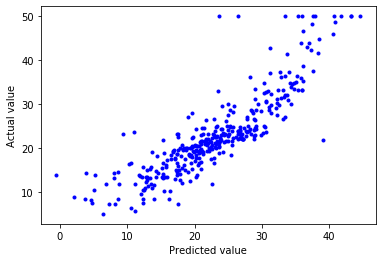

22.54548328399789
11.272741641998945


In [186]:
# ================= Plotting hypothesis value vs actual value for train set=========
h = X_train.dot(theta.T)
plt.plot(h, y_train, 'b.')
plt.ylabel('Actual value')
plt.xlabel('Predicted value')
plt.show()

print(mean_squared_error(h, y_train))
print(cost_function(X_train, y_train, theta))

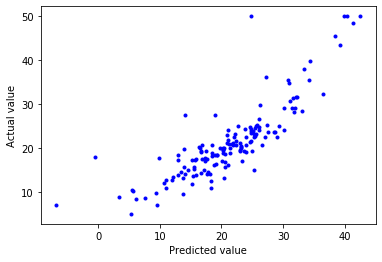

21.519348062355355
10.759674031177678


In [187]:
# =============== Plotting hypothesis value vs actual value for test set =======

plt.plot(y_pred, y_test, 'b.')
plt.ylabel('Actual value')
plt.xlabel('Predicted value')
plt.show()

print(mean_squared_error(y_pred, y_test))
print(cost_function(X_test, y_test, theta))

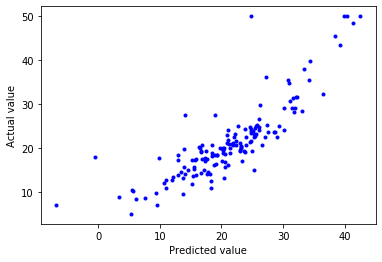

0.711226005748492
21.517444231177297


In [188]:
# ============= COMPARING WITH SKLEARN'S LINEAR REGRESSION MODEL ===============

lm = LinearRegression()
lm.fit(X_train, y_train)

y_predict = lm.predict(X_test)

plt.plot(y_predict, y_test, 'b.')
plt.ylabel('Actual value')
plt.xlabel('Predicted value')
plt.show()

print(lm.score(X_test, y_test))
print(mean_squared_error(y_test, y_predict))